In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
cmap = 'afmhot_r'
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

2023-02-18 04:28:58.827828: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-18 04:28:58.827884: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.8.2 anndata==0.7.5 umap==0.5.1 numpy==1.21.4 scipy==1.7.3 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.12.1 python-igraph==0.9.11 louvain==0.7.1 pynndescent==0.5.7


In [146]:
adata = ad.read_mtx('liver_met_integrated_annotated_final_filtered.mtx', dtype='int').T
adata

AnnData object with n_obs × n_vars = 24616 × 27527

In [147]:
genes = pd.read_csv('liver_met_integrated_annotated_final_filtered.gene.csv',index_col=None,header=0)
genes

Unnamed: 0           x
0               1  AL627309.5
1               2   LINC01409
2               3   LINC01128
3               4   LINC00115
4               5      FAM41C
...           ...         ...
27522       27523    Z94277.1
27523       27524     FAM156B
27524       27525  AC234775.4
27525       27526        CDR1
27526       27527       TEX28

[27527 rows x 2 columns]

In [148]:
barcodes = pd.read_csv('liver_met_integrated_annotated_final_filtered.meta.csv',index_col=None,header=0)
barcodes

Unnamed: 0 orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
0       AAACCTGTCCGCAAGC-1_1    UMM041L        2304          1149    7.508681   
1       AAACGGGCAAGGACAC-1_1    UMM041L       13871          3046    5.471848   
2       AAAGATGGTAGGAGTC-1_1    UMM041L        3526          1429    7.742484   
3       AAAGATGGTTCAGTAC-1_1    UMM041L        3091          1408    6.146878   
4       AAAGCAATCATCTGTT-1_1    UMM041L        3290          1584    6.322188   
...                      ...        ...         ...           ...         ...   
24611  AAACCTGAGAAGAAGC-1_10       UM63        1517          1038    6.526038   
24612  GAAATGAGTCCGAACC-1_10       UM63        1509          1002    6.096753   
24613  CTCTAATTCACGGTTA-1_10       UM63        1470          1011    6.802721   
24614  TTTATGCAGTCCAGGA-1_10       UM63        1456          1021    3.365385   
24615  ATAACGCTCATAAAGG-1_10       UM63        1451          1026    1.447278   

       nCount_SCT  nFeature_SCT  SCT_snn_res.3  seurat_clusters  \
0            5200          1215              0                0   
1            6458          2169             19               19   
2            5360          1429              0                0   
3            5347          1432              3                3   
4            5341          1591             19               19   
...           ...           ...            ...              ...   
24611        3003          1073              6                6   
24612        2973          1042             16               16   
24613        2911          1054             16               16   
24614        2831          1089             24               24   
24615        2815          1126             14               14   

            manual_annot removed  
0                T cells      No  
1           Tumour cells      No  
2                T cells      No  
3                T cells      No  
4           Tumour cells      No  
...                  ...     ...  
24611           NK cells      No  
24612            T cells      No  
24613            T cells      No  
24614  Endothelial cells      No  
24615            T cells      No  

[24616 rows x 11 columns]

In [149]:
meta = pd.read_csv('metadata.csv',index_col=None,header=0)
meta

Unnamed: 0 orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
0       AAACCTGTCCGCAAGC-1_1    UMM041L        2304          1149    7.508681   
1       AAACGGGCAAGGACAC-1_1    UMM041L       13871          3046    5.471848   
2       AAAGATGGTAGGAGTC-1_1    UMM041L        3526          1429    7.742484   
3       AAAGATGGTTCAGTAC-1_1    UMM041L        3091          1408    6.146878   
4       AAAGCAATCATCTGTT-1_1    UMM041L        3290          1584    6.322188   
...                      ...        ...         ...           ...         ...   
24611  AAACCTGAGAAGAAGC-1_10       UM63        1517          1038    6.526038   
24612  GAAATGAGTCCGAACC-1_10       UM63        1509          1002    6.096753   
24613  CTCTAATTCACGGTTA-1_10       UM63        1470          1011    6.802721   
24614  TTTATGCAGTCCAGGA-1_10       UM63        1456          1021    3.365385   
24615  ATAACGCTCATAAAGG-1_10       UM63        1451          1026    1.447278   

       nCount_SCT  nFeature_SCT  SCT_snn_res.3  seurat_clusters  \
0            5200          1215              0                0   
1            6458          2169             19               19   
2            5360          1429              0                0   
3            5347          1432              3                3   
4            5341          1591             19               19   
...           ...           ...            ...              ...   
24611        3003          1073              6                6   
24612        2973          1042             16               16   
24613        2911          1054             16               16   
24614        2831          1089             24               24   
24615        2815          1126             14               14   

            manual_annot removed  
0                T cells      No  
1           Tumour cells      No  
2                T cells      No  
3                T cells      No  
4           Tumour cells      No  
...                  ...     ...  
24611           NK cells      No  
24612            T cells      No  
24613            T cells      No  
24614  Endothelial cells      No  
24615            T cells      No  

[24616 rows x 11 columns]

In [9]:
adata.var.index=genes['x'].values
adata.obs.index=barcodes['Unnamed: 0'].values
adata.obs = barcodes.loc[:,barcodes.columns[1:]]
adata

AnnData object with n_obs × n_vars = 24616 × 27527
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.3', 'seurat_clusters', 'manual_annot', 'removed'

In [10]:
adata.write('liver_met_integrated_annotated_final_filtered.h5ad')

... storing 'orig.ident' as categorical
... storing 'manual_annot' as categorical
... storing 'removed' as categorical


In [150]:
adata = sc.read('liver_met_integrated_annotated_final_filtered.h5ad')
adata

/home/ubuntu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 24616 × 27527
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.3', 'seurat_clusters', 'manual_annot', 'removed'

In [151]:
# substract expression matrix
#acan = adata[adata.obs['orig.ident']!='WL24',]
#print(acan)
#aadj = adata[adata.obs['orig.ident']=='WL24',]
#print(aadj)
del acan
del aadj

In [152]:
cts = sorted(list(set(adata.obs['manual_annot'])))
print(cts)
spls = sorted(list(set(adata.obs['orig.ident'])))
print(spls)    

['B cells', 'DCs', 'Endothelial cells', 'Hepatocytes', 'Macrophages', 'Monocytes', 'NK cells', 'Plasma cells', 'Stellate cells', 'T cells', 'Tumour cells', 'pDCs']
['UM29', 'UM3', 'UM63', 'UMM041L', 'UMM067L', 'WL02', 'WL03', 'WL10', 'WL24', 'WL25']


In [154]:
meanlist = []
sumlist = []
for clt in cts:
    #if clt != 'Tumour cells':
    if clt != '':
        expmean = adata[adata.obs['manual_annot']==clt,].to_df().mean().to_frame()
        expsum = adata[adata.obs['manual_annot']==clt,].to_df().sum().to_frame()
        cltname = clt
        expmean.columns = [cltname]
        expsum.columns = [cltname]
        meanlist.append(expmean)
        sumlist.append(expsum)
    else:
        for spl in spls:
            expmean = aadj[(aadj.obs['manual_annot']==clt)&(aadj.obs['orig.ident']==spl),].to_df().mean().to_frame()
            expsum = aadj[(aadj.obs['manual_annot']==clt)&(aadj.obs['orig.ident']==spl),].to_df().sum().to_frame()
            cltname = clt + ' from ' + spl
            expmean.columns = [cltname]
            expsum.columns = [cltname]
            meanlist.append(expmean)
            sumlist.append(expsum)
meandf = pd.concat(meanlist,axis=1)
sumdf = pd.concat(sumlist,axis=1)
print(meandf)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


             B cells       DCs  Endothelial cells  Hepatocytes  Macrophages  \
AL627309.5  0.014286  0.004425           0.002564      0.03125     0.012987   
LINC01409   0.142857  0.243363           0.094872      0.15625     0.119244   
LINC01128   0.080952  0.522124           0.246154      0.28125     0.246753   
LINC00115   0.023810  0.079646           0.030769      0.03125     0.043684   
FAM41C      0.023810  0.013274           0.012821      0.03125     0.024793   
...              ...       ...                ...          ...          ...   
Z94277.1    0.000000  0.000000           0.000000      0.00000     0.000000   
FAM156B     0.000000  0.000000           0.000000      0.00000     0.000000   
AC234775.4  0.000000  0.000000           0.000000      0.00000     0.001181   
CDR1        0.000000  0.000000           0.000000      0.00000     0.000000   
TEX28       0.000000  0.000000           0.000000      0.00000     0.000000   

            Monocytes  NK cells  Plasma cells  Stel

In [155]:
meancorr = meandf.corr(method = 'spearman')
sumcorr = sumdf.corr(method = 'spearman')
meancorr

B cells       DCs  Endothelial cells  Hepatocytes  \
B cells            1.000000  0.853960           0.779911     0.750577   
DCs                0.853960  1.000000           0.817058     0.767438   
Endothelial cells  0.779911  0.817058           1.000000     0.808962   
Hepatocytes        0.750577  0.767438           0.808962     1.000000   
Macrophages        0.843810  0.927117           0.829857     0.763824   
Monocytes          0.834184  0.912173           0.818529     0.754496   
NK cells           0.860894  0.864264           0.806221     0.764379   
Plasma cells       0.855360  0.847855           0.797769     0.771508   
Stellate cells     0.742864  0.784857           0.914093     0.797572   
T cells            0.870552  0.872491           0.824249     0.776068   
Tumour cells       0.789046  0.828151           0.852242     0.802661   
pDCs               0.856170  0.871647           0.800513     0.791585   

                   Macrophages  Monocytes  NK cells  Plasma cells  \
B cells               0.843810   0.834184  0.860894      0.855360   
DCs                   0.927117   0.912173  0.864264      0.847855   
Endothelial cells     0.829857   0.818529  0.806221      0.797769   
Hepatocytes           0.763824   0.754496  0.764379      0.771508   
Macrophages           1.000000   0.945246  0.861461      0.840533   
Monocytes             0.945246   1.000000  0.854692      0.826157   
NK cells              0.861461   0.854692  1.000000      0.844630   
Plasma cells          0.840533   0.826157  0.844630      1.000000   
Stellate cells        0.800833   0.781274  0.762380      0.775055   
T cells               0.870724   0.856948  0.959120      0.863790   
Tumour cells          0.836057   0.807642  0.812808      0.808895   
pDCs                  0.855552   0.844857  0.847542      0.841273   

                   Stellate cells   T cells  Tumour cells      pDCs  
B cells                  0.742864  0.870552      0.789046  0.856170  
DCs                      0.784857  0.872491      0.828151  0.871647  
Endothelial cells        0.914093  0.824249      0.852242  0.800513  
Hepatocytes              0.797572  0.776068      0.802661  0.791585  
Macrophages              0.800833  0.870724      0.836057  0.855552  
Monocytes                0.781274  0.856948      0.807642  0.844857  
NK cells                 0.762380  0.959120      0.812808  0.847542  
Plasma cells             0.775055  0.863790      0.808895  0.841273  
Stellate cells           1.000000  0.783007      0.859675  0.769742  
T cells                  0.783007  1.000000      0.826363  0.855635  
Tumour cells             0.859675  0.826363      1.000000  0.801390  
pDCs                     0.769742  0.855635      0.801390  1.000000

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


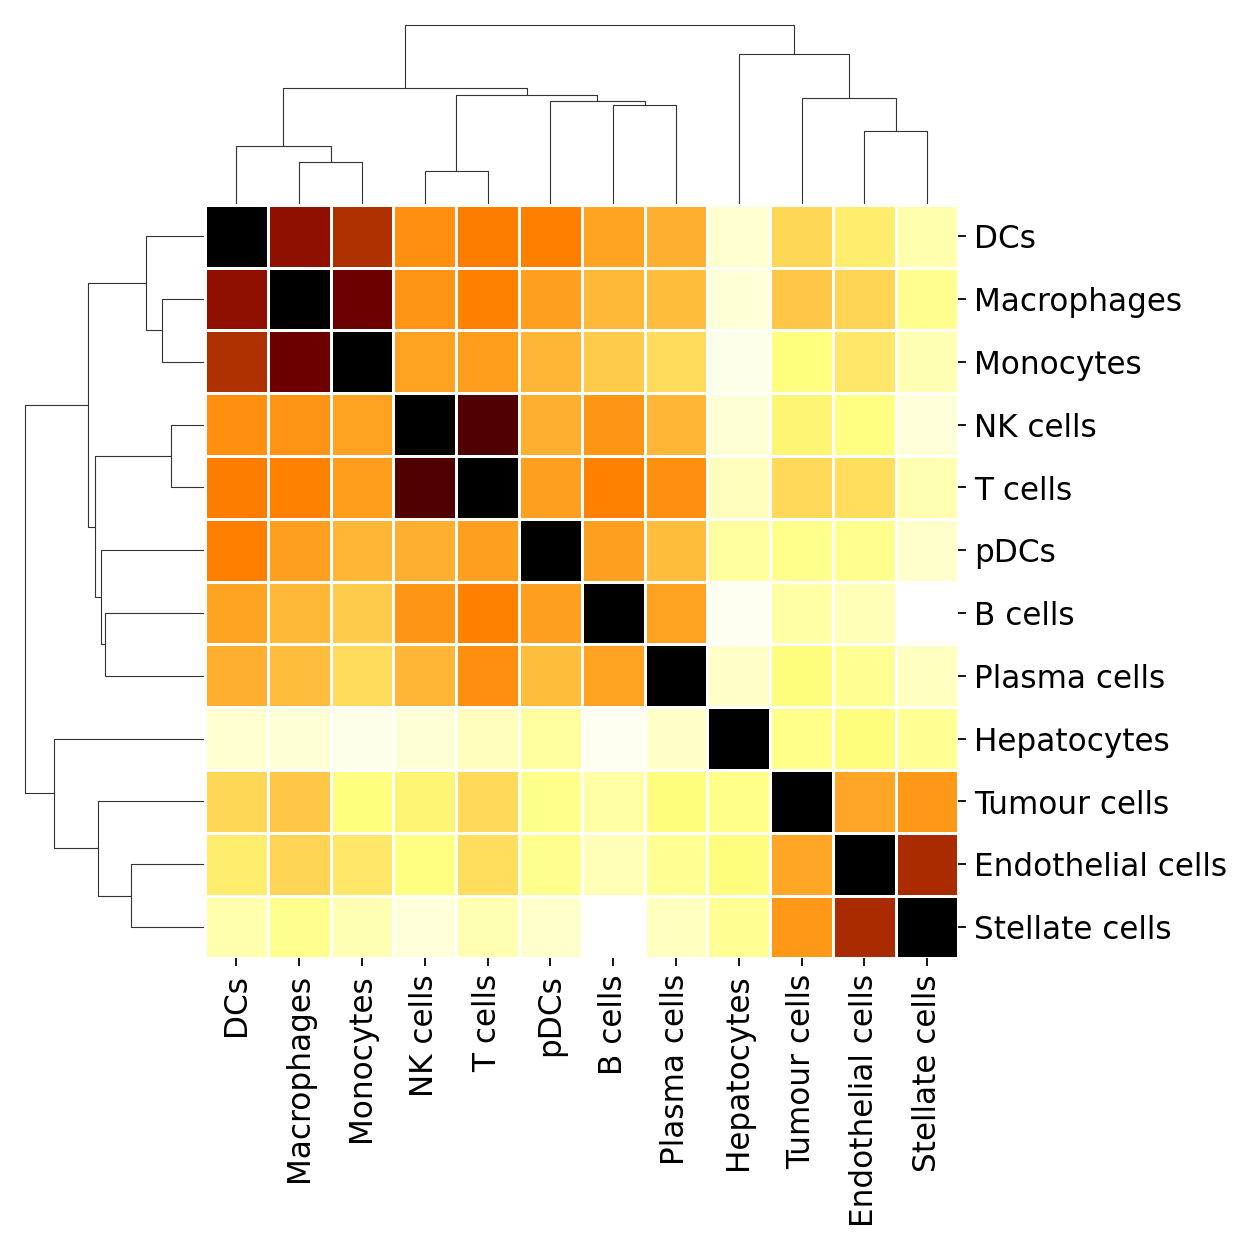

In [156]:
heatmapkws = dict(square=True, annot=False, cbar=False, cmap = cmap, linewidths=.5)#, vmin= dt.min().min(), vmax= dt.max().max())
#main matrix
sumClust = sns.clustermap(sumcorr,figsize=(sumcorr.shape[0]/1.5, sumcorr.shape[0]/1.5),cbar_pos=None, **heatmapkws)
sumClust.savefig('corr.spearman.summed_expression.All25.pdf')

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


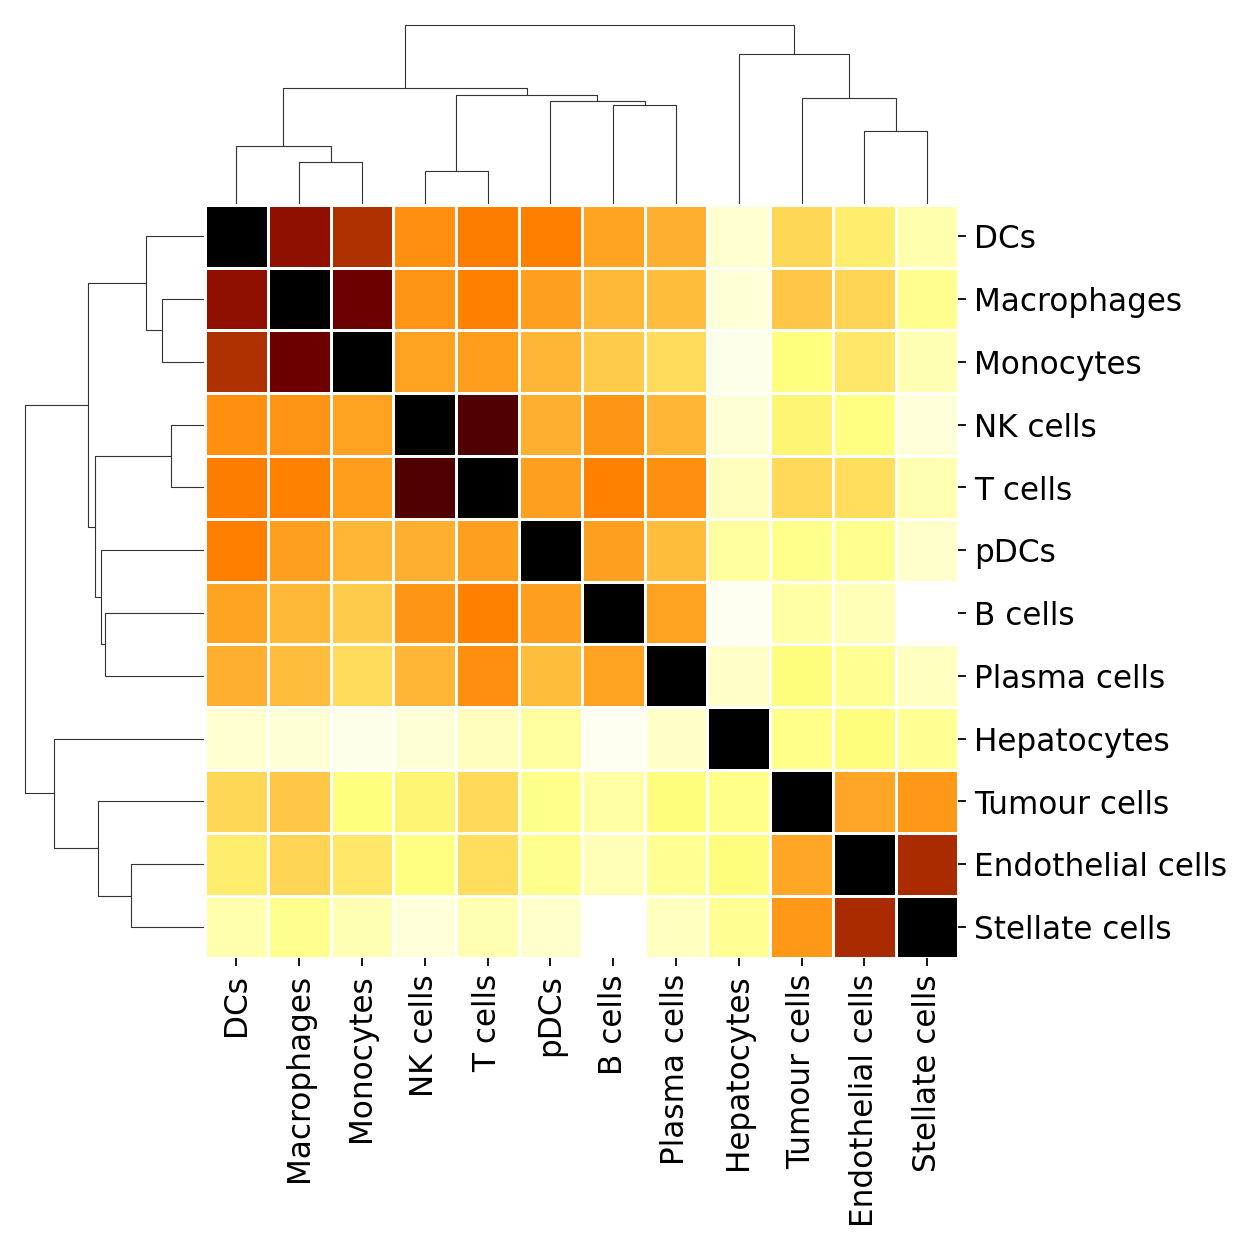

In [157]:
meanClust = sns.clustermap(meancorr,figsize=(meancorr.shape[0]/1.5, meancorr.shape[0]/1.5),cbar_pos=None, **heatmapkws)
meanClust.savefig('corr.spearman.mean_expression.All.pdf')

In [101]:
cts = sorted(list(set(acan.obs['manual_annot'])))
print(cts)
spls = sorted(list(set(acan.obs['orig.ident'])))
print(spls)                                

['B cells', 'DCs', 'Endothelial cells', 'Hepatocytes', 'Macrophages', 'Monocytes', 'NK cells', 'Plasma cells', 'Stellate cells', 'T cells', 'Tumour cells', 'pDCs']
['UM29', 'UM3', 'UM63', 'UMM041L', 'UMM067L', 'WL02', 'WL03', 'WL10', 'WL25']


In [102]:
meanlist = []
sumlist = []
for clt in cts:
    if clt != 'Tumour cells':
        expmean = acan[acan.obs['manual_annot']==clt,].to_df().mean().to_frame()
        expsum = acan[acan.obs['manual_annot']==clt,].to_df().sum().to_frame()
        cltname = clt
        expmean.columns = [cltname]
        expsum.columns = [cltname]
        meanlist.append(expmean)
        sumlist.append(expsum)
    else:
        for spl in spls:
            expmean = acan[(acan.obs['manual_annot']==clt)&(acan.obs['orig.ident']==spl),].to_df().mean().to_frame()
            expsum = acan[(acan.obs['manual_annot']==clt)&(acan.obs['orig.ident']==spl),].to_df().sum().to_frame()
            cltname = clt + ' from ' + spl
            expmean.columns = [cltname]
            expsum.columns = [cltname]
            meanlist.append(expmean)
            sumlist.append(expsum)
meandf = pd.concat(meanlist,axis=1)
sumdf = pd.concat(sumlist,axis=1)
print(meandf)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


              B cells        DCs  Endothelial cells  Hepatocytes  Macrophages  \
AL627309.5   2.926594   0.663992           0.345187     0.589501     0.964488   
LINC01409   22.590656  15.999208           6.910130     6.804897     8.922035   
LINC01128   11.060296  38.419483          19.495581    19.652699    17.090452   
LINC00115    2.558524   5.286408           1.913811     1.772421     2.934577   
FAM41C       1.964553   0.000000           0.814196     2.118869     1.442222   
...               ...        ...                ...          ...          ...   
Z94277.1     0.000000   0.000000           0.000000     0.000000     0.000000   
FAM156B      0.000000   0.000000           0.000000     0.000000     0.000000   
AC234775.4   0.000000   0.000000           0.000000     0.000000     0.159393   
CDR1         0.000000   0.000000           0.000000     0.000000     0.000000   
TEX28        0.000000   0.000000           0.000000     0.000000     0.000000   

            Monocytes   NK 

In [110]:
meancorr = meandf.corr(method = 'spearman')
sumcorr = sumdf.corr(method = 'spearman')
meancorr

B cells       DCs  Endothelial cells  Hepatocytes  \
B cells                    1.000000  0.746919           0.695598     0.636931   
DCs                        0.746919  1.000000           0.763979     0.668879   
Endothelial cells          0.695598  0.763979           1.000000     0.703462   
Hepatocytes                0.636931  0.668879           0.703462     1.000000   
Macrophages                0.732261  0.883383           0.769882     0.658359   
Monocytes                  0.716690  0.865610           0.755561     0.644766   
NK cells                   0.751829  0.835716           0.783129     0.663849   
Plasma cells               0.720043  0.713055           0.676880     0.626048   
Stellate cells             0.653656  0.713379           0.803791     0.675525   
T cells                    0.759222  0.834239           0.788467     0.669276   
Tumour cells from UM29          NaN       NaN                NaN          NaN   
Tumour cells from UM3           NaN       NaN                NaN          NaN   
Tumour cells from UM63          NaN       NaN                NaN          NaN   
Tumour cells from UMM041L       NaN       NaN                NaN          NaN   
Tumour cells from UMM067L       NaN       NaN                NaN          NaN   
Tumour cells from WL02          NaN       NaN                NaN          NaN   
Tumour cells from WL03          NaN       NaN                NaN          NaN   
Tumour cells from WL10          NaN       NaN                NaN          NaN   
Tumour cells from WL25          NaN       NaN                NaN          NaN   
pDCs                       0.746835  0.805443           0.730035     0.652638   

                           Macrophages  Monocytes  NK cells  Plasma cells  \
B cells                       0.732261   0.716690  0.751829      0.720043   
DCs                           0.883383   0.865610  0.835716      0.713055   
Endothelial cells             0.769882   0.755561  0.783129      0.676880   
Hepatocytes                   0.658359   0.644766  0.663849      0.626048   
Macrophages                   1.000000   0.903099  0.829796      0.695236   
Monocytes                     0.903099   1.000000  0.819774      0.685632   
NK cells                      0.829796   0.819774  1.000000      0.741160   
Plasma cells                  0.695236   0.685632  0.741160      1.000000   
Stellate cells                0.717425   0.707078  0.692771      0.640760   
T cells                       0.826237   0.811706  0.956266      0.744228   
Tumour cells from UM29             NaN        NaN       NaN           NaN   
Tumour cells from UM3              NaN        NaN       NaN           NaN   
Tumour cells from UM63             NaN        NaN       NaN           NaN   
Tumour cells from UMM041L          NaN        NaN       NaN           NaN   
Tumour cells from UMM067L          NaN        NaN       NaN           NaN   
Tumour cells from WL02             NaN        NaN       NaN           NaN   
Tumour cells from WL03             NaN        NaN       NaN           NaN   
Tumour cells from WL10             NaN        NaN       NaN           NaN   
Tumour cells from WL25             NaN        NaN       NaN           NaN   
pDCs                          0.786262   0.773158  0.795893      0.713445   

                           Stellate cells   T cells  Tumour cells from UM29  \
B cells                          0.653656  0.759222                     NaN   
DCs                              0.713379  0.834239                     NaN   
Endothelial cells                0.803791  0.788467                     NaN   
Hepatocytes                      0.675525  0.669276                     NaN   
Macrophages                      0.717425  0.826237                     NaN   
Monocytes                        0.707078  0.811706                     NaN   
NK cells                         0.692771  0.956266                     NaN   
Plasma cells                     0.640760  0.744228                     NaN 

ValueError: The condensed distance matrix must contain only finite values.

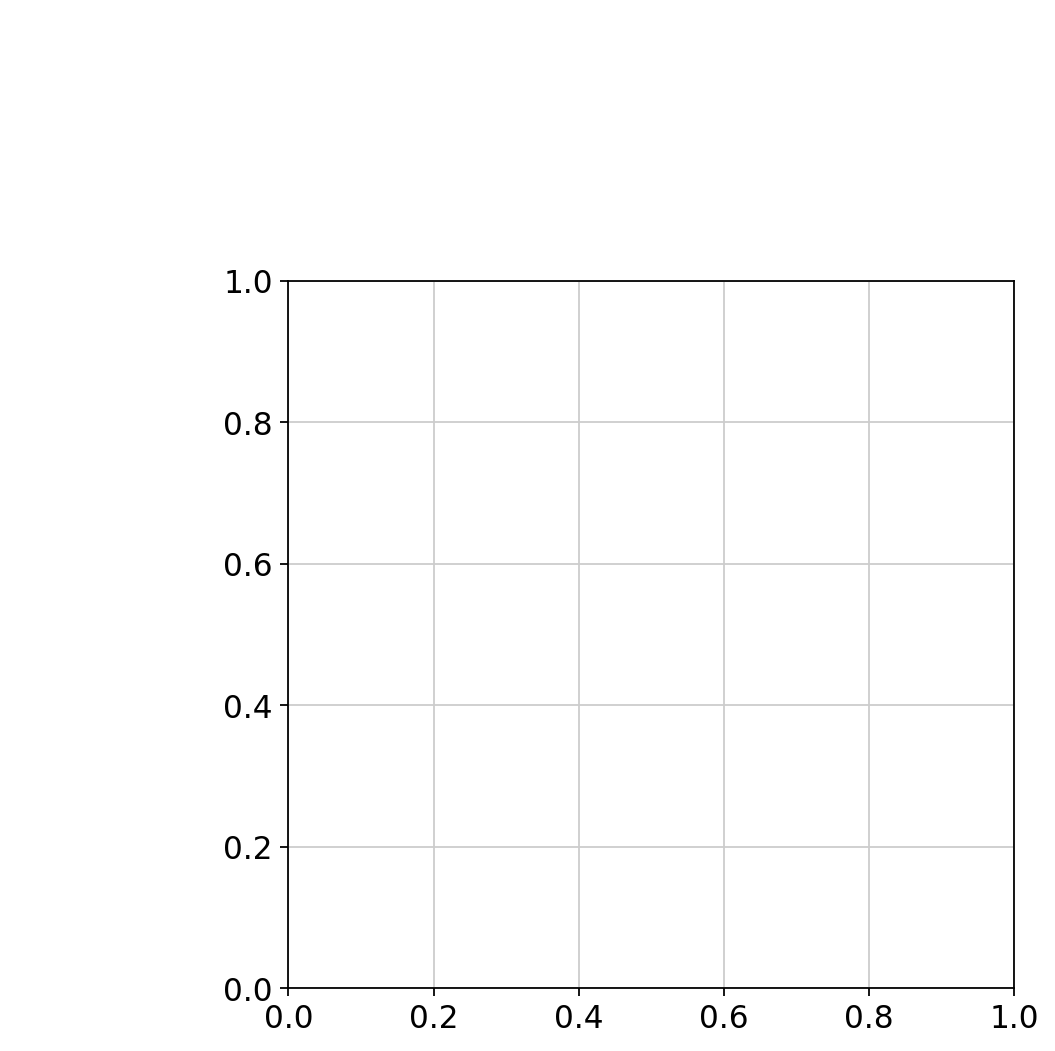

In [113]:
heatmapkws = dict(square=True, annot=False, cbar=False, cmap = cmap, linewidths=.5)#, vmin= dt.min().min(), vmax= dt.max().max())
#main matrix
sumClust = sns.clustermap(sumcorr,figsize=(sumcorr.shape[0]/2.5, sumcorr.shape[0]/2.5),cbar_pos=None, **heatmapkws)
sumClust.savefig('corr.spearman.summed_expression.cancer.pdf')

ValueError: The condensed distance matrix must contain only finite values.

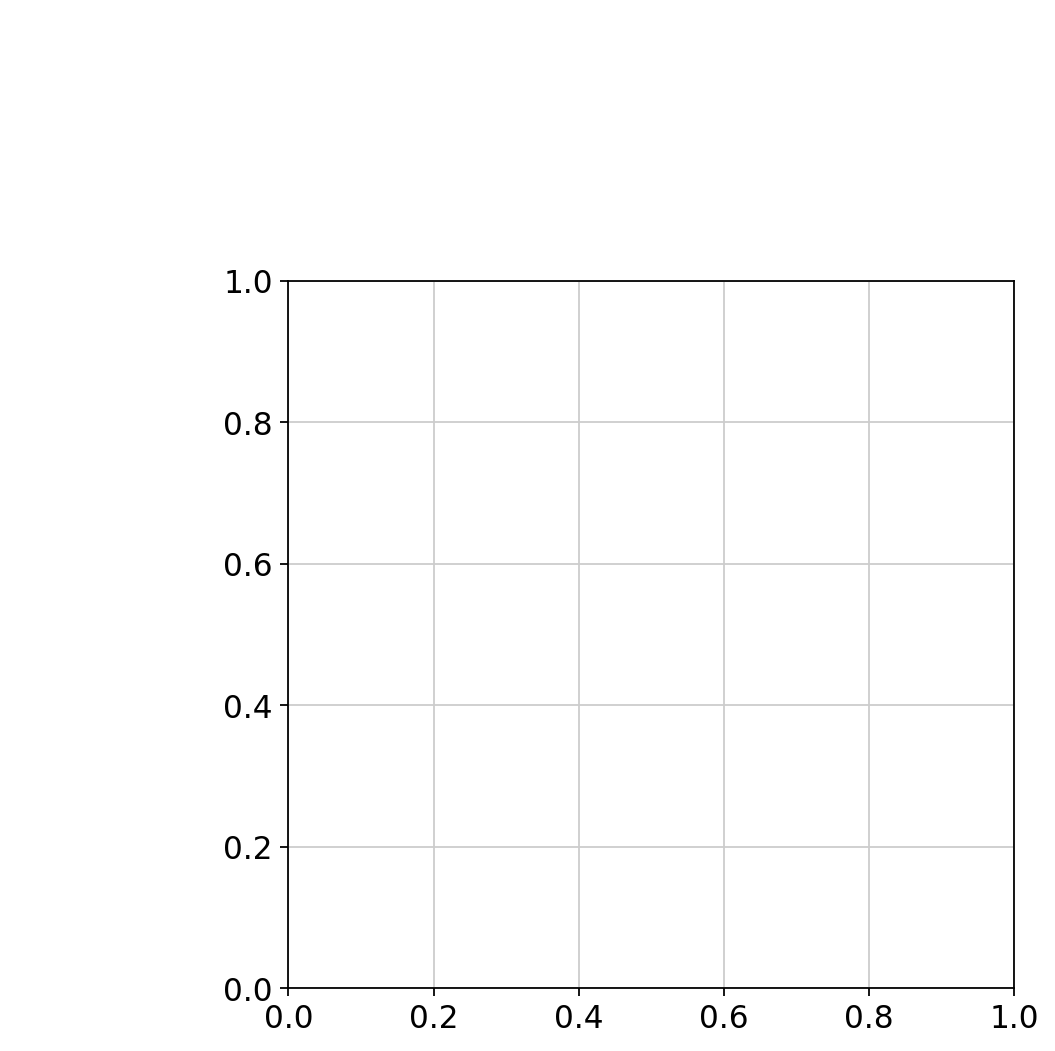

In [112]:
meanClust = sns.clustermap(meancorr,figsize=(meancorr.shape[0]/2.5, meancorr.shape[0]/2.5),cbar_pos=None, **heatmapkws)
meanClust.savefig('corr.spearman.mean_expression.cancer.pdf')

In [158]:
# total-count normalize (library-size correct) the data matrix 𝐗 to 1000,000 reads per cell, so that counts become comparable among cells.
sc.pp.normalize_total(adata, target_sum=1e6)
cts = sorted(list(set(adata.obs['manual_annot'])))
print(cts)
spls = sorted(list(set(adata.obs['orig.ident'])))
print(spls)    

normalizing counts per cell
    finished (0:00:00)
['B cells', 'DCs', 'Endothelial cells', 'Hepatocytes', 'Macrophages', 'Monocytes', 'NK cells', 'Plasma cells', 'Stellate cells', 'T cells', 'Tumour cells', 'pDCs']
['UM29', 'UM3', 'UM63', 'UMM041L', 'UMM067L', 'WL02', 'WL03', 'WL10', 'WL24', 'WL25']


In [159]:
meanlist = []
sumlist = []
for clt in cts:
    #if clt != 'Tumour cells':
    if clt != '':
        expmean = adata[adata.obs['manual_annot']==clt,].to_df().mean().to_frame()
        expsum = adata[adata.obs['manual_annot']==clt,].to_df().sum().to_frame()
        cltname = clt
        expmean.columns = [cltname]
        expsum.columns = [cltname]
        meanlist.append(expmean)
        sumlist.append(expsum)
    else:
        for spl in spls:
            expmean = aadj[(aadj.obs['manual_annot']==clt)&(aadj.obs['orig.ident']==spl),].to_df().mean().to_frame()
            expsum = aadj[(aadj.obs['manual_annot']==clt)&(aadj.obs['orig.ident']==spl),].to_df().sum().to_frame()
            cltname = clt + ' from ' + spl
            expmean.columns = [cltname]
            expsum.columns = [cltname]
            meanlist.append(expmean)
            sumlist.append(expsum)
meandf = pd.concat(meanlist,axis=1)
sumdf = pd.concat(sumlist,axis=1)
print(meandf)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


              B cells        DCs  Endothelial cells  Hepatocytes  Macrophages  \
AL627309.5   2.661807   0.546471           0.303588     0.460548     1.296145   
LINC01409   21.302841  16.729361           6.744157    11.647989     8.891272   
LINC01128   13.070701  37.201424          20.587580    18.024153    17.710337   
LINC00115    3.179815   5.019428           1.791729     1.384704     2.863250   
FAM41C       3.527002   0.644613           0.716075     1.655366     1.623023   
...               ...        ...                ...          ...          ...   
Z94277.1     0.000000   0.000000           0.000000     0.000000     0.000000   
FAM156B      0.000000   0.000000           0.000000     0.000000     0.000000   
AC234775.4   0.000000   0.000000           0.000000     0.000000     0.146408   
CDR1         0.000000   0.000000           0.000000     0.000000     0.000000   
TEX28        0.000000   0.000000           0.000000     0.000000     0.000000   

            Monocytes   NK 

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


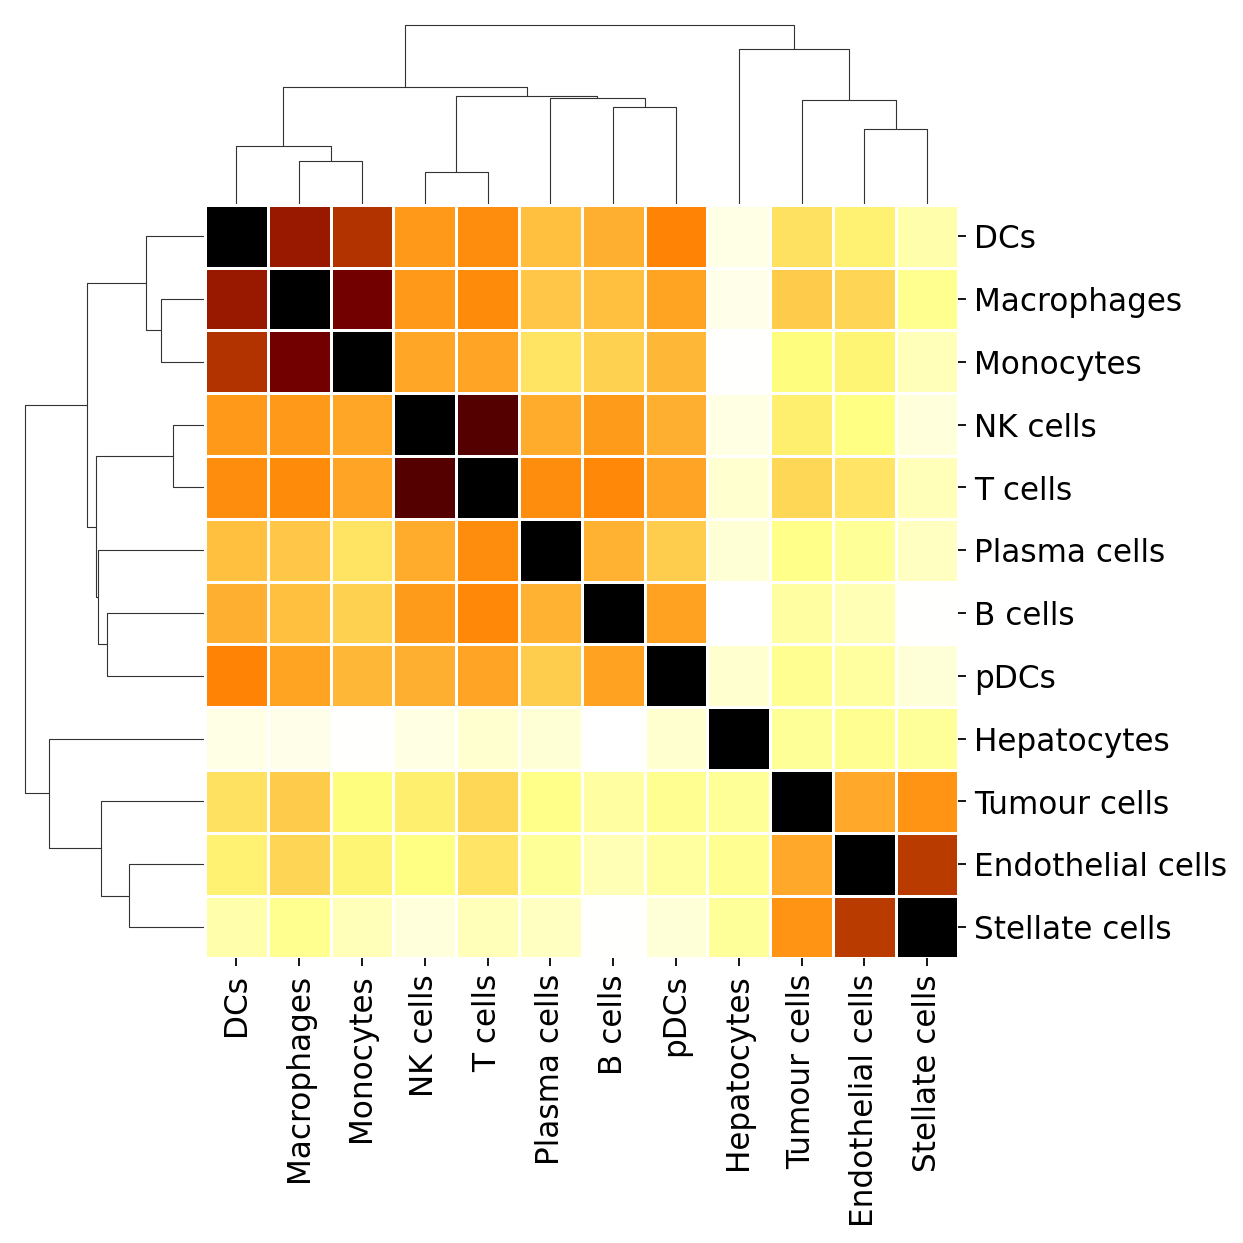

In [160]:
meancorr = meandf.corr(method = 'spearman')
sumcorr = sumdf.corr(method = 'spearman')
heatmapkws = dict(square=True, annot=False, cbar=False, cmap = cmap, linewidths=.5)#, vmin= dt.min().min(), vmax= dt.max().max())
#main matrix
sumClust = sns.clustermap(sumcorr,figsize=(sumcorr.shape[0]/1.5, sumcorr.shape[0]/1.5),cbar_pos=None, **heatmapkws)
sumClust.savefig('corr.spearman.summed_norm_expression.All.pdf')

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


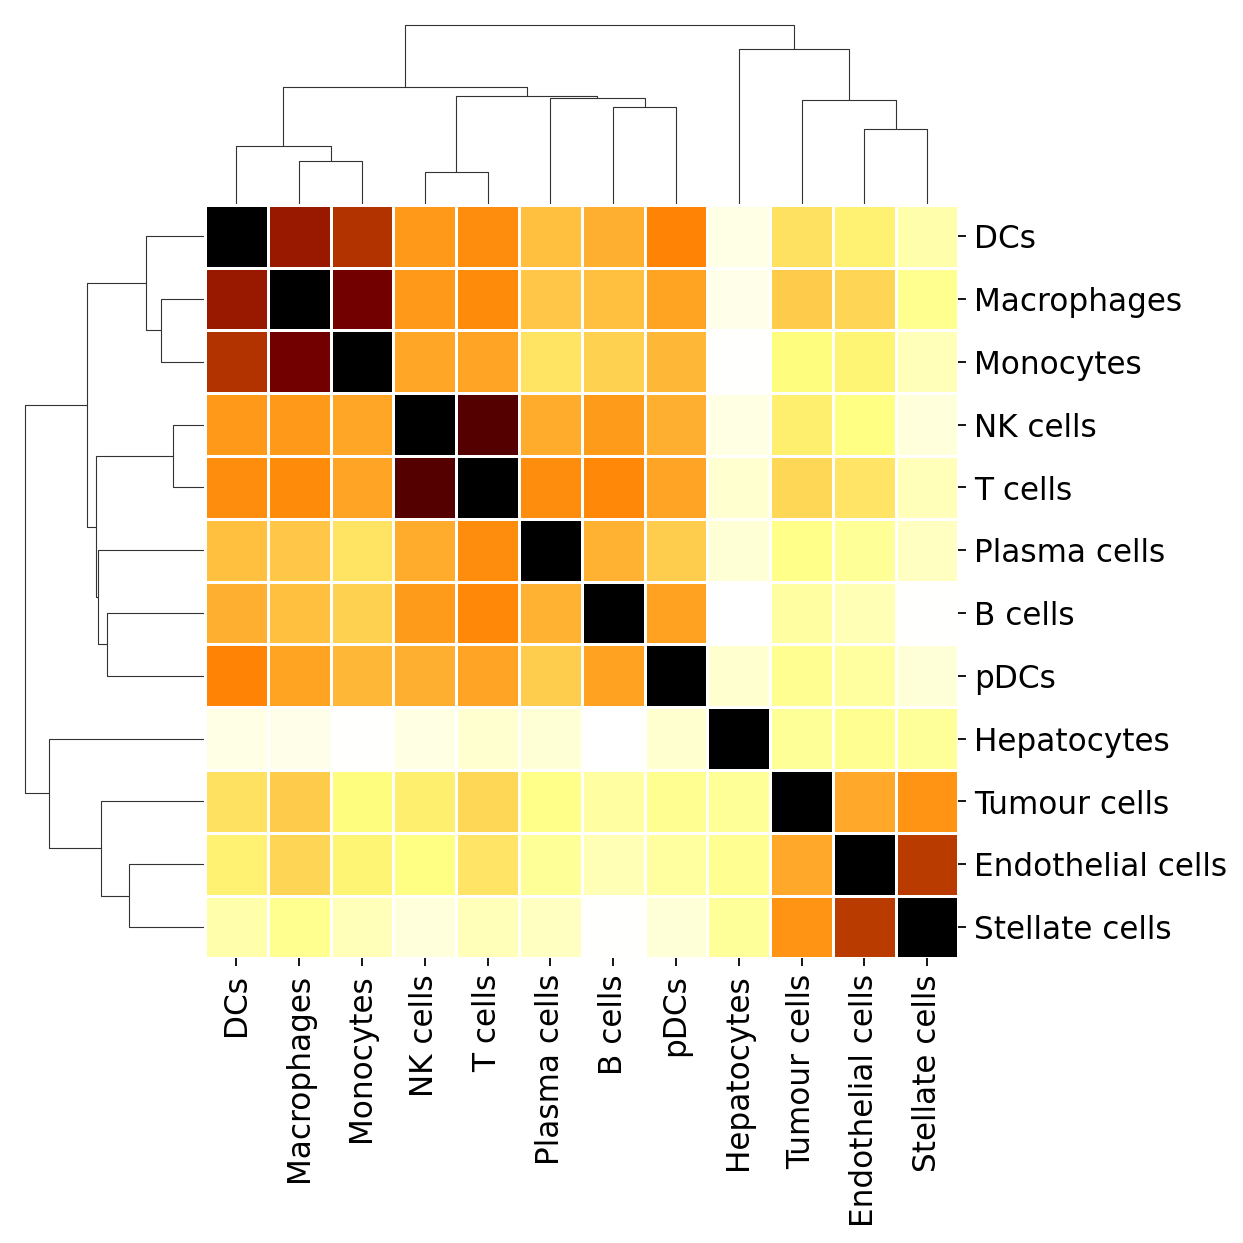

In [161]:
meanClust = sns.clustermap(meancorr,figsize=(meancorr.shape[0]/1.5, meancorr.shape[0]/1.5),cbar_pos=None, **heatmapkws)
meanClust.savefig('corr.spearman.mean_norm_expression.All.pdf')

In [120]:
# total-count normalize (library-size correct) the data matrix 𝐗 to 1000,000 reads per cell, so that counts become comparable among cells.
sc.pp.normalize_total(acan, target_sum=1e6)
cts = sorted(list(set(acan.obs['manual_annot'])))
print(cts)
spls = sorted(list(set(acan.obs['orig.ident'])))
print(spls)    

normalizing counts per cell
    finished (0:00:00)
['B cells', 'DCs', 'Endothelial cells', 'Hepatocytes', 'Macrophages', 'Monocytes', 'NK cells', 'Plasma cells', 'Stellate cells', 'T cells', 'Tumour cells', 'pDCs']
['UM29', 'UM3', 'UM63', 'UMM041L', 'UMM067L', 'WL02', 'WL03', 'WL10', 'WL25']


In [121]:
meanlist = []
sumlist = []
for clt in cts:
    if clt != 'Tumour cells':
        expmean = acan[acan.obs['manual_annot']==clt,].to_df().mean().to_frame()
        expsum = acan[acan.obs['manual_annot']==clt,].to_df().sum().to_frame()
        cltname = clt
        expmean.columns = [cltname]
        expsum.columns = [cltname]
        meanlist.append(expmean)
        sumlist.append(expsum)
    else:
        for spl in spls:
            expmean = acan[(acan.obs['manual_annot']==clt)&(acan.obs['orig.ident']==spl),].to_df().mean().to_frame()
            expsum = acan[(acan.obs['manual_annot']==clt)&(acan.obs['orig.ident']==spl),].to_df().sum().to_frame()
            cltname = clt + ' from ' + spl
            expmean.columns = [cltname]
            expsum.columns = [cltname]
            meanlist.append(expmean)
            sumlist.append(expsum)
meandf = pd.concat(meanlist,axis=1)
sumdf = pd.concat(sumlist,axis=1)
print(meandf)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


              B cells        DCs  Endothelial cells  Hepatocytes  Macrophages  \
AL627309.5   2.926594   0.663992           0.345187     0.589501     0.964488   
LINC01409   22.590656  15.999208           6.910130     6.804896     8.922035   
LINC01128   11.060295  38.419487          19.495581    19.652697    17.090452   
LINC00115    2.558524   5.286408           1.913811     1.772421     2.934577   
FAM41C       1.964553   0.000000           0.814196     2.118869     1.442222   
...               ...        ...                ...          ...          ...   
Z94277.1     0.000000   0.000000           0.000000     0.000000     0.000000   
FAM156B      0.000000   0.000000           0.000000     0.000000     0.000000   
AC234775.4   0.000000   0.000000           0.000000     0.000000     0.159393   
CDR1         0.000000   0.000000           0.000000     0.000000     0.000000   
TEX28        0.000000   0.000000           0.000000     0.000000     0.000000   

            Monocytes   NK 

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


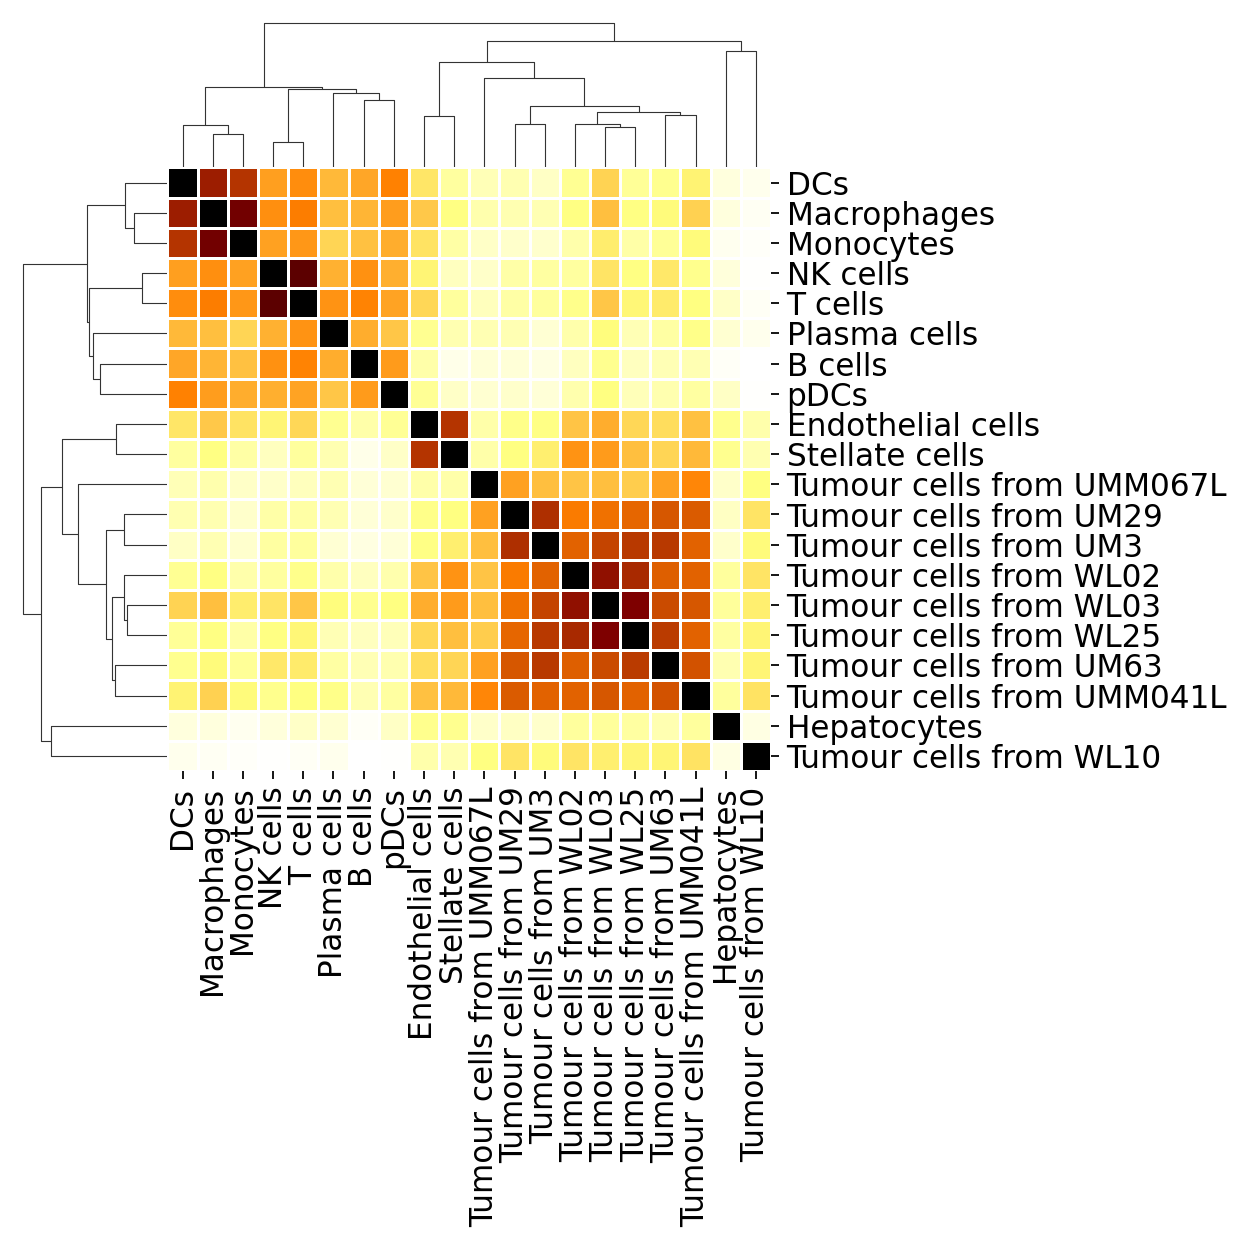

In [122]:
meancorr = meandf.corr(method = 'spearman')
sumcorr = sumdf.corr(method = 'spearman')
heatmapkws = dict(square=True, annot=False, cbar=False, cmap = cmap, linewidths=.5)#, vmin= dt.min().min(), vmax= dt.max().max())
#main matrix
sumClust = sns.clustermap(sumcorr,figsize=(sumcorr.shape[0]/2.5, sumcorr.shape[0]/2.5),cbar_pos=None, **heatmapkws)
sumClust.savefig('corr.spearman.summed_norm_expression.cancer.pdf')

/home/ubuntu/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


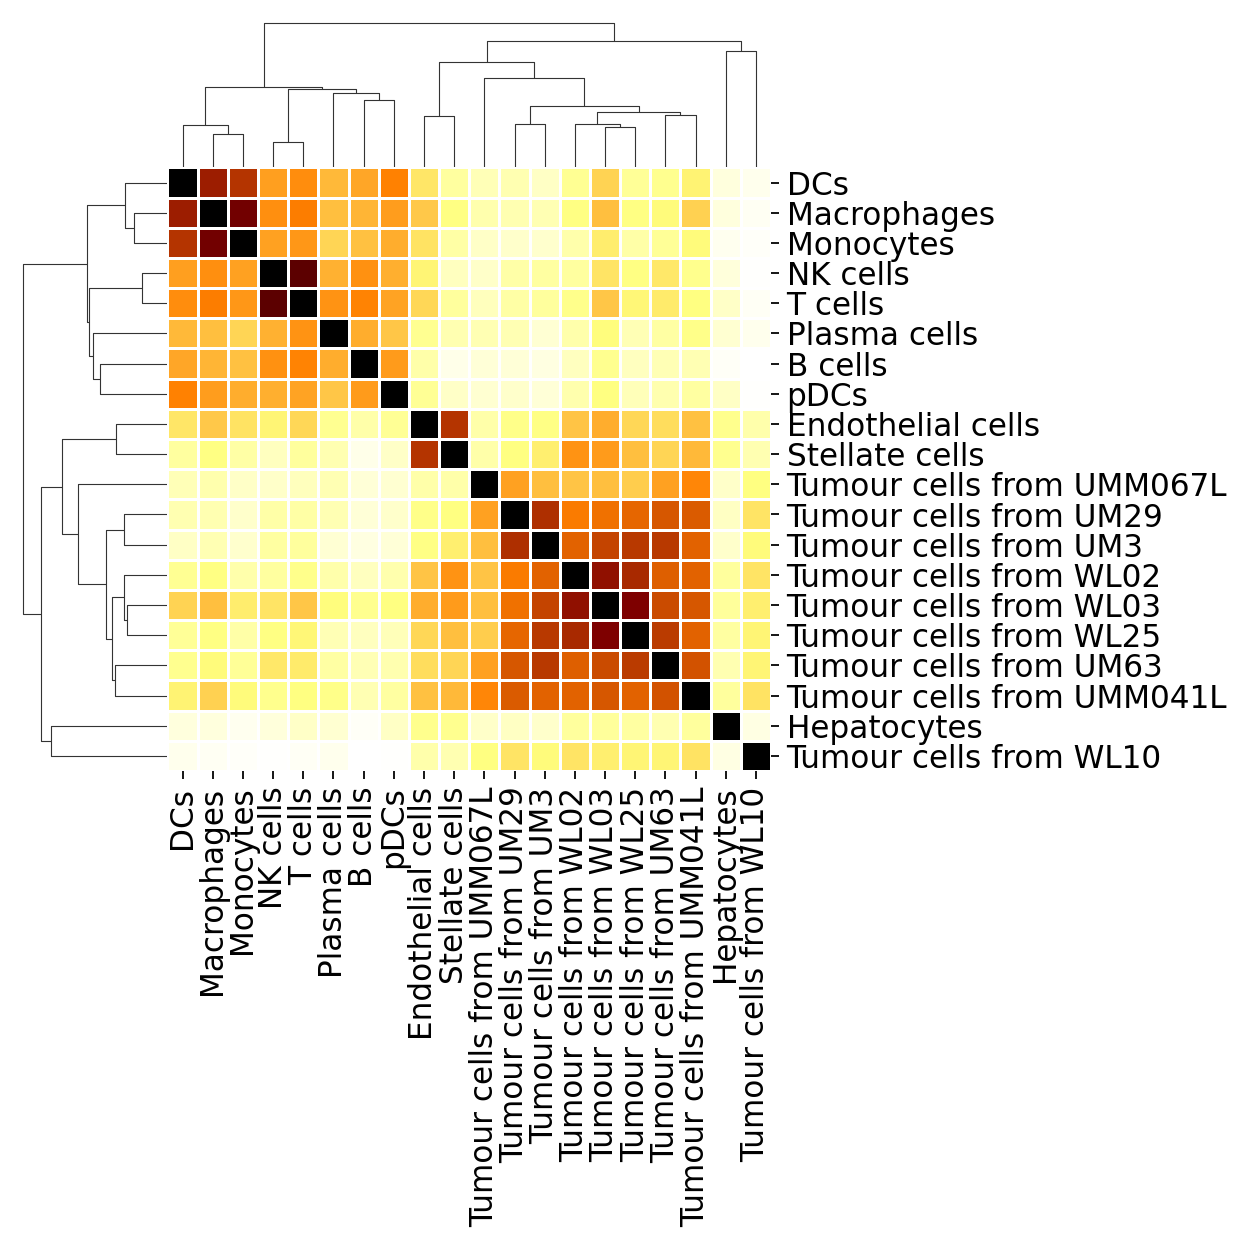

In [123]:
meanClust = sns.clustermap(meancorr,figsize=(meancorr.shape[0]/2.5, meancorr.shape[0]/2.5),cbar_pos=None, **heatmapkws)
meanClust.savefig('corr.spearman.mean_norm_expression.cancer.pdf')

In [124]:
#load human ligand-receptor pairs
lrdb = pd.read_excel("/data/projects/lrdb_collection/connectomeDB2020.xlsx",index_col=0,header=0)
print(lrdb)

              Ligand gene symbol                  Ligand gene name  \
LR-pair                                                              
A2M->LRP1                    A2M             alpha-2-macroglobulin   
AANAT->MTNR1A              AANAT  aralkylamine N-acetyltransferase   
AANAT->MTNR1B              AANAT  aralkylamine N-acetyltransferase   
ACE->BDKRB2                  ACE   angiotensin I converting enzyme   
ADAM10->EPHA3             ADAM10   ADAM metallopeptidase domain 10   
...                          ...                               ...   
ZG16B->TLR5                ZG16B       zymogen granule protein 16B   
ZG16B->TLR6                ZG16B       zymogen granule protein 16B   
ZP3->CHRNA7                  ZP3     zona pellucida glycoprotein 3   
ZP3->EGFR                    ZP3     zona pellucida glycoprotein 3   
ZP3->MERTK                   ZP3     zona pellucida glycoprotein 3   

              Ligand HGNC ID  Ligand Entrez ID Ligand UniProt ID  \
LR-pair              

/home/ubuntu/miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [125]:
ligands = sorted(list(set(lrdb['Ligand gene symbol'])))
receptors = sorted(list(set(lrdb['Receptor gene symbol'])))
print(len(ligands))
print(len(receptors))

829
690


In [126]:
# obtain detected signaling factors
ligandsAll = [i for i in ligands if i in adata.var.index]
receptorsAll = [i for i in receptors if i in adata.var.index]
print(len(ligands))
print(len(receptors))
print(len(ligandsAll))
print(len(receptorsAll))
signalingsAll = set(ligandsAll).union(set(receptorsAll))
print(len(signalingsAll))

829
690
714
649
1271


In [162]:
adata = adata[:,sorted(list(signalingsAll))]
adata.write('liver_met_integrated_annotated_final_filtered.All.upm.lr.h5ad')
print(adata)
#aadj = aadj[:,sorted(list(signalingsAll))]
#aadj.write('liver_met_integrated_annotated_final_filtered.Adjacent.upm.lr.h5ad')
#print(aadj)

View of AnnData object with n_obs × n_vars = 24616 × 1271
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.3', 'seurat_clusters', 'manual_annot', 'removed'


/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [39]:
#function to filter genes based on the expression level and detection rate
def FilterEM(em,expTrd,dctRate):
    meanV = em.to_df().mean()
    meanV = meanV[meanV>expTrd]
    meanSyb = list(meanV.index)
    
    countV = em.to_df().astype(bool).sum()
    countV = countV/em.shape[0]
    countV = countV[countV>dctRate]
    countSyb = list(countV.index)
    
    commonSyb = set(meanSyb).intersection(set(countSyb))
    meanV = meanV[commonSyb]
    return meanV

In [66]:
upmThrd = 0
dctRate = 0.2

Only considering the two last: ['.lr', '.h5ad'].
Only considering the two last: ['.lr', '.h5ad'].


In [164]:
adata = sc.read('liver_met_integrated_annotated_final_filtered.All.upm.lr.h5ad')
cts = sorted(list(set(adata.obs['manual_annot'])))
spls = sorted(list(set(adata.obs['orig.ident'])))
# obtain detected ligands and receptors in each cell type
lrDict = {}
for tct in cts:
    #if tct != 'Tumour cells':
    if tct != '':
        print('===processing top cell type: %s' % tct)
        ligandDF = adata[adata.obs['manual_annot']==tct,ligandsAll]
        receptorDF = adata[adata.obs['manual_annot']==tct,receptorsAll]

        lmean = FilterEM(ligandDF,upmThrd,dctRate)
        rmean = FilterEM(receptorDF,upmThrd,dctRate)

        lrDict[tct] = [lmean,rmean]
    else:
        for spl in spls:
            cltname = tct + ' from ' + spl
            print('===processing top cell type: %s' % cltname)
            ligandDF = adata[(adata.obs['manual_annot']==tct)&(adata.obs['orig.ident']==spl),ligandsAll]
            receptorDF = adata[(adata.obs['manual_annot']==tct)&(adata.obs['orig.ident']==spl),receptorsAll]

            lmean = FilterEM(ligandDF,upmThrd,dctRate)
            rmean = FilterEM(receptorDF,upmThrd,dctRate)

            lrDict[cltname] = [lmean,rmean]

Only considering the two last: ['.lr', '.h5ad'].
Only considering the two last: ['.lr', '.h5ad'].
===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Hepatocytes
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
===processing top cell type: pDCs


In [165]:
lredgeCuntMtx = pd.DataFrame(0,index=lrDict.keys(),columns=lrDict.keys())
for sct in lrDict.keys():
    for tct in lrDict.keys():
        print('from %s to %s' % (sct,tct))
        rltDict = {'sending cell':[],'target cell':[],'ligand':[],'receptor':[],'ligand mean expression':[],'receptor mean expression':[],'edge weight':[]}
        for lridx in lrdb.index:
            lsymbl = lrdb.loc[lridx,'Ligand gene symbol']
            rsymbl = lrdb.loc[lridx,'Receptor gene symbol']
            if lsymbl in lrDict[sct][0].index and rsymbl in lrDict[tct][1].index:
                rltDict['sending cell'].append(sct)
                rltDict['target cell'].append(tct)
                rltDict['ligand'].append(lsymbl)
                rltDict['receptor'].append(rsymbl)
                rltDict['ligand mean expression'].append(lrDict[sct][0][lsymbl])
                rltDict['receptor mean expression'].append(lrDict[tct][1][rsymbl])
                rltDict['edge weight'].append(lrDict[sct][0][lsymbl]*lrDict[tct][1][rsymbl])
        rltdf = pd.DataFrame(rltDict)
        lredgeCuntMtx.loc[sct,tct] = len(rltdf)
        rltdf.to_excel('All/%s_2_%s_thrd_%s_dec_%s.xlsx' % (sct,tct,upmThrd,dctRate), index=False, header=True, columns = ['sending cell','target cell','ligand','receptor','ligand mean expression','receptor mean expression','edge weight'])
lredgeCuntMtx.to_excel('All/c2c_source_matrix.xlsx', index=True, header=True, columns = lrDict.keys())

from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Hepatocytes
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Hepatocytes
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cells
from DCs to T cells
from DCs to Tumour cells
from DCs to pDCs
from Endothelial cells to B cells
from Endothelial cells to DCs
from Endothelial cells to Endothelial cells
from Endothelial cells to Hepatocytes
from Endothelial cells to Macrophages
from Endothelial cells to Monocytes
from Endothelial cells to NK cells
from Endothelial cells to Plasma cells
from Endothelial cells to Stellate cells
from Endothelial cells to T cells
from Endothelial cells to Tumour cells
fr

In [166]:
lrsigCuntMtx = pd.DataFrame(0,index=lrDict.keys(),columns=['ligand','receptor','cell'])
sumCell = 0
for sct in cts:
    #if sct != 'Tumour cells':
    if sct != '':
        print('checking cell type: %s' % sct)
        ligCunt = len(lrDict[sct][0])
        rcpCunt = len(lrDict[sct][1])
        cellCunt = len(adata.obs.loc[adata.obs['manual_annot']==sct,])
        sumCell += cellCunt
        lrsigCuntMtx.loc[sct,'ligand'] = ligCunt
        lrsigCuntMtx.loc[sct,'receptor'] = rcpCunt
        lrsigCuntMtx.loc[sct,'cell'] = cellCunt
    else:
        for spl in spls:
            cltname = sct + ' from ' + spl
            print('checking cell type: %s' % cltname)
            ligCunt = len(lrDict[cltname][0])
            rcpCunt = len(lrDict[cltname][1])
            cellCunt = len(adata.obs.loc[(adata.obs['manual_annot']==sct)&(adata.obs['orig.ident']==spl),])
            sumCell += cellCunt
            lrsigCuntMtx.loc[cltname,'ligand count'] = ligCunt
            lrsigCuntMtx.loc[cltname,'receptor count'] = rcpCunt
            lrsigCuntMtx.loc[cltname,'cell count'] = cellCunt
lrsigCuntMtx.to_excel('All/sig_count_source_matrix.xlsx', index=True, header=True, columns = ['ligand','receptor','cell'])
print(sumCell)
print(lrsigCuntMtx)

checking cell type: B cells
checking cell type: DCs
checking cell type: Endothelial cells
checking cell type: Hepatocytes
checking cell type: Macrophages
checking cell type: Monocytes
checking cell type: NK cells
checking cell type: Plasma cells
checking cell type: Stellate cells
checking cell type: T cells
checking cell type: Tumour cells
checking cell type: pDCs
24616
                   ligand  receptor   cell
B cells                69        63    210
DCs                   127       143    226
Endothelial cells     167       166    390
Hepatocytes           208       180     32
Macrophages           150       156    847
Monocytes             124       139    499
NK cells               88        87   3539
Plasma cells           86        77    121
Stellate cells        193       172    526
T cells                80        78  15719
Tumour cells          139       126   2355
pDCs                  100       121    152


In [167]:
sumCell = 0
for sct in cts:
    #if sct != 'Tumour cells':
    if sct != '':
        cellCunt = len(adata.obs.loc[adata.obs['manual_annot']==sct,])
        sumCell += cellCunt
        print('checking cell type: %s \t %s' % (sct,cellCunt))
    else:
        tmt = adata.obs.loc[(adata.obs['manual_annot']==sct),'orig.ident']
        print(set(tmt))
        tmtCunt = len(adata.obs.loc[(adata.obs['manual_annot']==sct),])
        print(tmtCunt)
print(sumCell)

checking cell type: B cells 	 210
checking cell type: DCs 	 226
checking cell type: Endothelial cells 	 390
checking cell type: Hepatocytes 	 32
checking cell type: Macrophages 	 847
checking cell type: Monocytes 	 499
checking cell type: NK cells 	 3539
checking cell type: Plasma cells 	 121
checking cell type: Stellate cells 	 526
checking cell type: T cells 	 15719
checking cell type: Tumour cells 	 2355
checking cell type: pDCs 	 152
24616


In [168]:
finalOrders = lrsigCuntMtx.index
finalOrders = ['B cells',  'T cells','NK cells', 'Plasma cells',
               'Macrophages', 'Monocytes', 'DCs', 'pDCs', 
               'Endothelial cells', 'Hepatocytes',  'Stellate cells','Tumour cells']
       #'Tumour cells from UM29', 'Tumour cells from UM3',
       #'Tumour cells from UM63', 'Tumour cells from UMM041L',
       #'Tumour cells from UMM067L', 'Tumour cells from WL02',
       #'Tumour cells from WL03', 'Tumour cells from WL10',
       #'Tumour cells from WL25']
print(finalOrders)

['B cells', 'T cells', 'NK cells', 'Plasma cells', 'Macrophages', 'Monocytes', 'DCs', 'pDCs', 'Endothelial cells', 'Hepatocytes', 'Stellate cells', 'Tumour cells']


In [170]:
# merge sig_count_source_matrix.xlsx and c2c_source_matrix.xlsx to build c2c_merge.xlsx
dt = pd.read_excel('All/c2c_merge_matrix.xlsx',index_col=0,header=0).fillna(0).astype(int)
dt=dt.loc[finalOrders+['receptor count'],['ligand count']+finalOrders+['cell count']]
dt

/home/ubuntu/miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


ligand count  B cells  T cells  NK cells  Plasma cells  \
B cells                      69       27       34        43            34   
T cells                      80       30       38        48            38   
NK cells                     88       31       43        56            43   
Plasma cells                 86       31       45        59            44   
Macrophages                 150       62       83        94            79   
Monocytes                   124       53       66        75            68   
DCs                         127       47       61        72            66   
pDCs                        100       38       48        58            54   
Endothelial cells           167       65       73        92            82   
Hepatocytes                 208       81      103       117           105   
Stellate cells              193       86      103       119           112   
Tumour cells                139       48       65        81            67   
receptor count                0       63       78        87            77   

                   Macrophages  Monocytes  DCs  pDCs  Endothelial cells  \
B cells                     73         65   65    51                 58   
T cells                     84         77   75    55                 56   
NK cells                    91         85   82    59                 66   
Plasma cells                97         88   84    64                 69   
Macrophages                179        164  153   117                135   
Monocytes                  150        138  127    95                115   
DCs                        143        123  126    89                113   
pDCs                       114         98   90    77                 85   
Endothelial cells          194        165  156   124                183   
Hepatocytes                252        213  200   156                232   
Stellate cells             246        208  197   159                245   
Tumour cells               164        135  130   102                147   
receptor count             156        139  143   121                166   

                   Hepatocytes  Stellate cells  Tumour cells  cell count  
B cells                     70              63            48         210  
T cells                     74              60            45       15719  
NK cells                    81              68            50        3539  
Plasma cells                86              77            55         121  
Macrophages                162             156           111         847  
Monocytes                  131             124            89         499  
DCs                        137             125            91         226  
pDCs                       104             101            71         152  
Endothelial cells          213             211           147         390  
Hepatocytes                286             252           186          32  
Stellate cells             282             269           195         526  
Tumour cells               188             172           125        2355  
receptor count             180             172           126           9

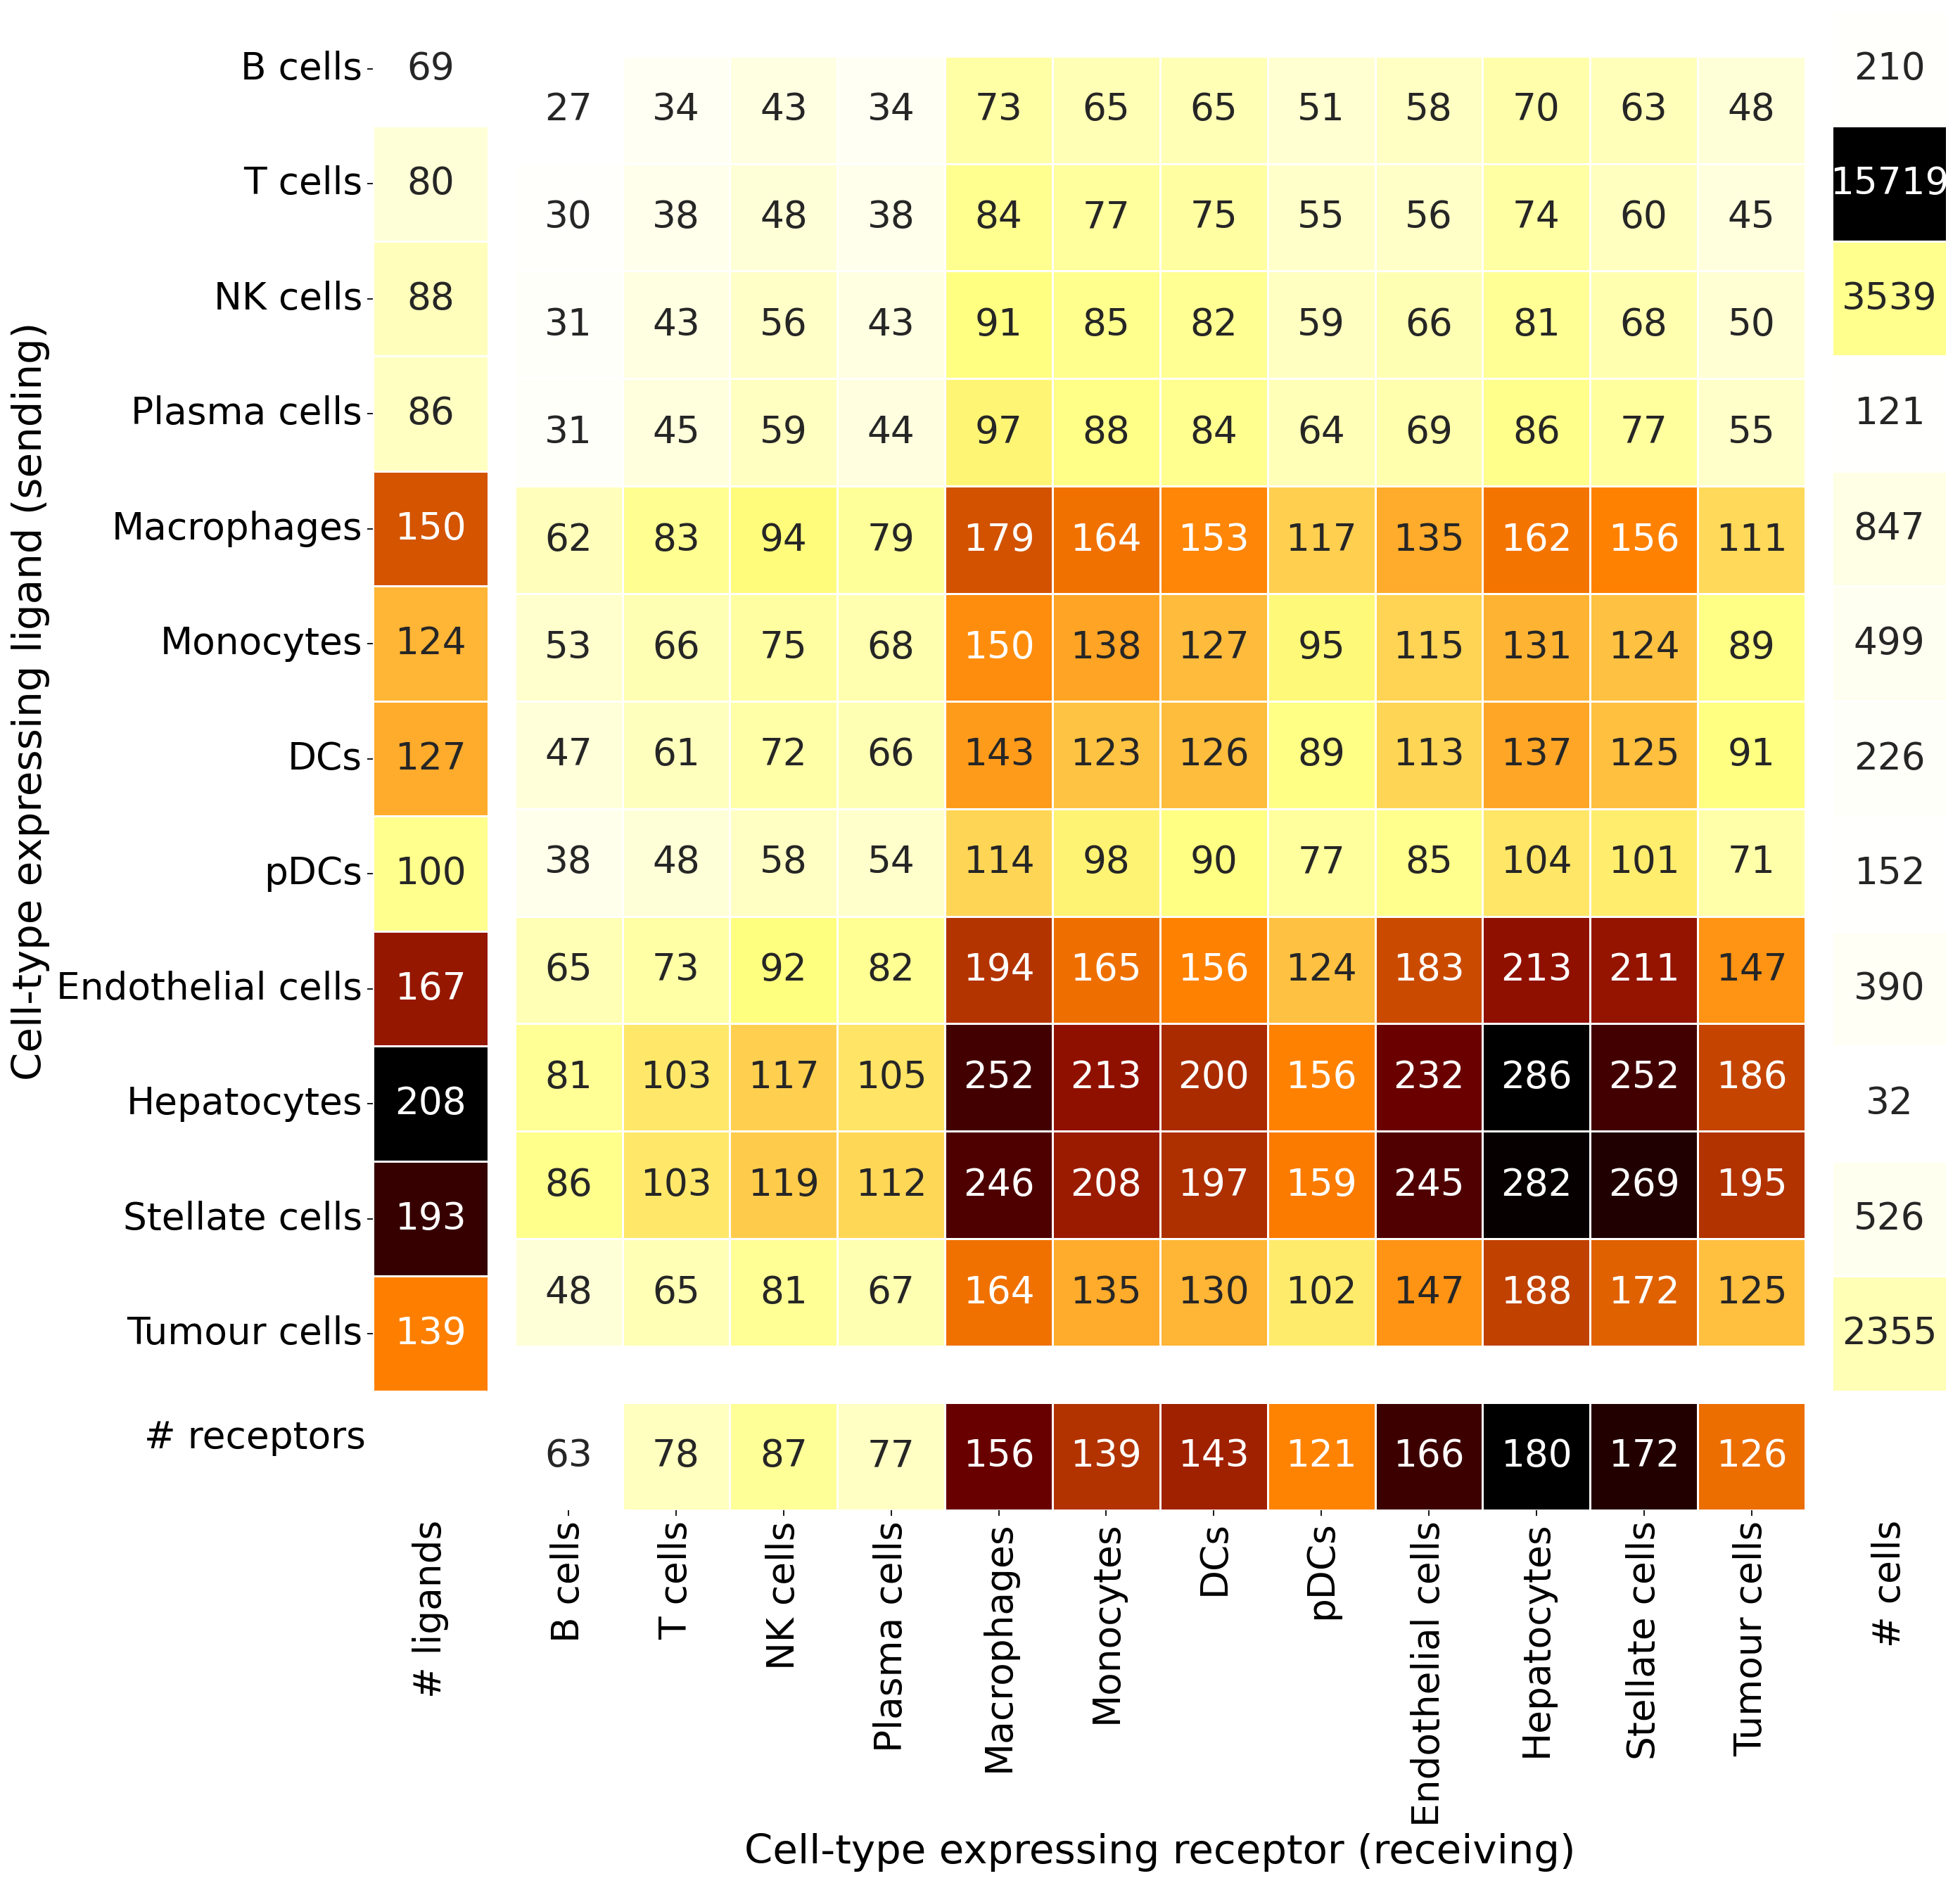

In [171]:
gridspec_kw = {"height_ratios":[dt.shape[0]-1,1], "width_ratios" : [1,dt.shape[0]-2,1]}
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(max(dt.shape)+2, max(dt.shape)+1), gridspec_kw=gridspec_kw)

left = 0.0625; right=0.9375
bottom = 0.01; top = 0.9
plt.subplots_adjust(left=left, right=right,bottom=bottom, top=top, wspace=0.05, hspace=0.01)

heatmapkws = dict(square=True, annot=True, annot_kws={"size":24}, fmt="d", cbar=False, cmap = cmap, linewidths=.5)#, vmin= dt.min().min(), vmax= dt.max().max())
#main matrix
sns.heatmap(dt.values[:(dt.shape[0]-1),1:-1], ax=axes[0,1], xticklabels=False, yticklabels=False, **heatmapkws)
#ligand matrix
sns.heatmap(dt.values[:(dt.shape[0]-1),:1], ax=axes[0,0], xticklabels=False, yticklabels=True, **heatmapkws)
#column cell matrix
sns.heatmap(dt.values[:(dt.shape[0]-1),-1:], ax=axes[0,2], xticklabels=False, yticklabels=False, **heatmapkws)
#receptor matrix
sns.heatmap(dt.values[(dt.shape[0]-1):,1:-1], ax=axes[1,1],xticklabels=True, yticklabels=False, **heatmapkws)

#left labels
yticklabels = list(dt.index[:(dt.shape[0]-1)])
axes[0,0].set_yticklabels(yticklabels,rotation=0,ha='right')
axes[0,0].tick_params(axis='both', which='major', labelsize=24)
axes[0,0].set_ylabel('Cell-type expressing ligand (sending)', fontsize=26)
#bottom labels
xticklabels = list(dt.columns[1:-1])
axes[1,1].set_xticklabels(xticklabels,rotation=90)
axes[1,1].tick_params(axis='both', which='major', labelsize=24)
axes[1,1].set_xlabel('Cell-type expressing receptor (receiving)', fontsize=26)

# receptor bar
axes[1,0].set_ylabel('# receptors', fontsize=24,rotation=0,ha='right')
#ligand bar
axes[1,0].set_xlabel('# ligands', fontsize=24,rotation=90)
# column cell bar
axes[1,2].set_xlabel('# cells', fontsize=24,rotation=90)

# remove other info
axes[1,0].tick_params(axis='both', which='both',grid_alpha=0, 
                      bottom=False, top=False, left=False, right=False,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False)
axes[1,2].tick_params(axis='both', which='both',grid_alpha=0, 
                      bottom=False, top=False, left=False, right=False,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False)
axes[1,0].set_frame_on(False)
axes[1,2].set_frame_on(False)


figItm = fig.get_figure()
figItm.savefig('All/c2cMtx_All.v1.pdf', bbox_inches = "tight")

In [138]:
adata = sc.read('liver_met_integrated_annotated_final_filtered.Adjacent.upm.lr.h5ad')
cts = sorted(list(set(adata.obs['manual_annot'])))
spls = sorted(list(set(adata.obs['orig.ident'])))
# obtain detected ligands and receptors in each cell type
lrDict = {}
for tct in cts:
    if tct != 'Tumour cells':
        print('===processing top cell type: %s' % tct)
        ligandDF = adata[adata.obs['manual_annot']==tct,ligandsAll]
        receptorDF = adata[adata.obs['manual_annot']==tct,receptorsAll]

        lmean = FilterEM(ligandDF,upmThrd,dctRate)
        rmean = FilterEM(receptorDF,upmThrd,dctRate)

        lrDict[tct] = [lmean,rmean]
    else:
        for spl in spls:
            cltname = tct + ' from ' + spl
            print('===processing top cell type: %s' % cltname)
            ligandDF = adata[(adata.obs['manual_annot']==tct)&(adata.obs['orig.ident']==spl),ligandsAll]
            receptorDF = adata[(adata.obs['manual_annot']==tct)&(adata.obs['orig.ident']==spl),receptorsAll]

            lmean = FilterEM(ligandDF,upmThrd,dctRate)
            rmean = FilterEM(receptorDF,upmThrd,dctRate)

            lrDict[cltname] = [lmean,rmean]

Only considering the two last: ['.lr', '.h5ad'].
Only considering the two last: ['.lr', '.h5ad'].
===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Hepatocytes
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells from WL24
===processing top cell type: pDCs


/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [139]:
lredgeCuntMtx = pd.DataFrame(0,index=lrDict.keys(),columns=lrDict.keys())
for sct in lrDict.keys():
    for tct in lrDict.keys():
        print('from %s to %s' % (sct,tct))
        rltDict = {'sending cell':[],'target cell':[],'ligand':[],'receptor':[],'ligand mean expression':[],'receptor mean expression':[],'edge weight':[]}
        for lridx in lrdb.index:
            lsymbl = lrdb.loc[lridx,'Ligand gene symbol']
            rsymbl = lrdb.loc[lridx,'Receptor gene symbol']
            if lsymbl in lrDict[sct][0].index and rsymbl in lrDict[tct][1].index:
                rltDict['sending cell'].append(sct)
                rltDict['target cell'].append(tct)
                rltDict['ligand'].append(lsymbl)
                rltDict['receptor'].append(rsymbl)
                rltDict['ligand mean expression'].append(lrDict[sct][0][lsymbl])
                rltDict['receptor mean expression'].append(lrDict[tct][1][rsymbl])
                rltDict['edge weight'].append(lrDict[sct][0][lsymbl]*lrDict[tct][1][rsymbl])
        rltdf = pd.DataFrame(rltDict)
        lredgeCuntMtx.loc[sct,tct] = len(rltdf)
        rltdf.to_excel('adjacent/%s_2_%s_thrd_%s_dec_%s.xlsx' % (sct,tct,upmThrd,dctRate), index=False, header=True, columns = ['sending cell','target cell','ligand','receptor','ligand mean expression','receptor mean expression','edge weight'])
lredgeCuntMtx.to_excel('adjacent/c2c_source_matrix.xlsx', index=True, header=True, columns = lrDict.keys())

from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Hepatocytes
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells from WL24
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Hepatocytes
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cells
from DCs to T cells
from DCs to Tumour cells from WL24
from DCs to pDCs
from Endothelial cells to B cells
from Endothelial cells to DCs
from Endothelial cells to Endothelial cells
from Endothelial cells to Hepatocytes
from Endothelial cells to Macrophages
from Endothelial cells to Monocytes
from Endothelial cells to NK cells
from Endothelial cells to Plasma cells
from Endothelial cells to Stellate cells
from Endothelial cells to T cells
from Endothelial cell

In [140]:
lrsigCuntMtx = pd.DataFrame(0,index=lrDict.keys(),columns=['ligand','receptor','cell'])
sumCell = 0
for sct in cts:
    if sct != 'Tumour cells':
        print('checking cell type: %s' % sct)
        ligCunt = len(lrDict[sct][0])
        rcpCunt = len(lrDict[sct][1])
        cellCunt = len(adata.obs.loc[adata.obs['manual_annot']==sct,])
        sumCell += cellCunt
        lrsigCuntMtx.loc[sct,'ligand'] = ligCunt
        lrsigCuntMtx.loc[sct,'receptor'] = rcpCunt
        lrsigCuntMtx.loc[sct,'cell'] = cellCunt
    else:
        for spl in spls:
            cltname = sct + ' from ' + spl
            print('checking cell type: %s' % cltname)
            ligCunt = len(lrDict[cltname][0])
            rcpCunt = len(lrDict[cltname][1])
            cellCunt = len(adata.obs.loc[(adata.obs['manual_annot']==sct)&(adata.obs['orig.ident']==spl),])
            sumCell += cellCunt
            lrsigCuntMtx.loc[cltname,'ligand'] = ligCunt
            lrsigCuntMtx.loc[cltname,'receptor'] = rcpCunt
            lrsigCuntMtx.loc[cltname,'cell'] = cellCunt
lrsigCuntMtx.to_excel('adjacent/sig_count_source_matrix.xlsx', index=True, header=True, columns = ['ligand','receptor','cell'])
print(sumCell)
print(lrsigCuntMtx)

checking cell type: B cells
checking cell type: DCs
checking cell type: Endothelial cells
checking cell type: Hepatocytes
checking cell type: Macrophages
checking cell type: Monocytes
checking cell type: NK cells
checking cell type: Plasma cells
checking cell type: Stellate cells
checking cell type: T cells
checking cell type: Tumour cells from WL24
checking cell type: pDCs
4732
                        ligand  receptor  cell
B cells                     73        69    19
DCs                        146       157    40
Endothelial cells          177       175    47
Hepatocytes                173       149     7
Macrophages                142       166    69
Monocytes                  125       143   124
NK cells                    94        99  1089
Plasma cells                68        62    15
Stellate cells             162       162    12
T cells                     89        83  3275
Tumour cells from WL24     186       196    18
pDCs                       112       128    17


In [141]:
sumCell = 0
for sct in cts:
    if sct != 'Tumour cells':
        cellCunt = len(adata.obs.loc[adata.obs['manual_annot']==sct,])
        sumCell += cellCunt
        print('checking cell type: %s \t %s' % (sct,cellCunt))
    else:
        tmt = adata.obs.loc[(adata.obs['manual_annot']==sct),'orig.ident']
        print(set(tmt))
        tmtCunt = len(adata.obs.loc[(adata.obs['manual_annot']==sct),])
        print(tmtCunt)
print(sumCell)

checking cell type: B cells 	 19
checking cell type: DCs 	 40
checking cell type: Endothelial cells 	 47
checking cell type: Hepatocytes 	 7
checking cell type: Macrophages 	 69
checking cell type: Monocytes 	 124
checking cell type: NK cells 	 1089
checking cell type: Plasma cells 	 15
checking cell type: Stellate cells 	 12
checking cell type: T cells 	 3275
{'WL24'}
18
checking cell type: pDCs 	 17
4714


In [142]:
finalOrders = lrsigCuntMtx.index
finalOrders = ['B cells',  'T cells','NK cells', 'Plasma cells',
               'Macrophages', 'Monocytes', 'DCs', 'pDCs', 
               'Endothelial cells', 'Hepatocytes',  'Stellate cells',
       'Tumour cells from WL24']
print(finalOrders)

['B cells', 'T cells', 'NK cells', 'Plasma cells', 'Macrophages', 'Monocytes', 'DCs', 'pDCs', 'Endothelial cells', 'Hepatocytes', 'Stellate cells', 'Tumour cells from WL24']


In [143]:
# merge sig_count_source_matrix.xlsx and c2c_source_matrix.xlsx to build c2c_merge.xlsx
dt = pd.read_excel('adjacent/c2c_merge_adjacent.xlsx',index_col=0,header=0).fillna(0).astype(int)
dt=dt.loc[finalOrders+['receptor count'],['ligand count']+finalOrders+['cell count']]
dt

/home/ubuntu/miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


ligand count  B cells  T cells  NK cells  \
B cells                           73       29       39        48   
T cells                           89       33       44        55   
NK cells                          94       32       46        62   
Plasma cells                      68       23       35        48   
Macrophages                      142       58       82        97   
Monocytes                        125       54       69        82   
DCs                              146       62       83        98   
pDCs                             112       38       54        68   
Endothelial cells                177       68       79       101   
Hepatocytes                      173       72       91       110   
Stellate cells                   162       62       70        88   
Tumour cells from WL24           186       65       86       104   
receptor count                     0       69       83        99   

                        Plasma cells  Macrophages  Monocytes  DCs  pDCs  \
B cells                           34           81         70   80    52   
T cells                           39           98         82   90    59   
NK cells                          42          104         89   98    65   
Plasma cells                      32           81         70   74    50   
Macrophages                       65          170        151  155   105   
Monocytes                         57          148        129  133    95   
DCs                               70          165        144  156   112   
pDCs                              47          118        103  110    84   
Endothelial cells                 73          197        170  187   133   
Hepatocytes                       78          203        182  186   138   
Stellate cells                    64          180        158  166   119   
Tumour cells from WL24            76          185        159  178   128   
receptor count                    62          166        143  157   128   

                        Endothelial cells  Hepatocytes  Stellate cells  \
B cells                                73           67              72   
T cells                                72           73              67   
NK cells                               81           80              77   
Plasma cells                           62           61              58   
Macrophages                           145          136             134   
Monocytes                             128          120             119   
DCs                                   154          143             137   
pDCs                                  103           92              95   
Endothelial cells                     215          191             197   
Hepatocytes                           210          203             204   
Stellate cells                        184          177             182   
Tumour cells from WL24                187          168             167   
receptor count                        175          149             162   

                        Tumour cells from WL24  cell count  
B cells                                     81          19  
T cells                                     90        3275  
NK cells                                    97        1089  
Plasma cells                                76          15  
Macrophages                                161          69  
Monocytes                                  141         124  
DCs                                        165          40  
pDCs                                       120          17  
Endothelial cells                          213          47  
Hepatocytes                                208           7  
Stellate cells                             190          12  
Tumour cells from WL24                     198          18  
receptor count                             196           0

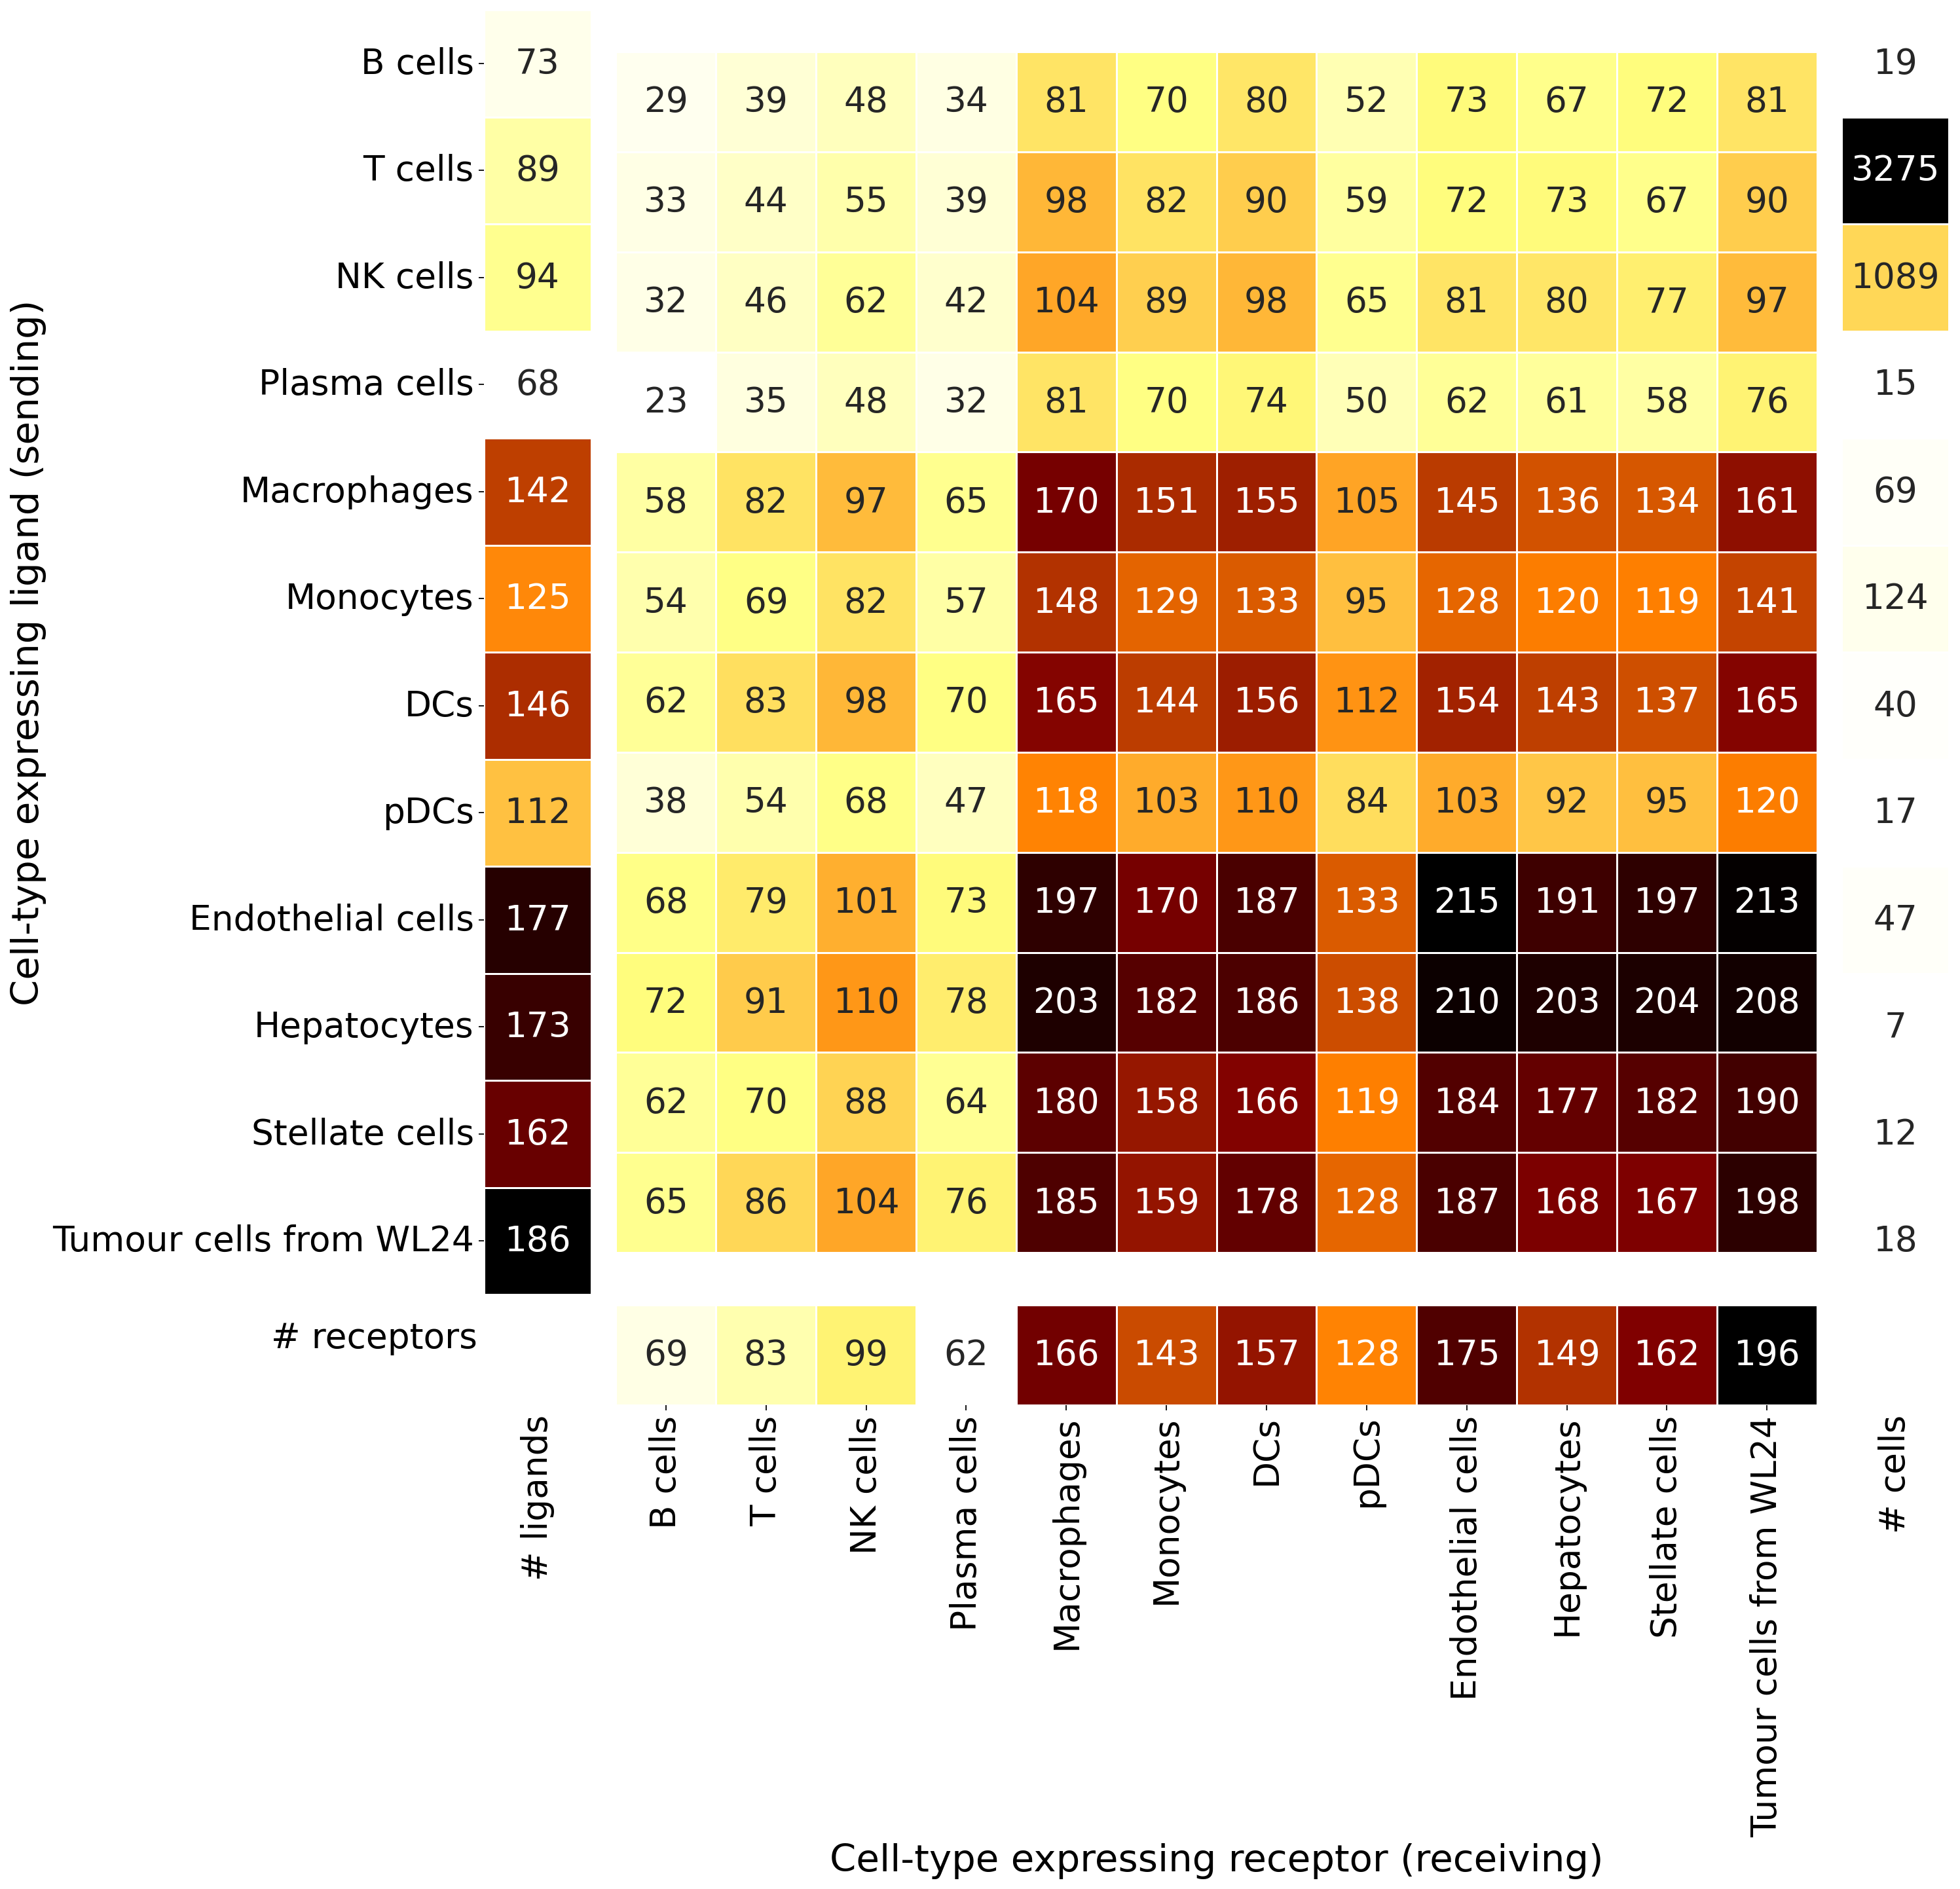

In [144]:
gridspec_kw = {"height_ratios":[dt.shape[0]-1,1], "width_ratios" : [1,dt.shape[0]-2,1]}
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(max(dt.shape)+2, max(dt.shape)+1), gridspec_kw=gridspec_kw)

left = 0.0625; right=0.9375
bottom = 0.01; top = 0.9
plt.subplots_adjust(left=left, right=right,bottom=bottom, top=top, wspace=0.05, hspace=0.01)

heatmapkws = dict(square=True, annot=True, annot_kws={"size":24}, fmt="d", cbar=False, cmap = cmap, linewidths=.5)#, vmin= dt.min().min(), vmax= dt.max().max())
#main matrix
sns.heatmap(dt.values[:(dt.shape[0]-1),1:-1], ax=axes[0,1], xticklabels=False, yticklabels=False, **heatmapkws)
#ligand matrix
sns.heatmap(dt.values[:(dt.shape[0]-1),:1], ax=axes[0,0], xticklabels=False, yticklabels=True, **heatmapkws)
#column cell matrix
sns.heatmap(dt.values[:(dt.shape[0]-1),-1:], ax=axes[0,2], xticklabels=False, yticklabels=False, **heatmapkws)
#receptor matrix
sns.heatmap(dt.values[(dt.shape[0]-1):,1:-1], ax=axes[1,1],xticklabels=True, yticklabels=False, **heatmapkws)

#left labels
yticklabels = list(dt.index[:(dt.shape[0]-1)])
axes[0,0].set_yticklabels(yticklabels,rotation=0,ha='right')
axes[0,0].tick_params(axis='both', which='major', labelsize=24)
axes[0,0].set_ylabel('Cell-type expressing ligand (sending)', fontsize=26)
#bottom labels
xticklabels = list(dt.columns[1:-1])
axes[1,1].set_xticklabels(xticklabels,rotation=90)
axes[1,1].tick_params(axis='both', which='major', labelsize=24)
axes[1,1].set_xlabel('Cell-type expressing receptor (receiving)', fontsize=26)

# receptor bar
axes[1,0].set_ylabel('# receptors', fontsize=24,rotation=0,ha='right')
#ligand bar
axes[1,0].set_xlabel('# ligands', fontsize=24,rotation=90)
# column cell bar
axes[1,2].set_xlabel('# cells', fontsize=24,rotation=90)

# remove other info
axes[1,0].tick_params(axis='both', which='both',grid_alpha=0, 
                      bottom=False, top=False, left=False, right=False,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False)
axes[1,2].tick_params(axis='both', which='both',grid_alpha=0, 
                      bottom=False, top=False, left=False, right=False,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False)
axes[1,0].set_frame_on(False)
axes[1,2].set_frame_on(False)


figItm = fig.get_figure()
figItm.savefig('adjacent/c2cMtx_adjacent.v1.pdf', bbox_inches = "tight")

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: Endothelial cells
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
from Endothelial cells to Endothelial cells
from Endothelial cells to Macrophages
from Endothelial cells to Monocytes
from Endothelial cells to NK cells
from Endothelial cells to Stellate cells
from Endothelial cells to T cells
from Endothelial cells to Tumour cells
from Macrophages to Endothelial cells
from Macrophages to Macrophages
from Macrophages to Monocytes
from Macrophages to NK cells
from Macrophages to Stellate cells
from Macrophages to T cells
from Macrophages to Tumour cells
from Monocytes to Endothelial cells
from Monocytes to Macrophages
from Monocytes to Monocytes
from Monocytes to NK cells
from Monocytes to Stellate cells
from Monocytes to T cells
from Monocytes to Tumour cells
from NK c

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
===processing top cell type: pDCs
from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cells
from DCs to T cells
from DCs to Tumour cells
from DCs to pDCs
from Endothelial cells to B 

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Hepatocytes
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
===processing top cell type: pDCs
from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Hepatocytes
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Hepatocytes
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cel

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
===processing top cell type: pDCs
from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cells
from DCs to T cells
from DCs to Tumour cells
from DCs to pDCs
from Endothelial cells to B 

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
===processing top cell type: pDCs
from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cells
from DCs to T cells
from DCs to Tumour cells
from DCs to pDCs
from Endothelial cells to B 

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Hepatocytes
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
===processing top cell type: pDCs
from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Hepatocytes
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Hepatocytes
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cel

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Hepatocytes
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
===processing top cell type: pDCs
from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Hepatocytes
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Hepatocytes
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cel

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Hepatocytes
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Hepatocytes
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Hepatocytes
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cells
from DCs to T cells
from DCs to Tumour cells
from En

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Hepatocytes
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
===processing top cell type: pDCs
from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Hepatocytes
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Hepatocytes
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cel

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


===processing top cell type: B cells
===processing top cell type: DCs
===processing top cell type: Endothelial cells
===processing top cell type: Hepatocytes
===processing top cell type: Macrophages
===processing top cell type: Monocytes
===processing top cell type: NK cells
===processing top cell type: Plasma cells
===processing top cell type: Stellate cells
===processing top cell type: T cells
===processing top cell type: Tumour cells
===processing top cell type: pDCs
from B cells to B cells
from B cells to DCs
from B cells to Endothelial cells
from B cells to Hepatocytes
from B cells to Macrophages
from B cells to Monocytes
from B cells to NK cells
from B cells to Plasma cells
from B cells to Stellate cells
from B cells to T cells
from B cells to Tumour cells
from B cells to pDCs
from DCs to B cells
from DCs to DCs
from DCs to Endothelial cells
from DCs to Hepatocytes
from DCs to Macrophages
from DCs to Monocytes
from DCs to NK cells
from DCs to Plasma cells
from DCs to Stellate cel

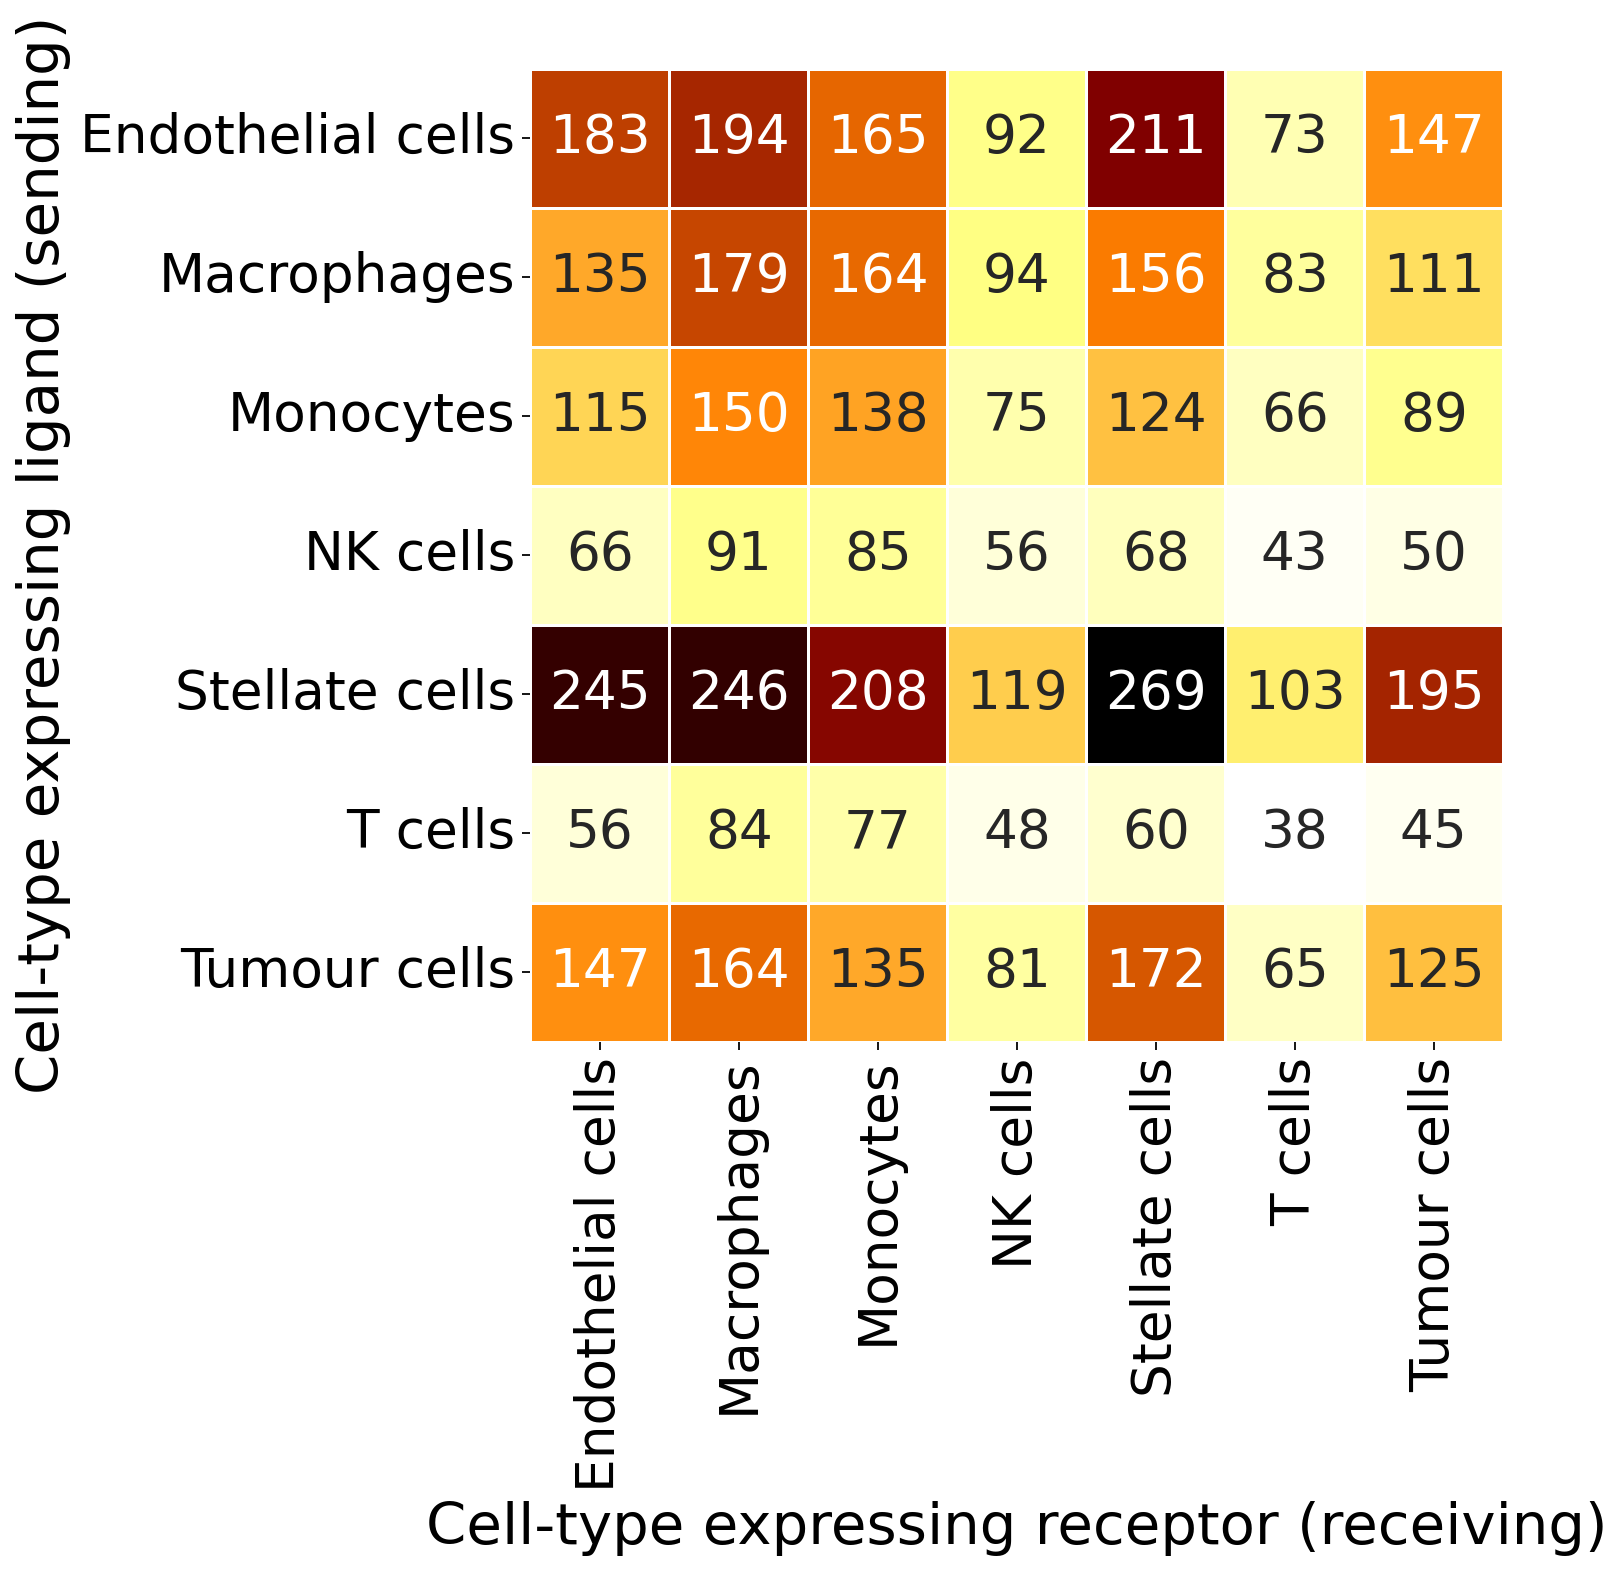

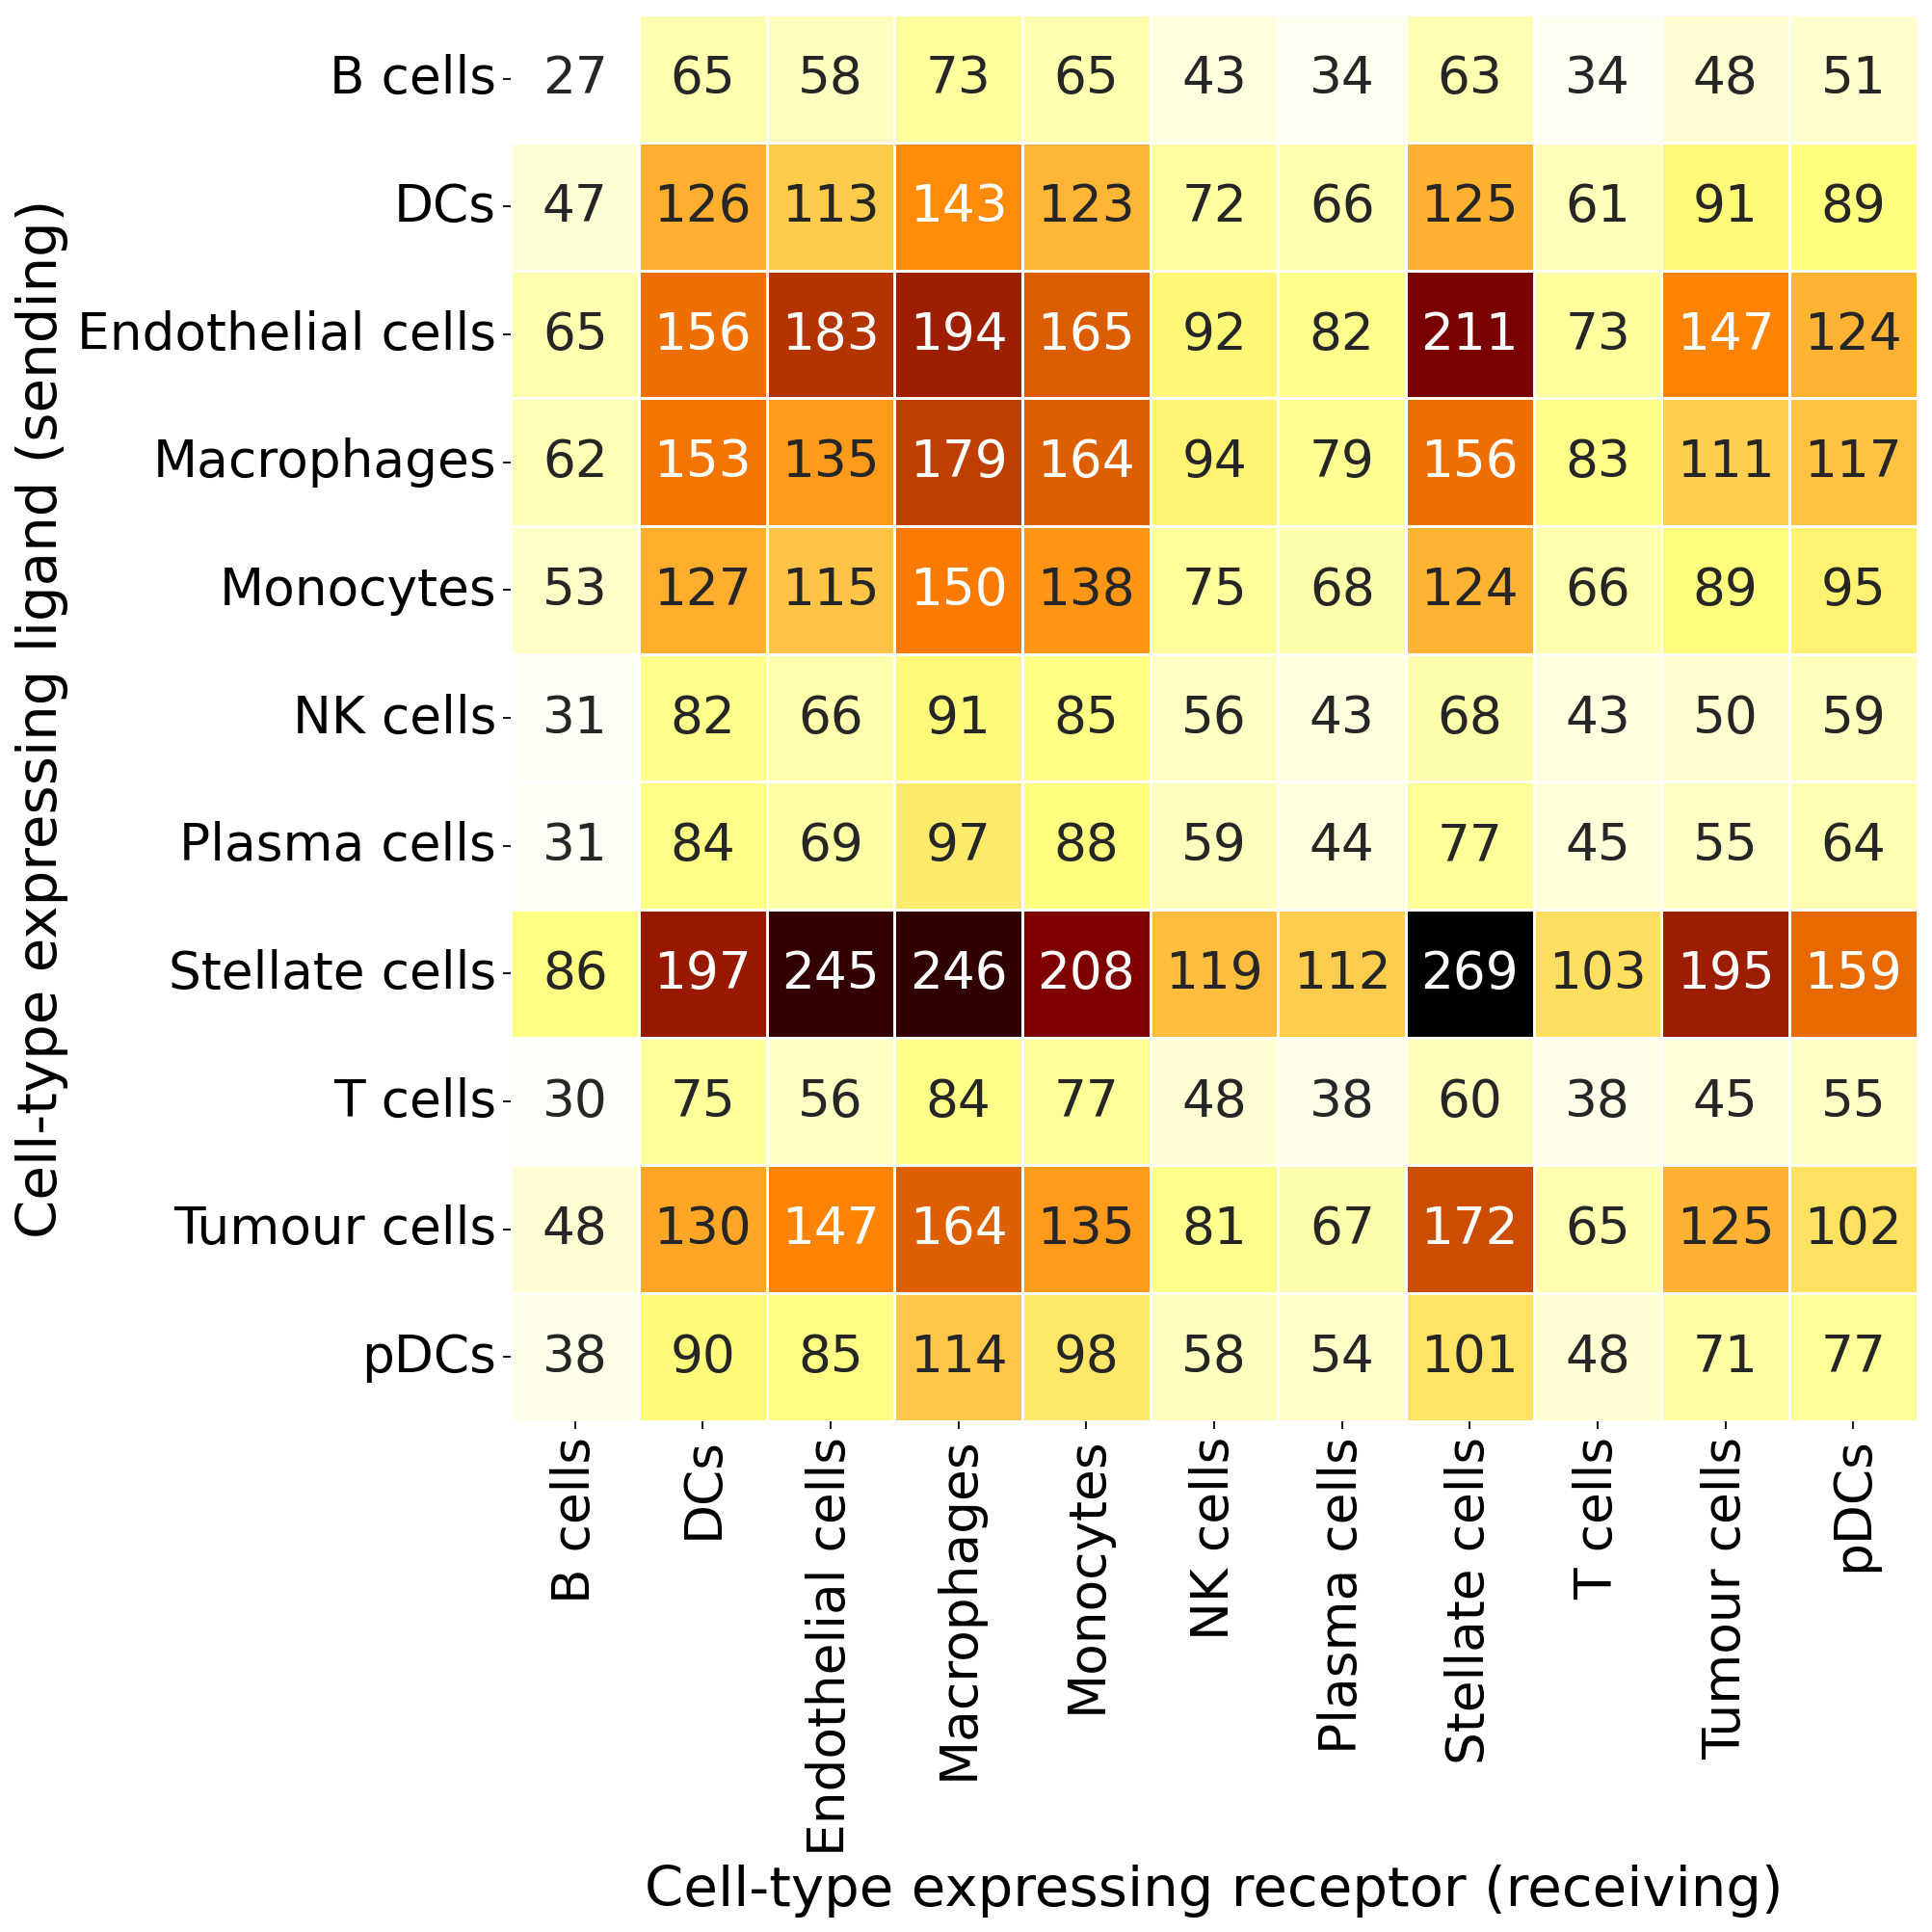

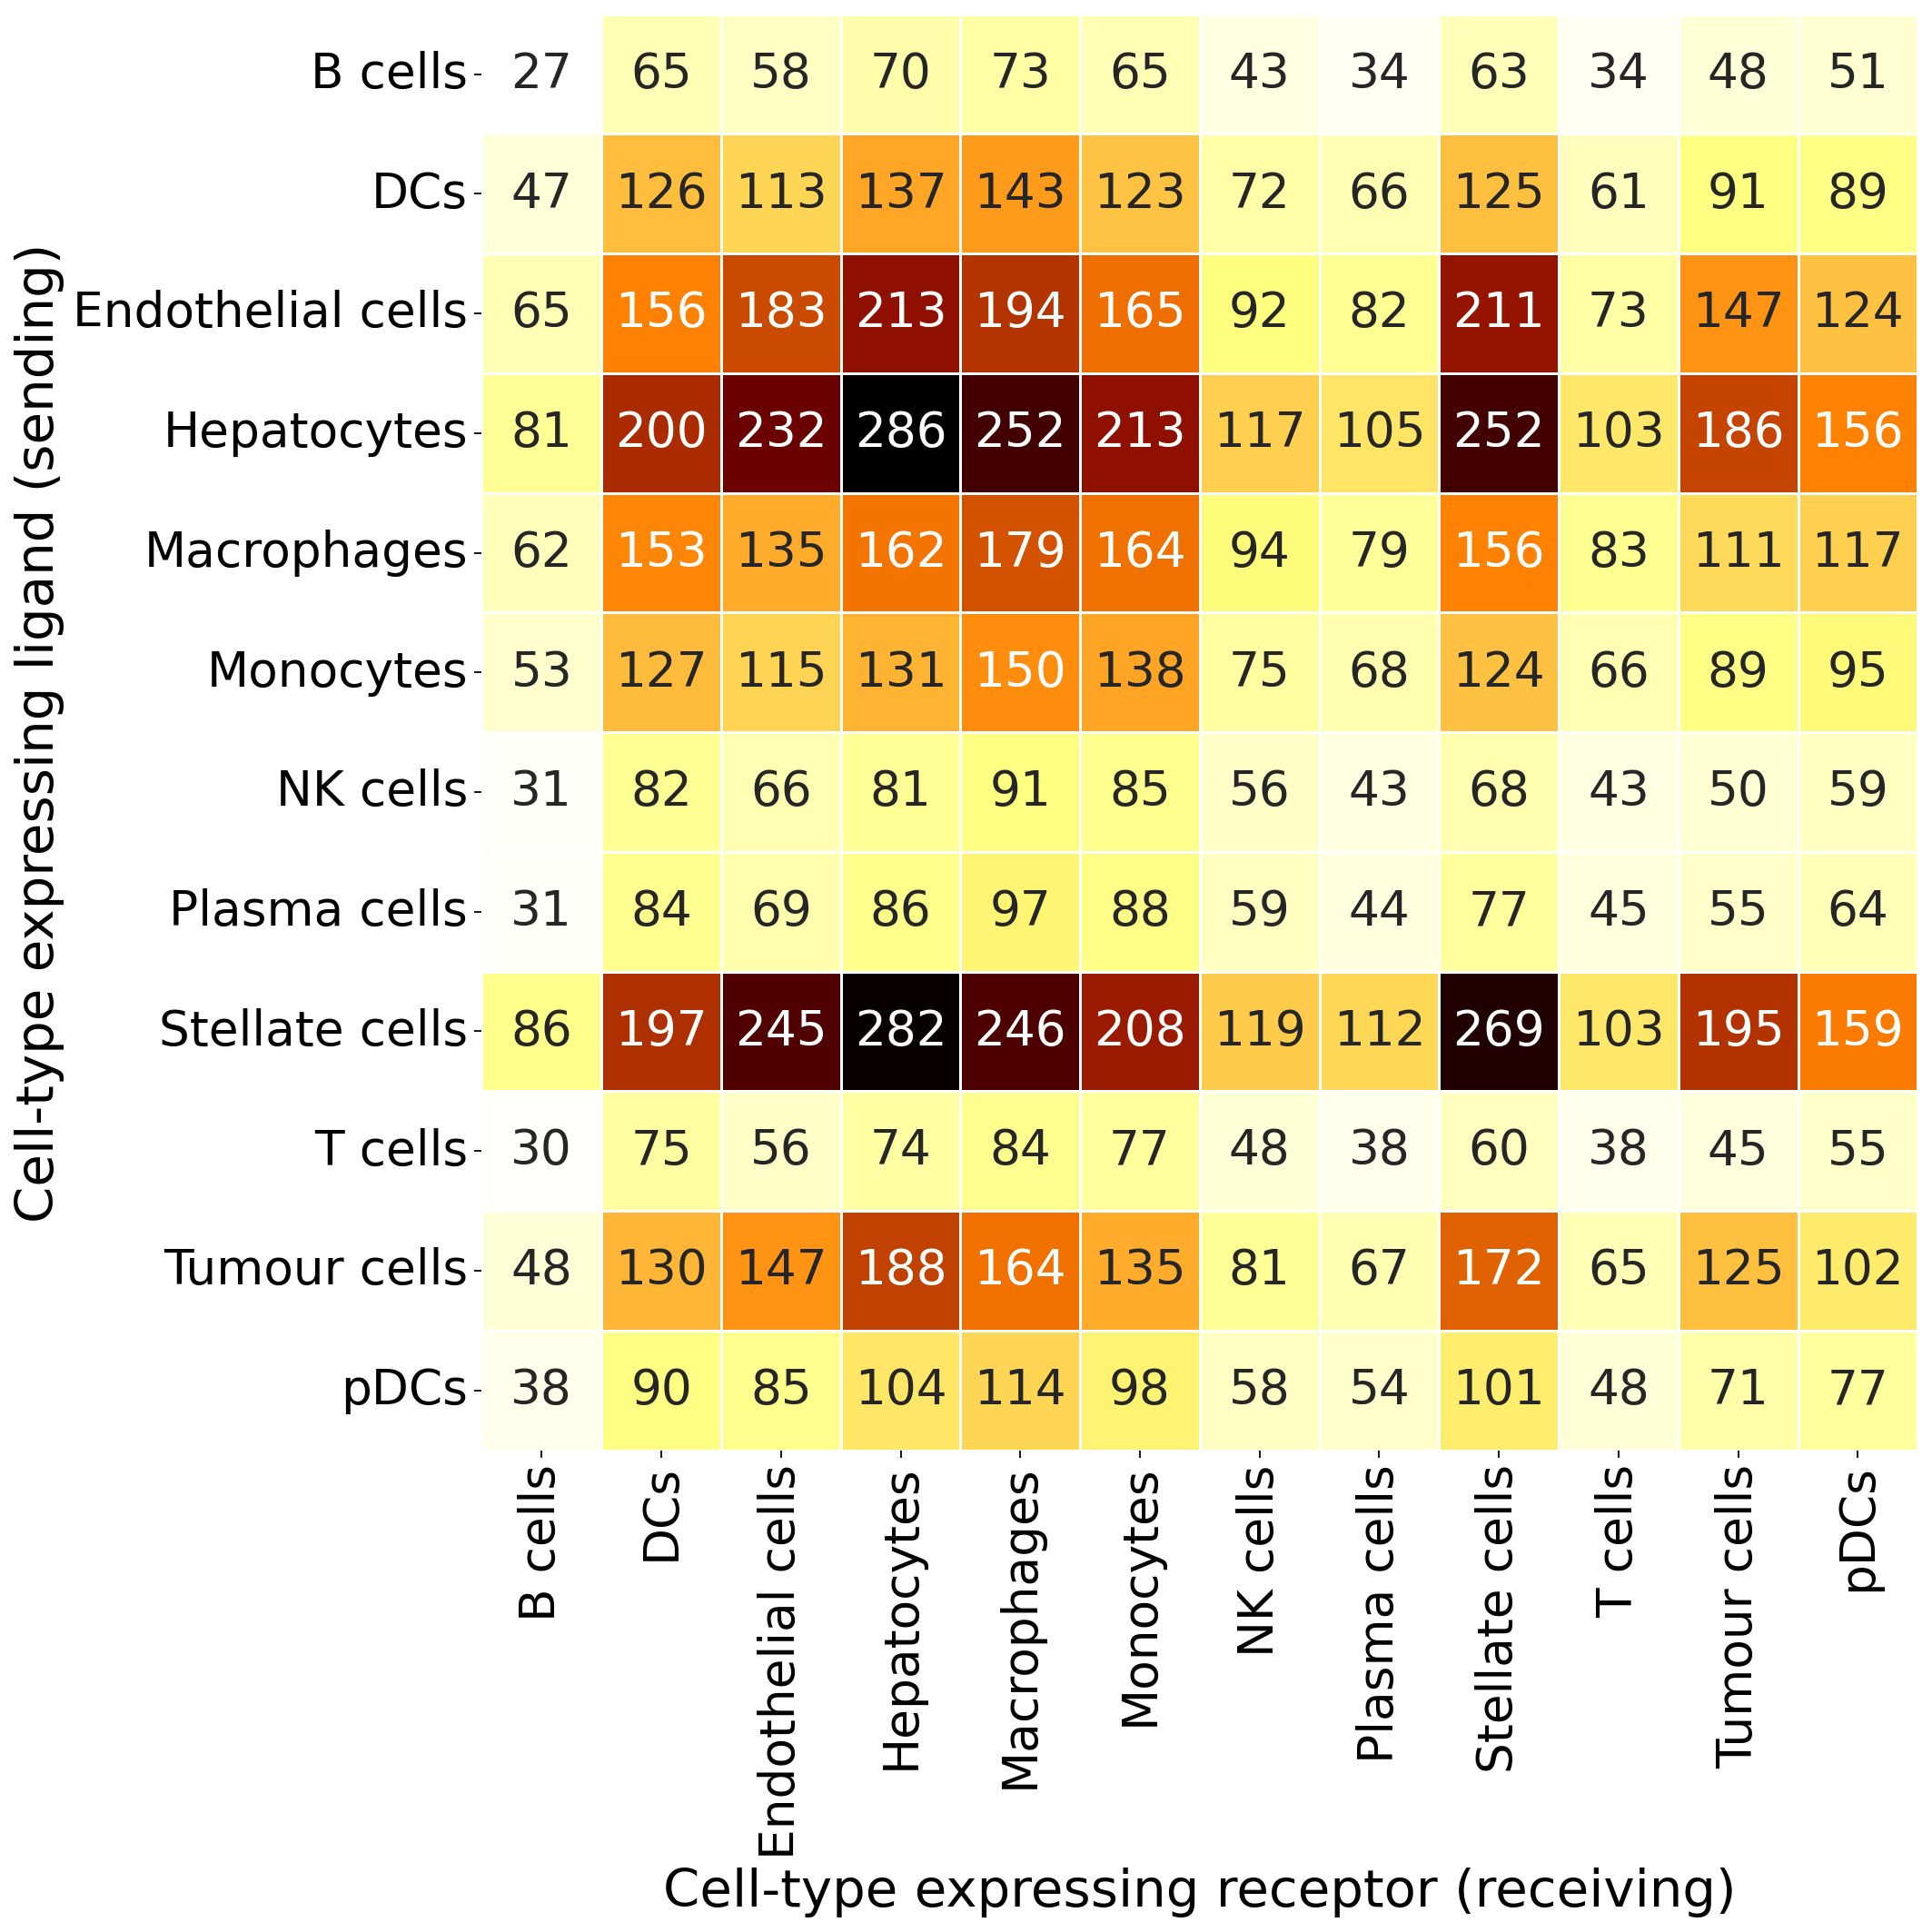

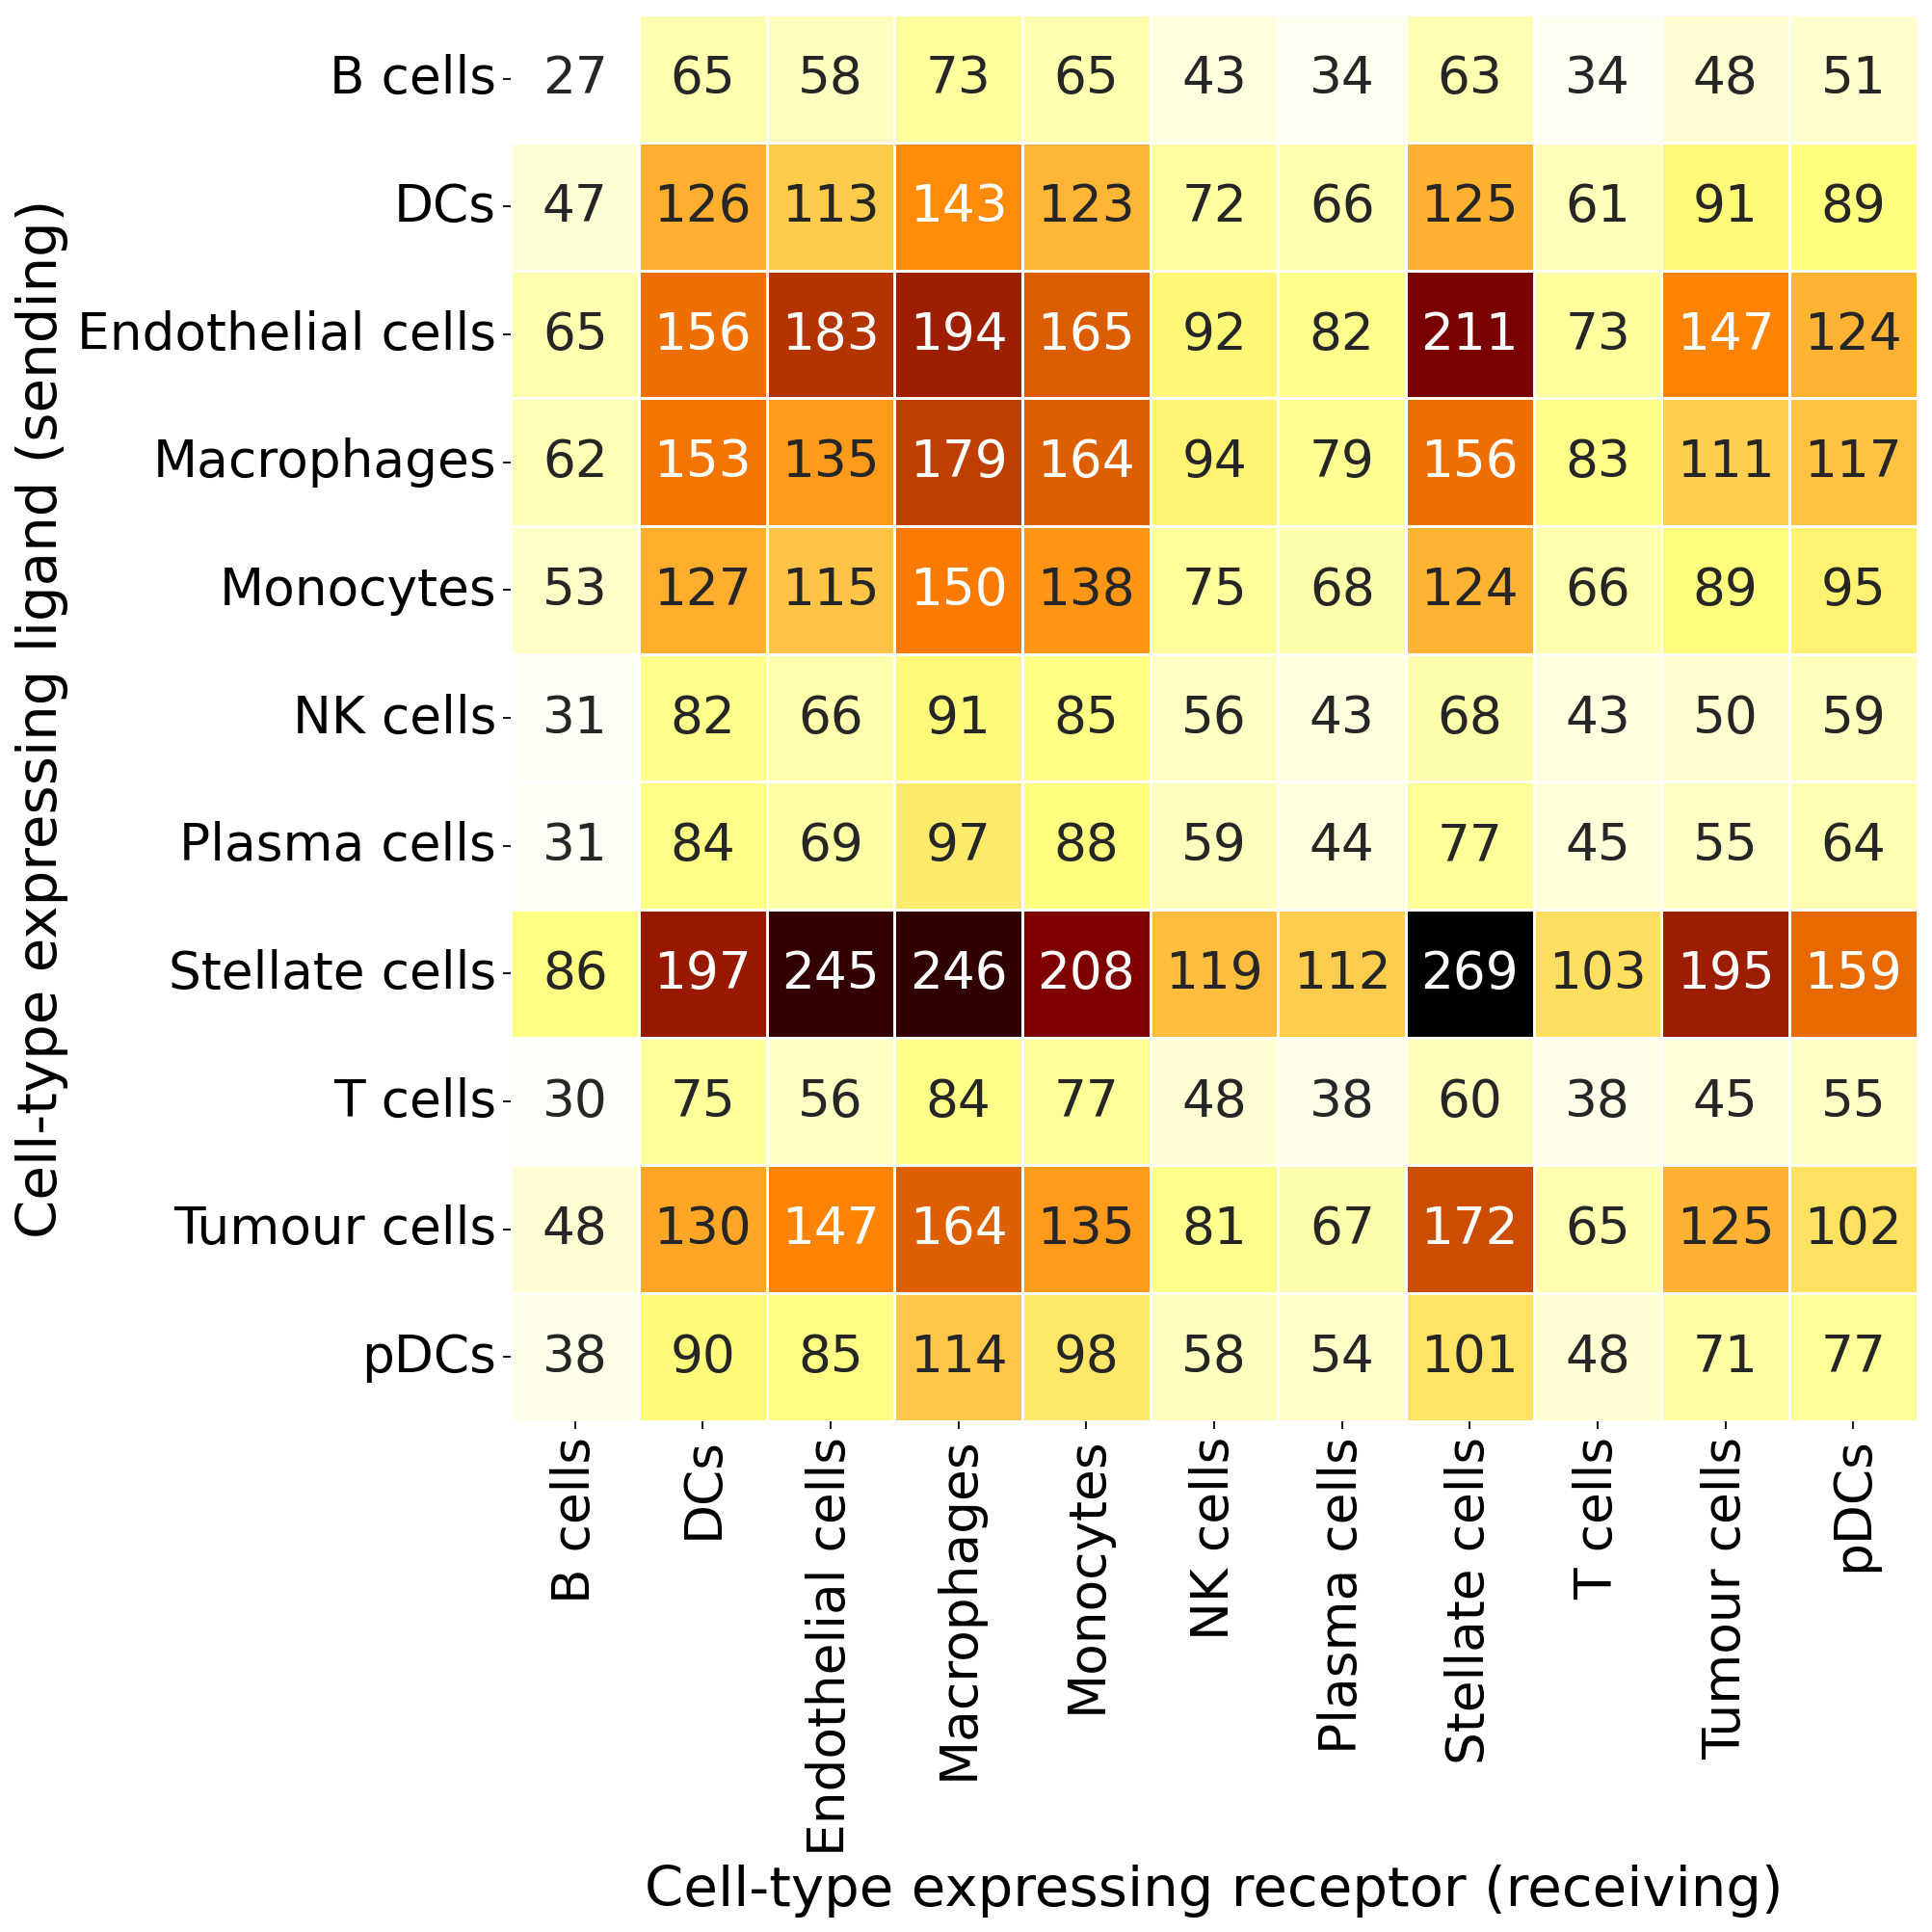

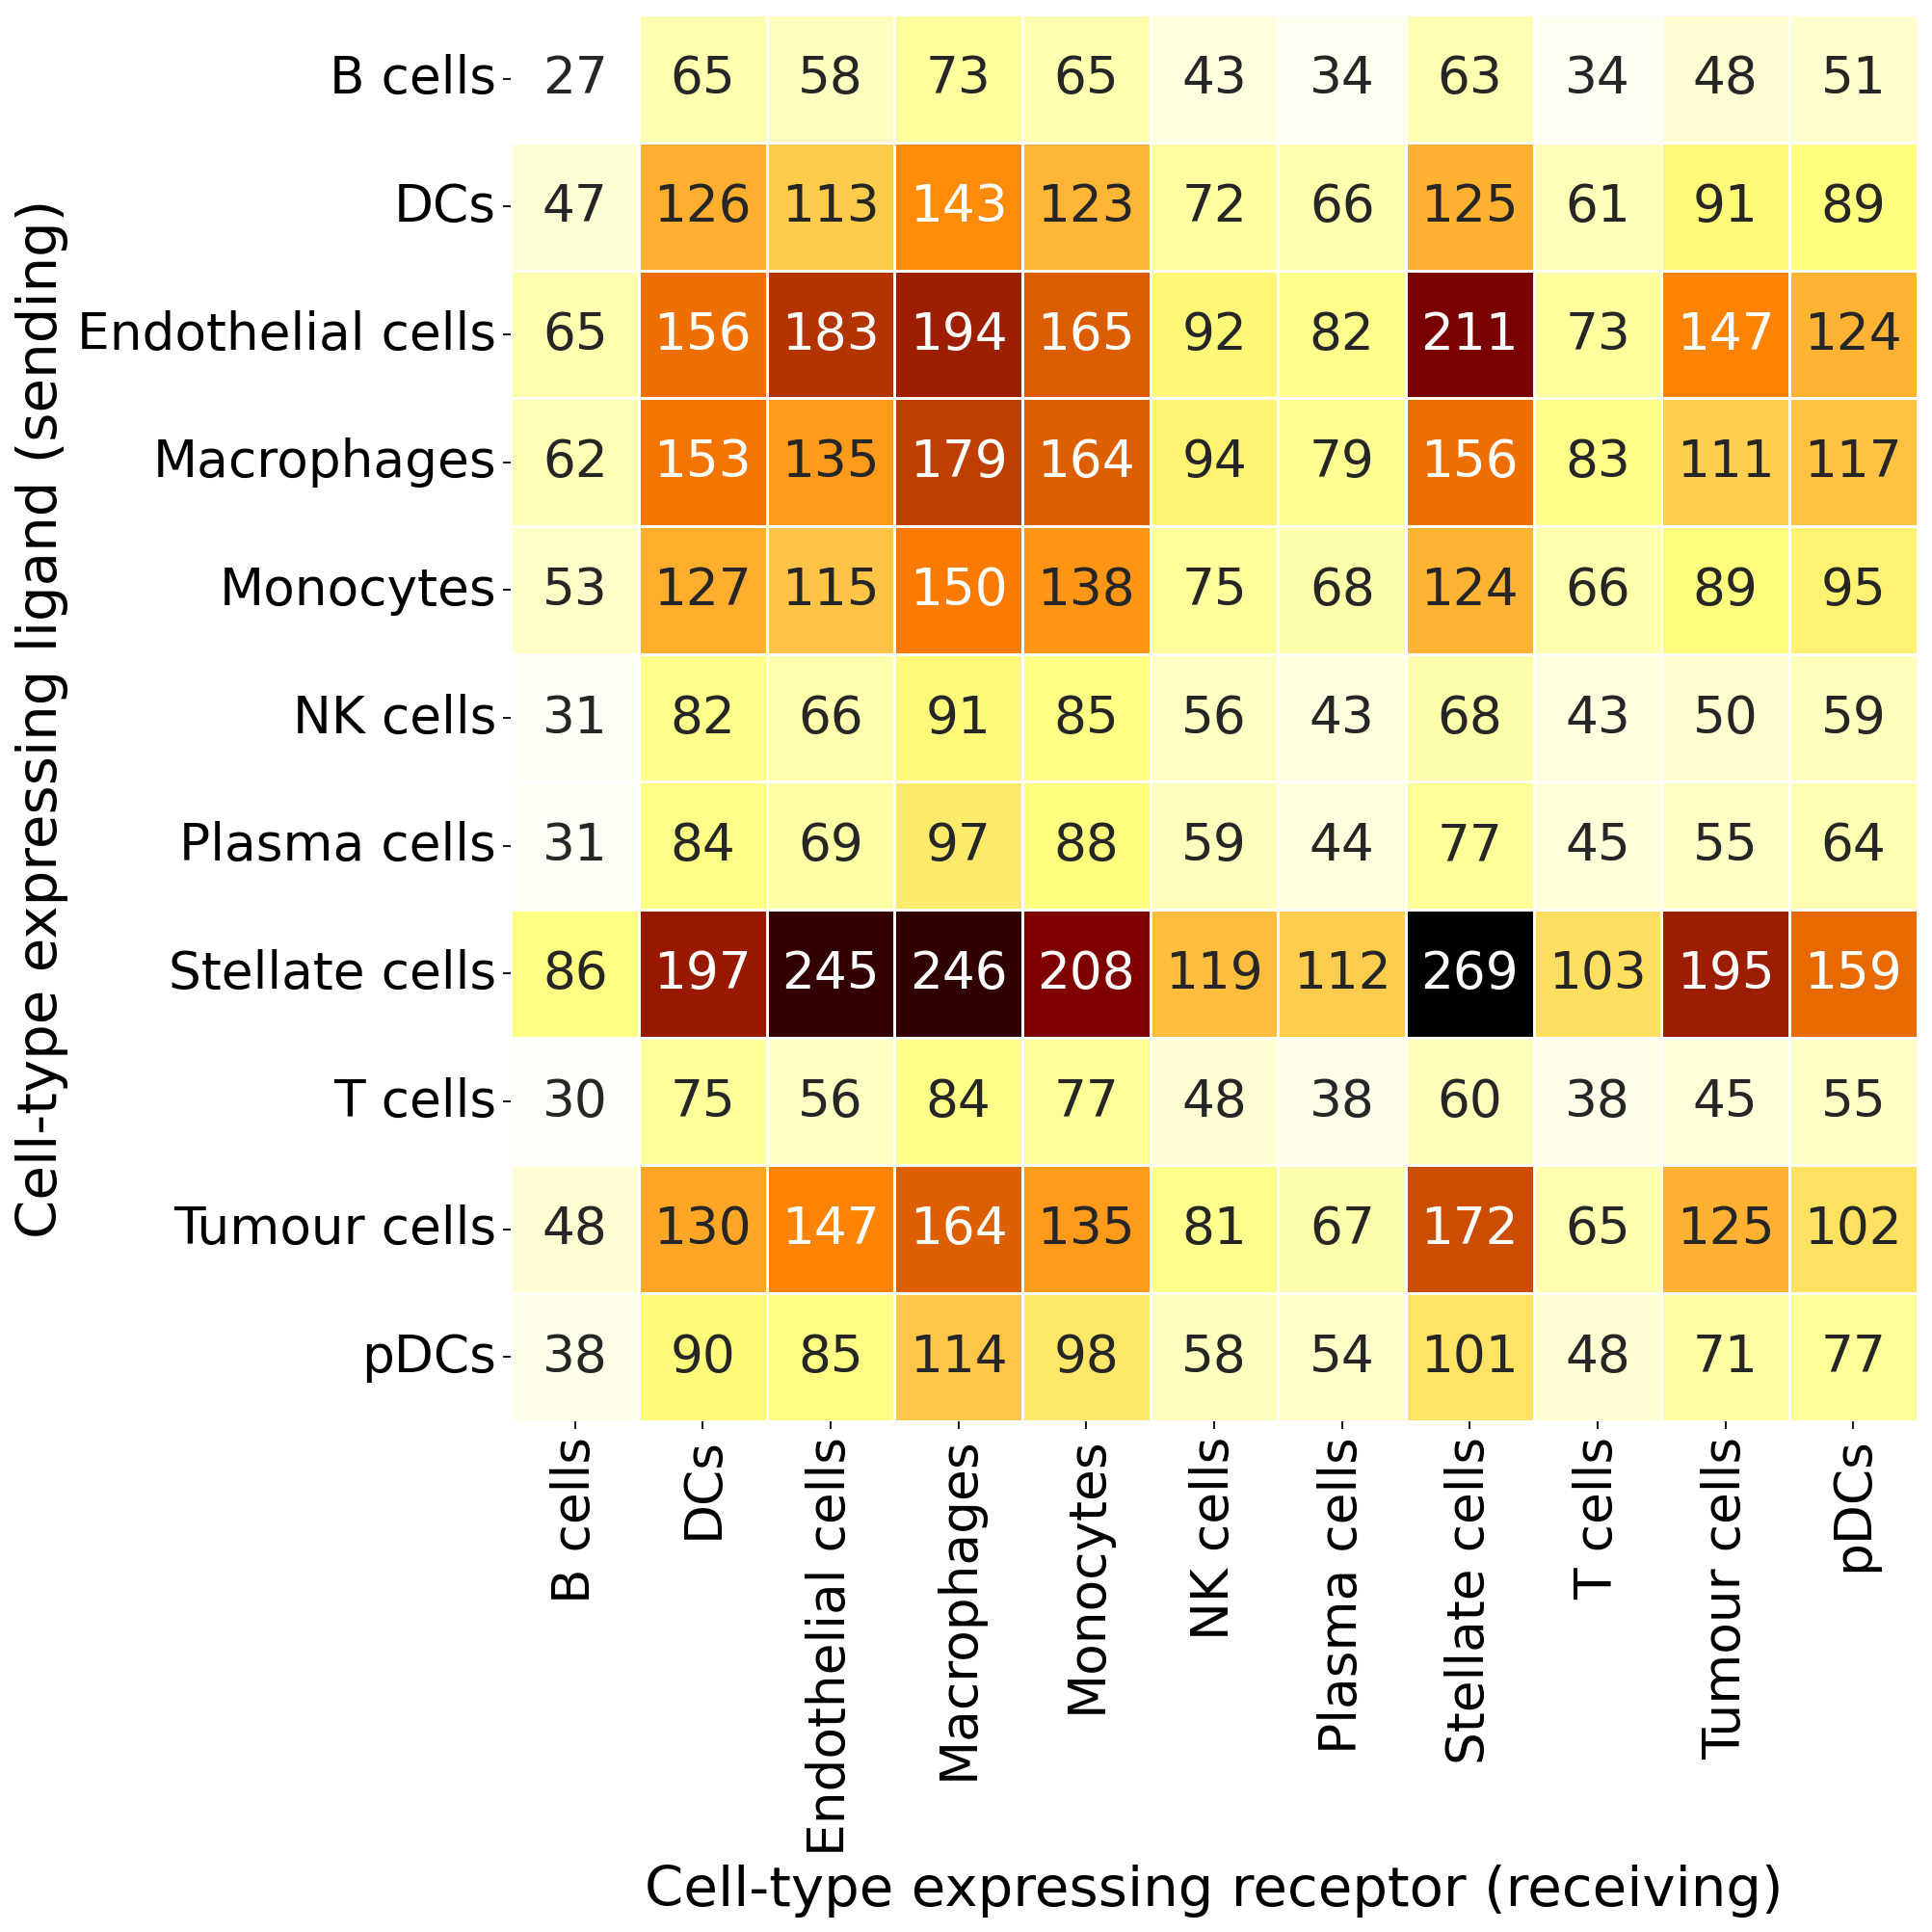

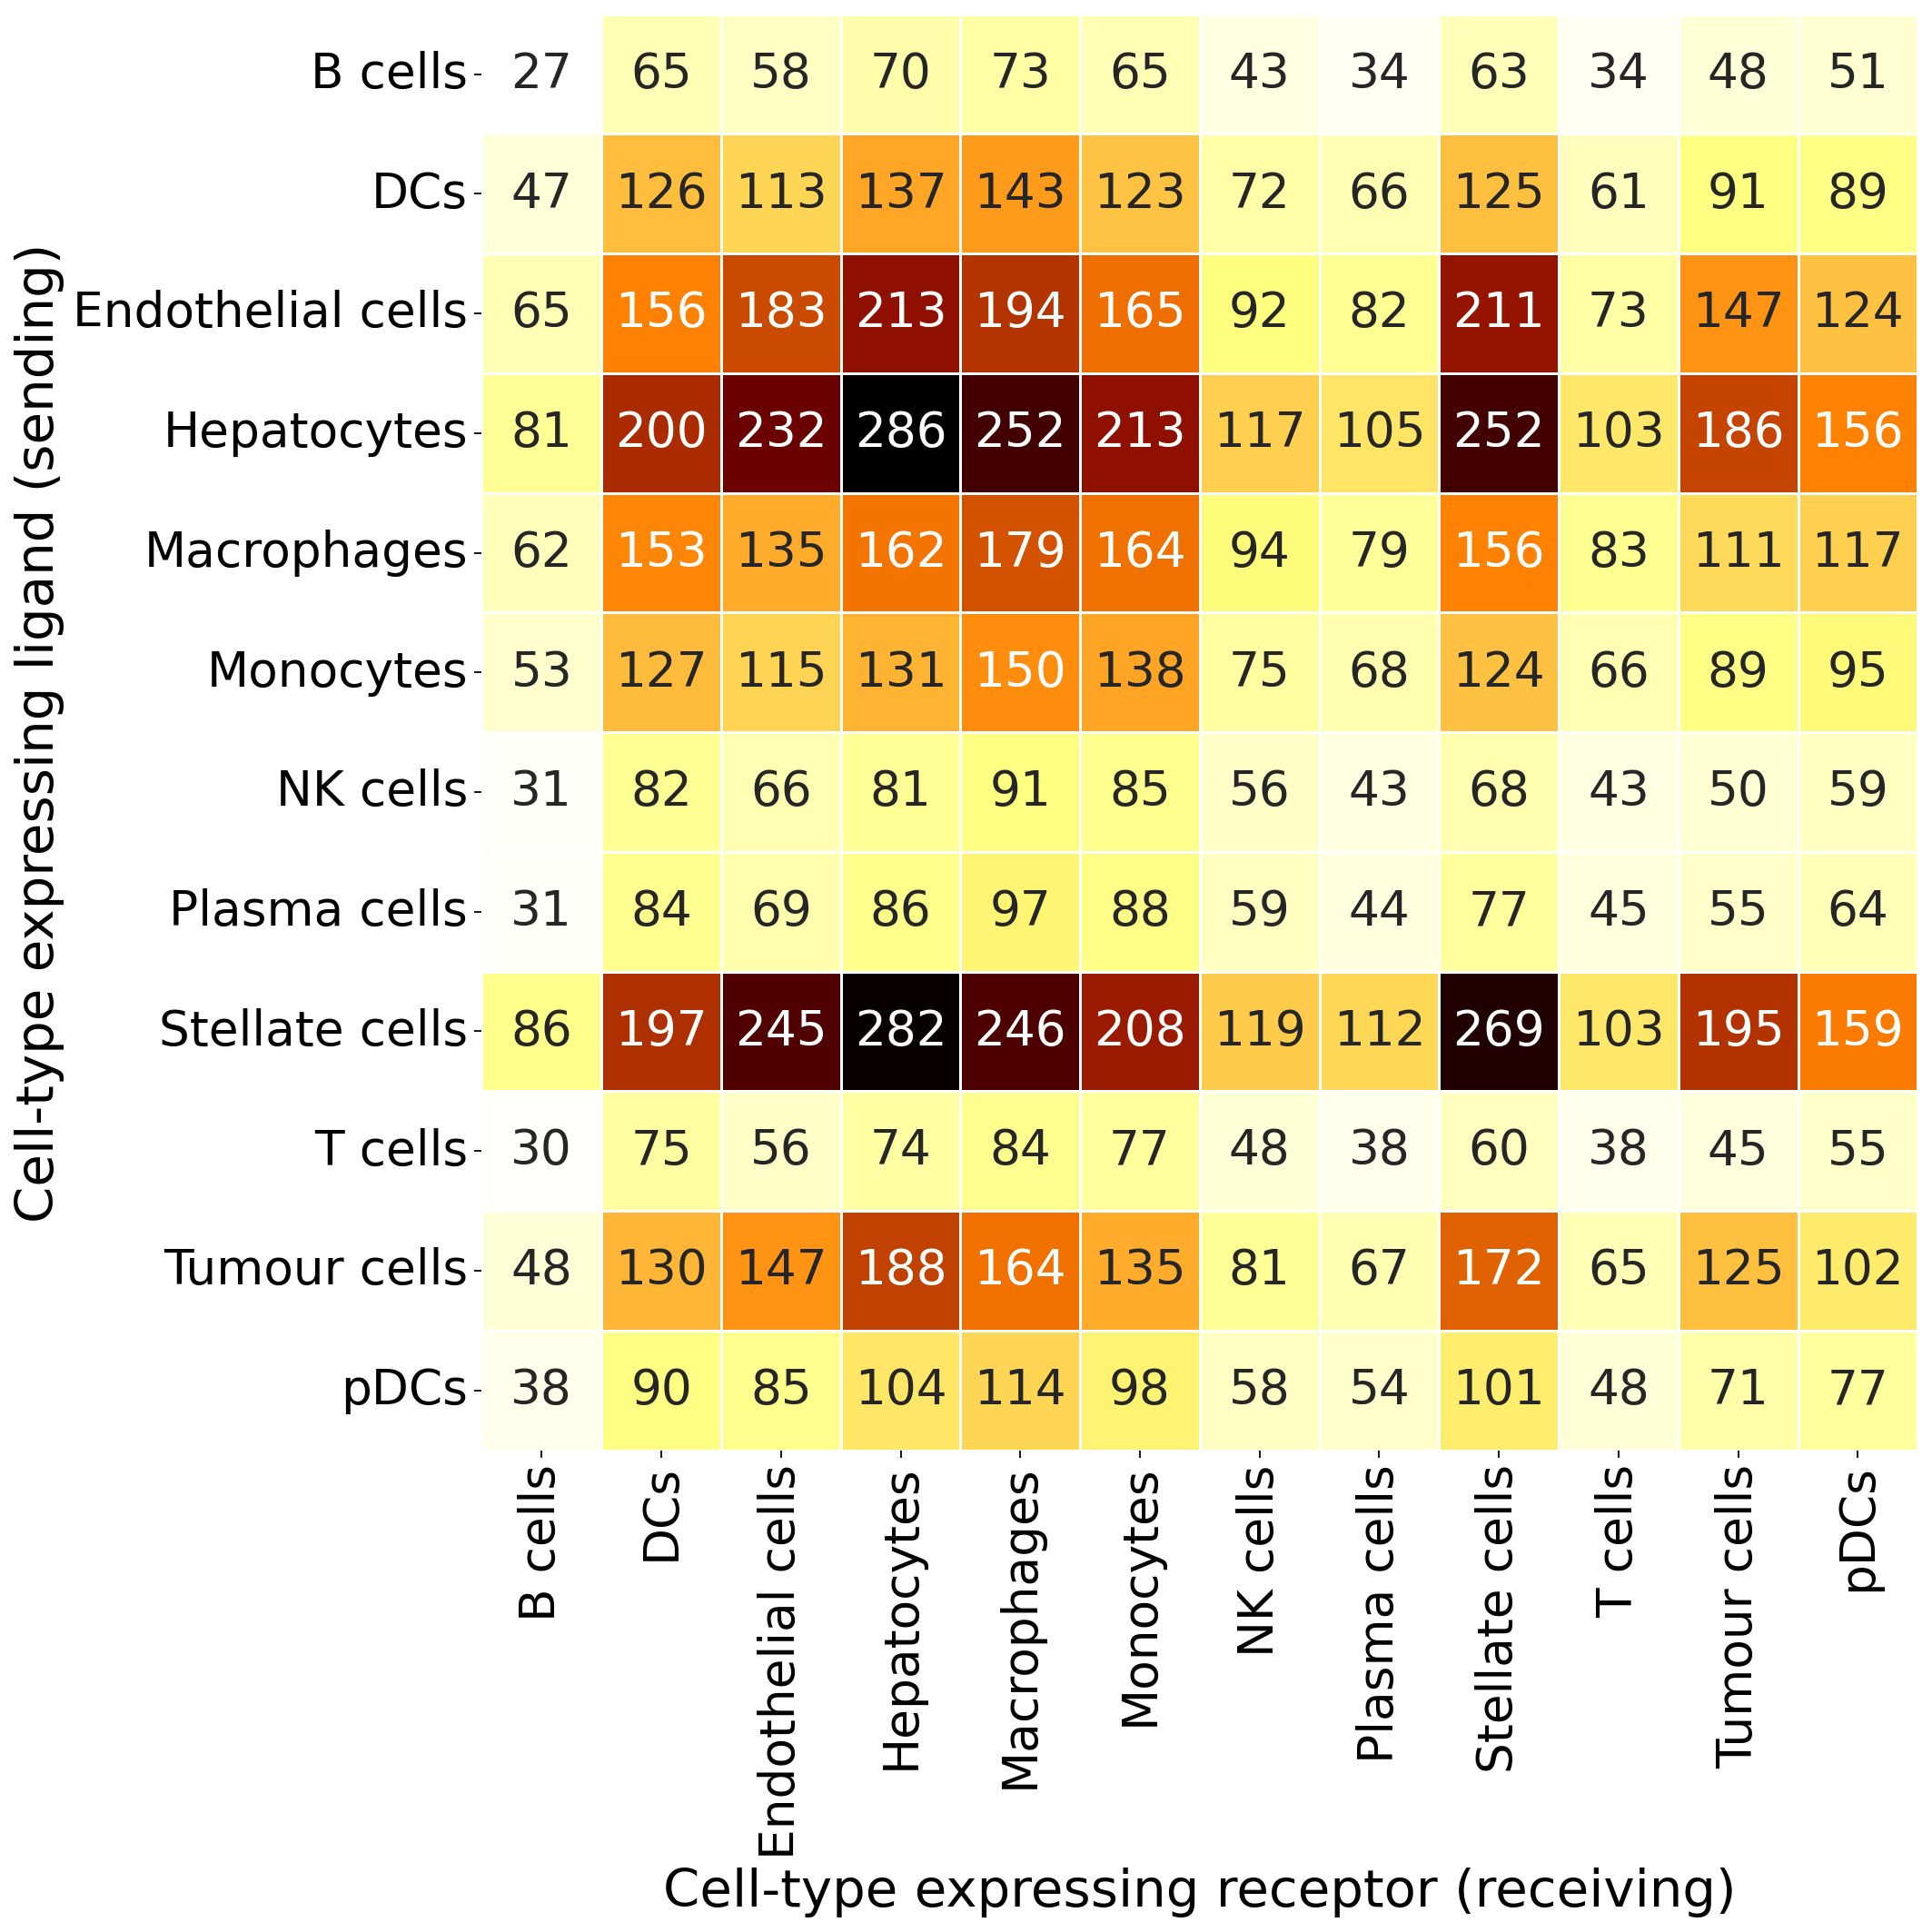

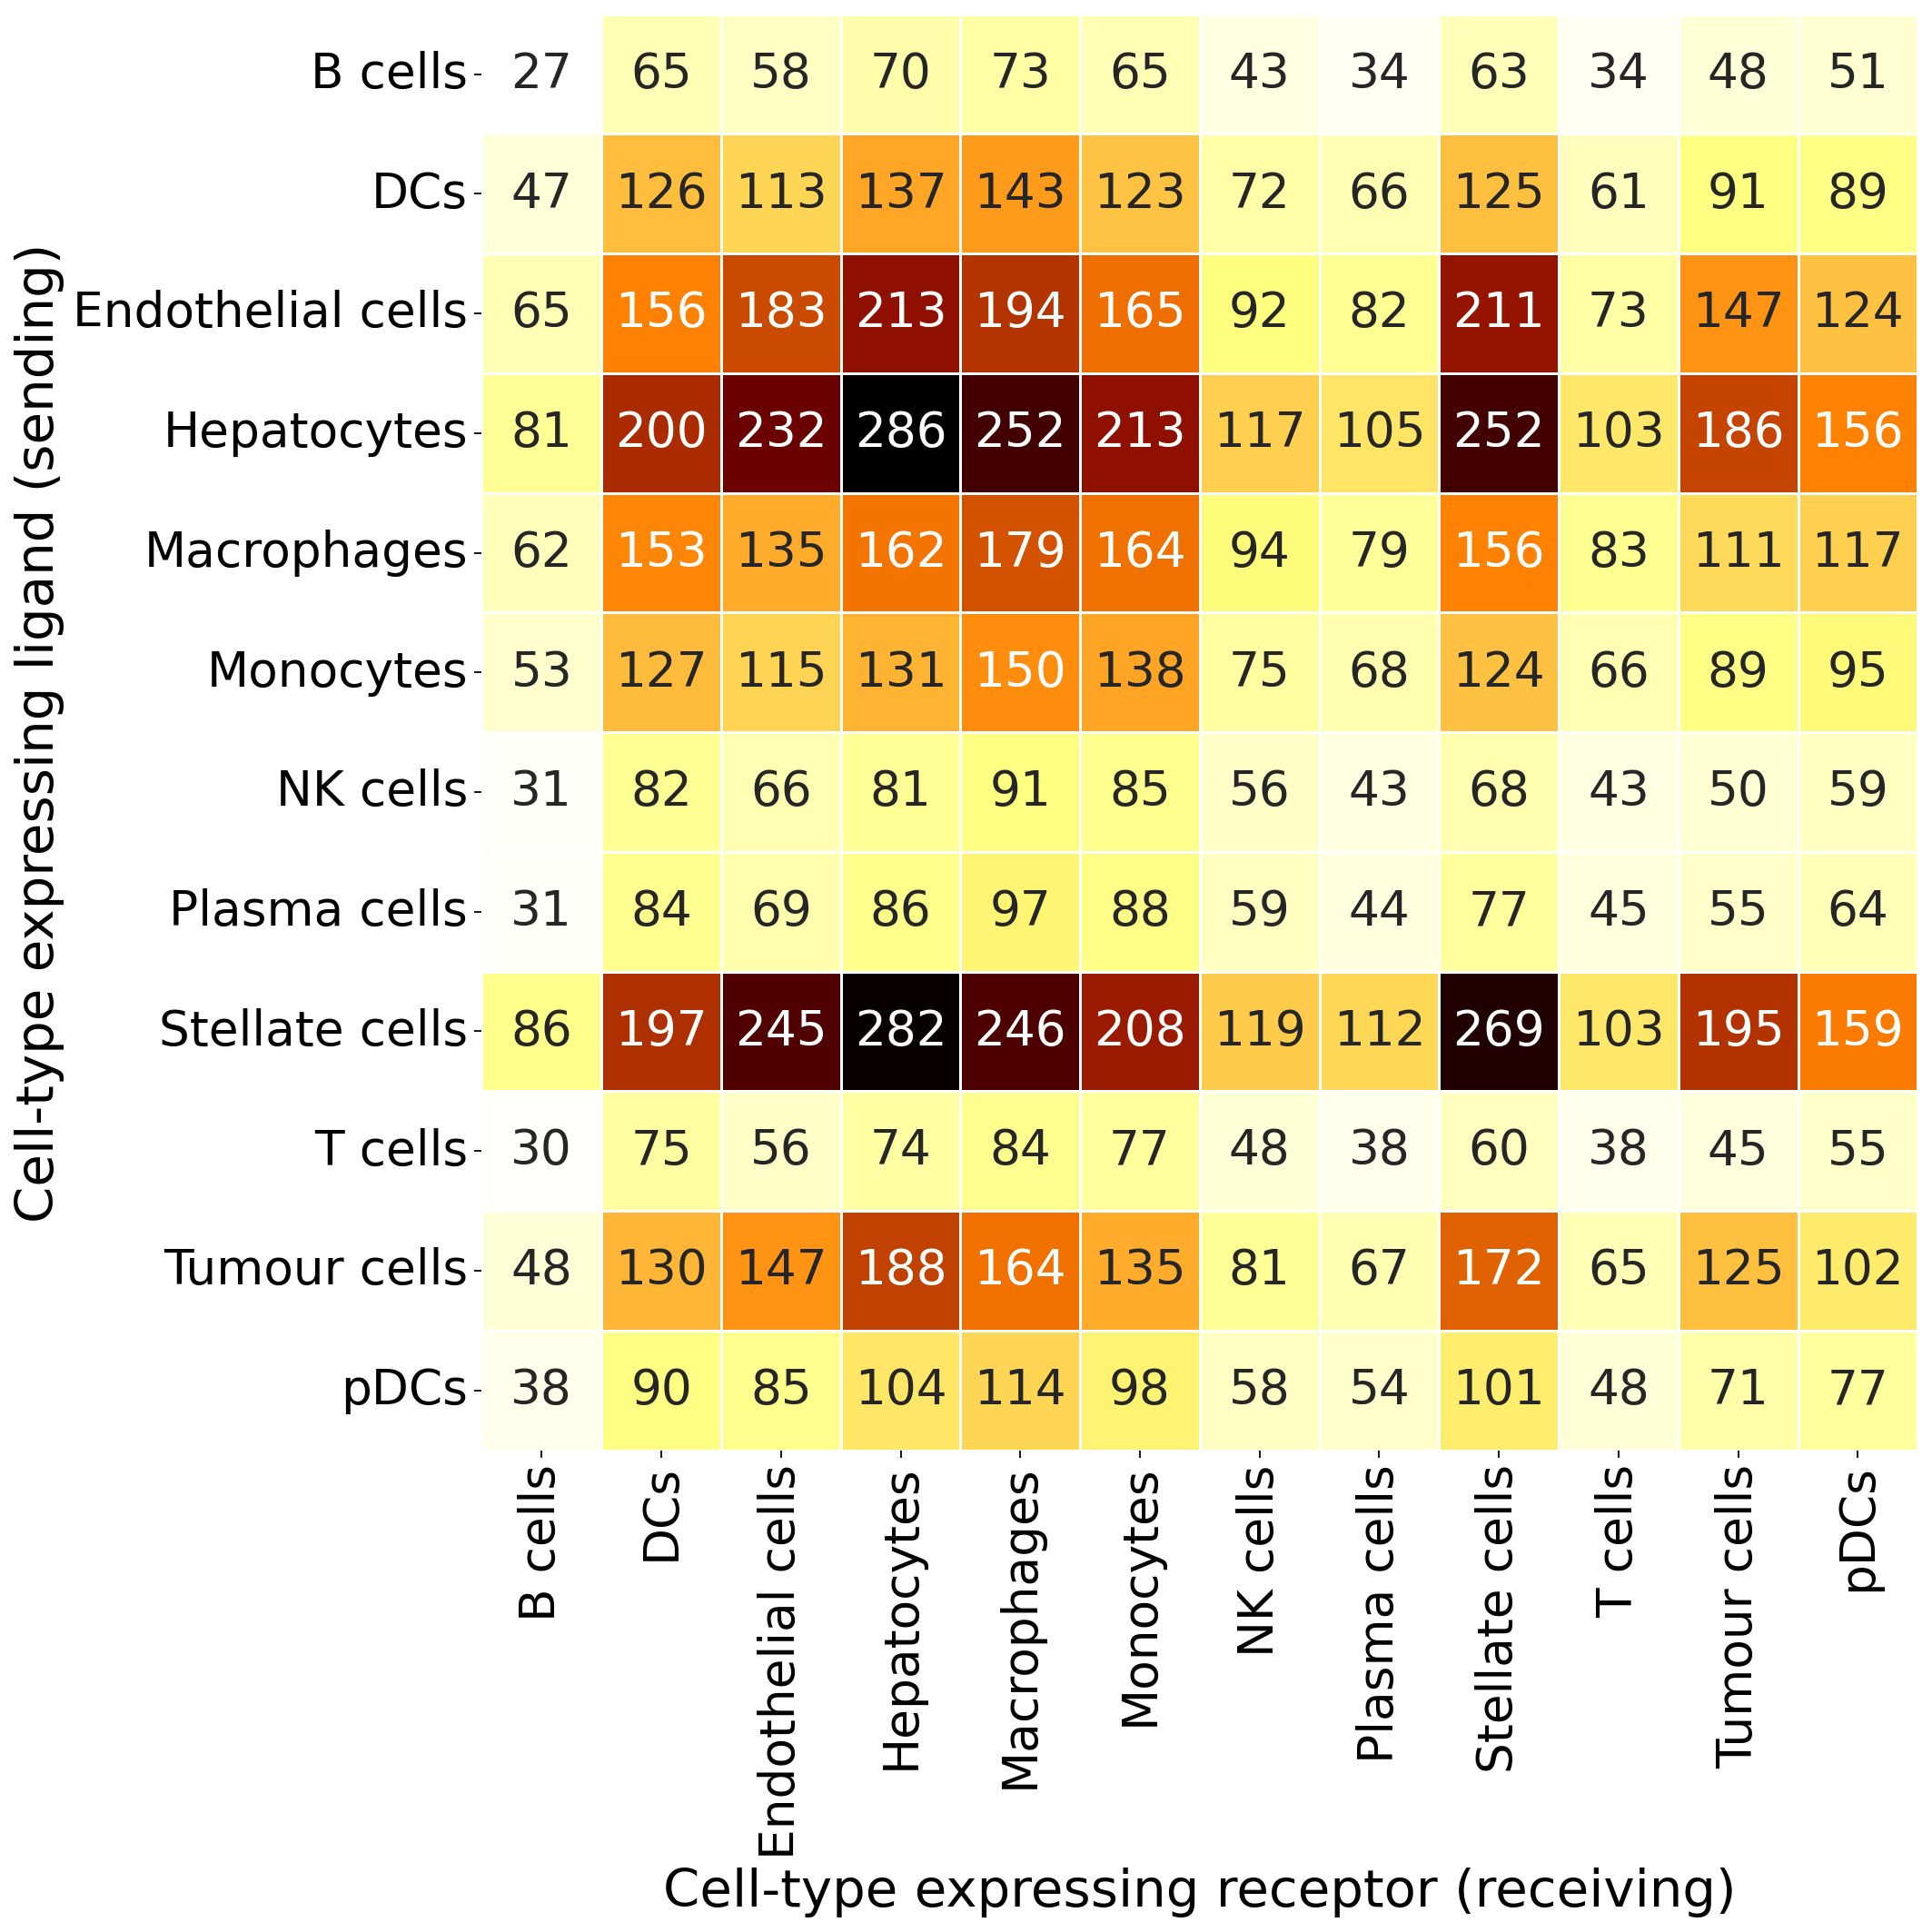

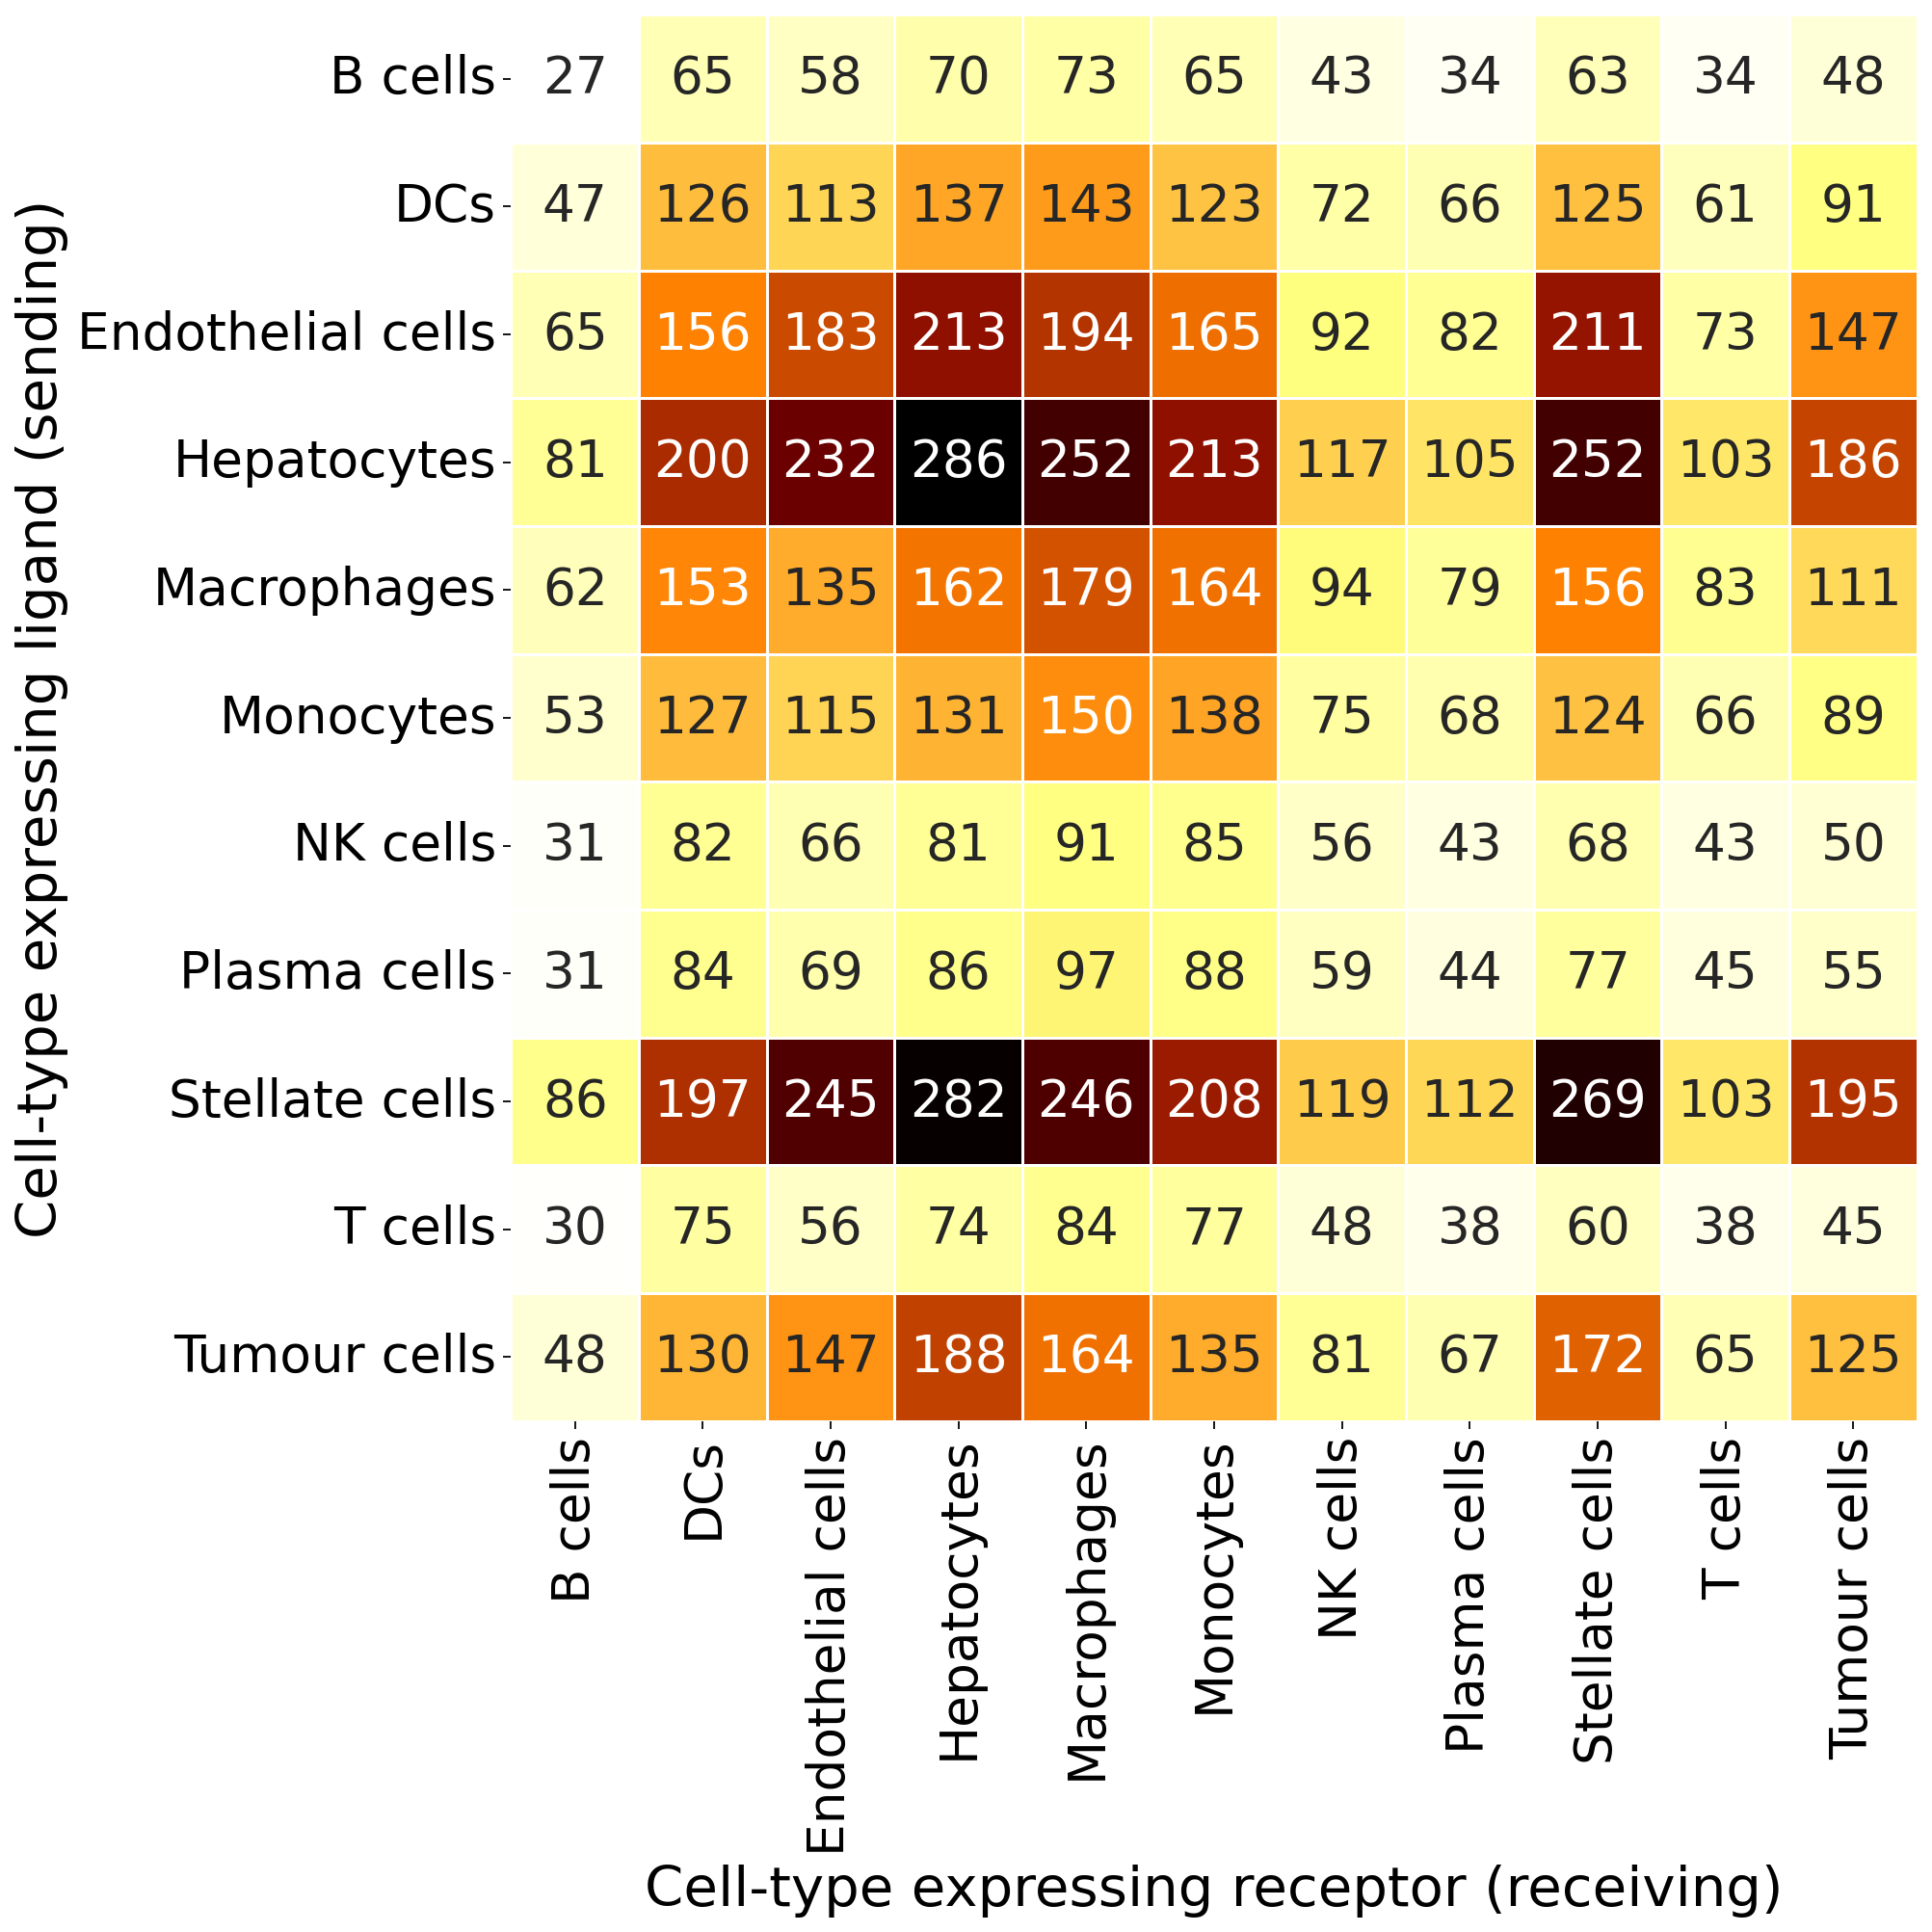

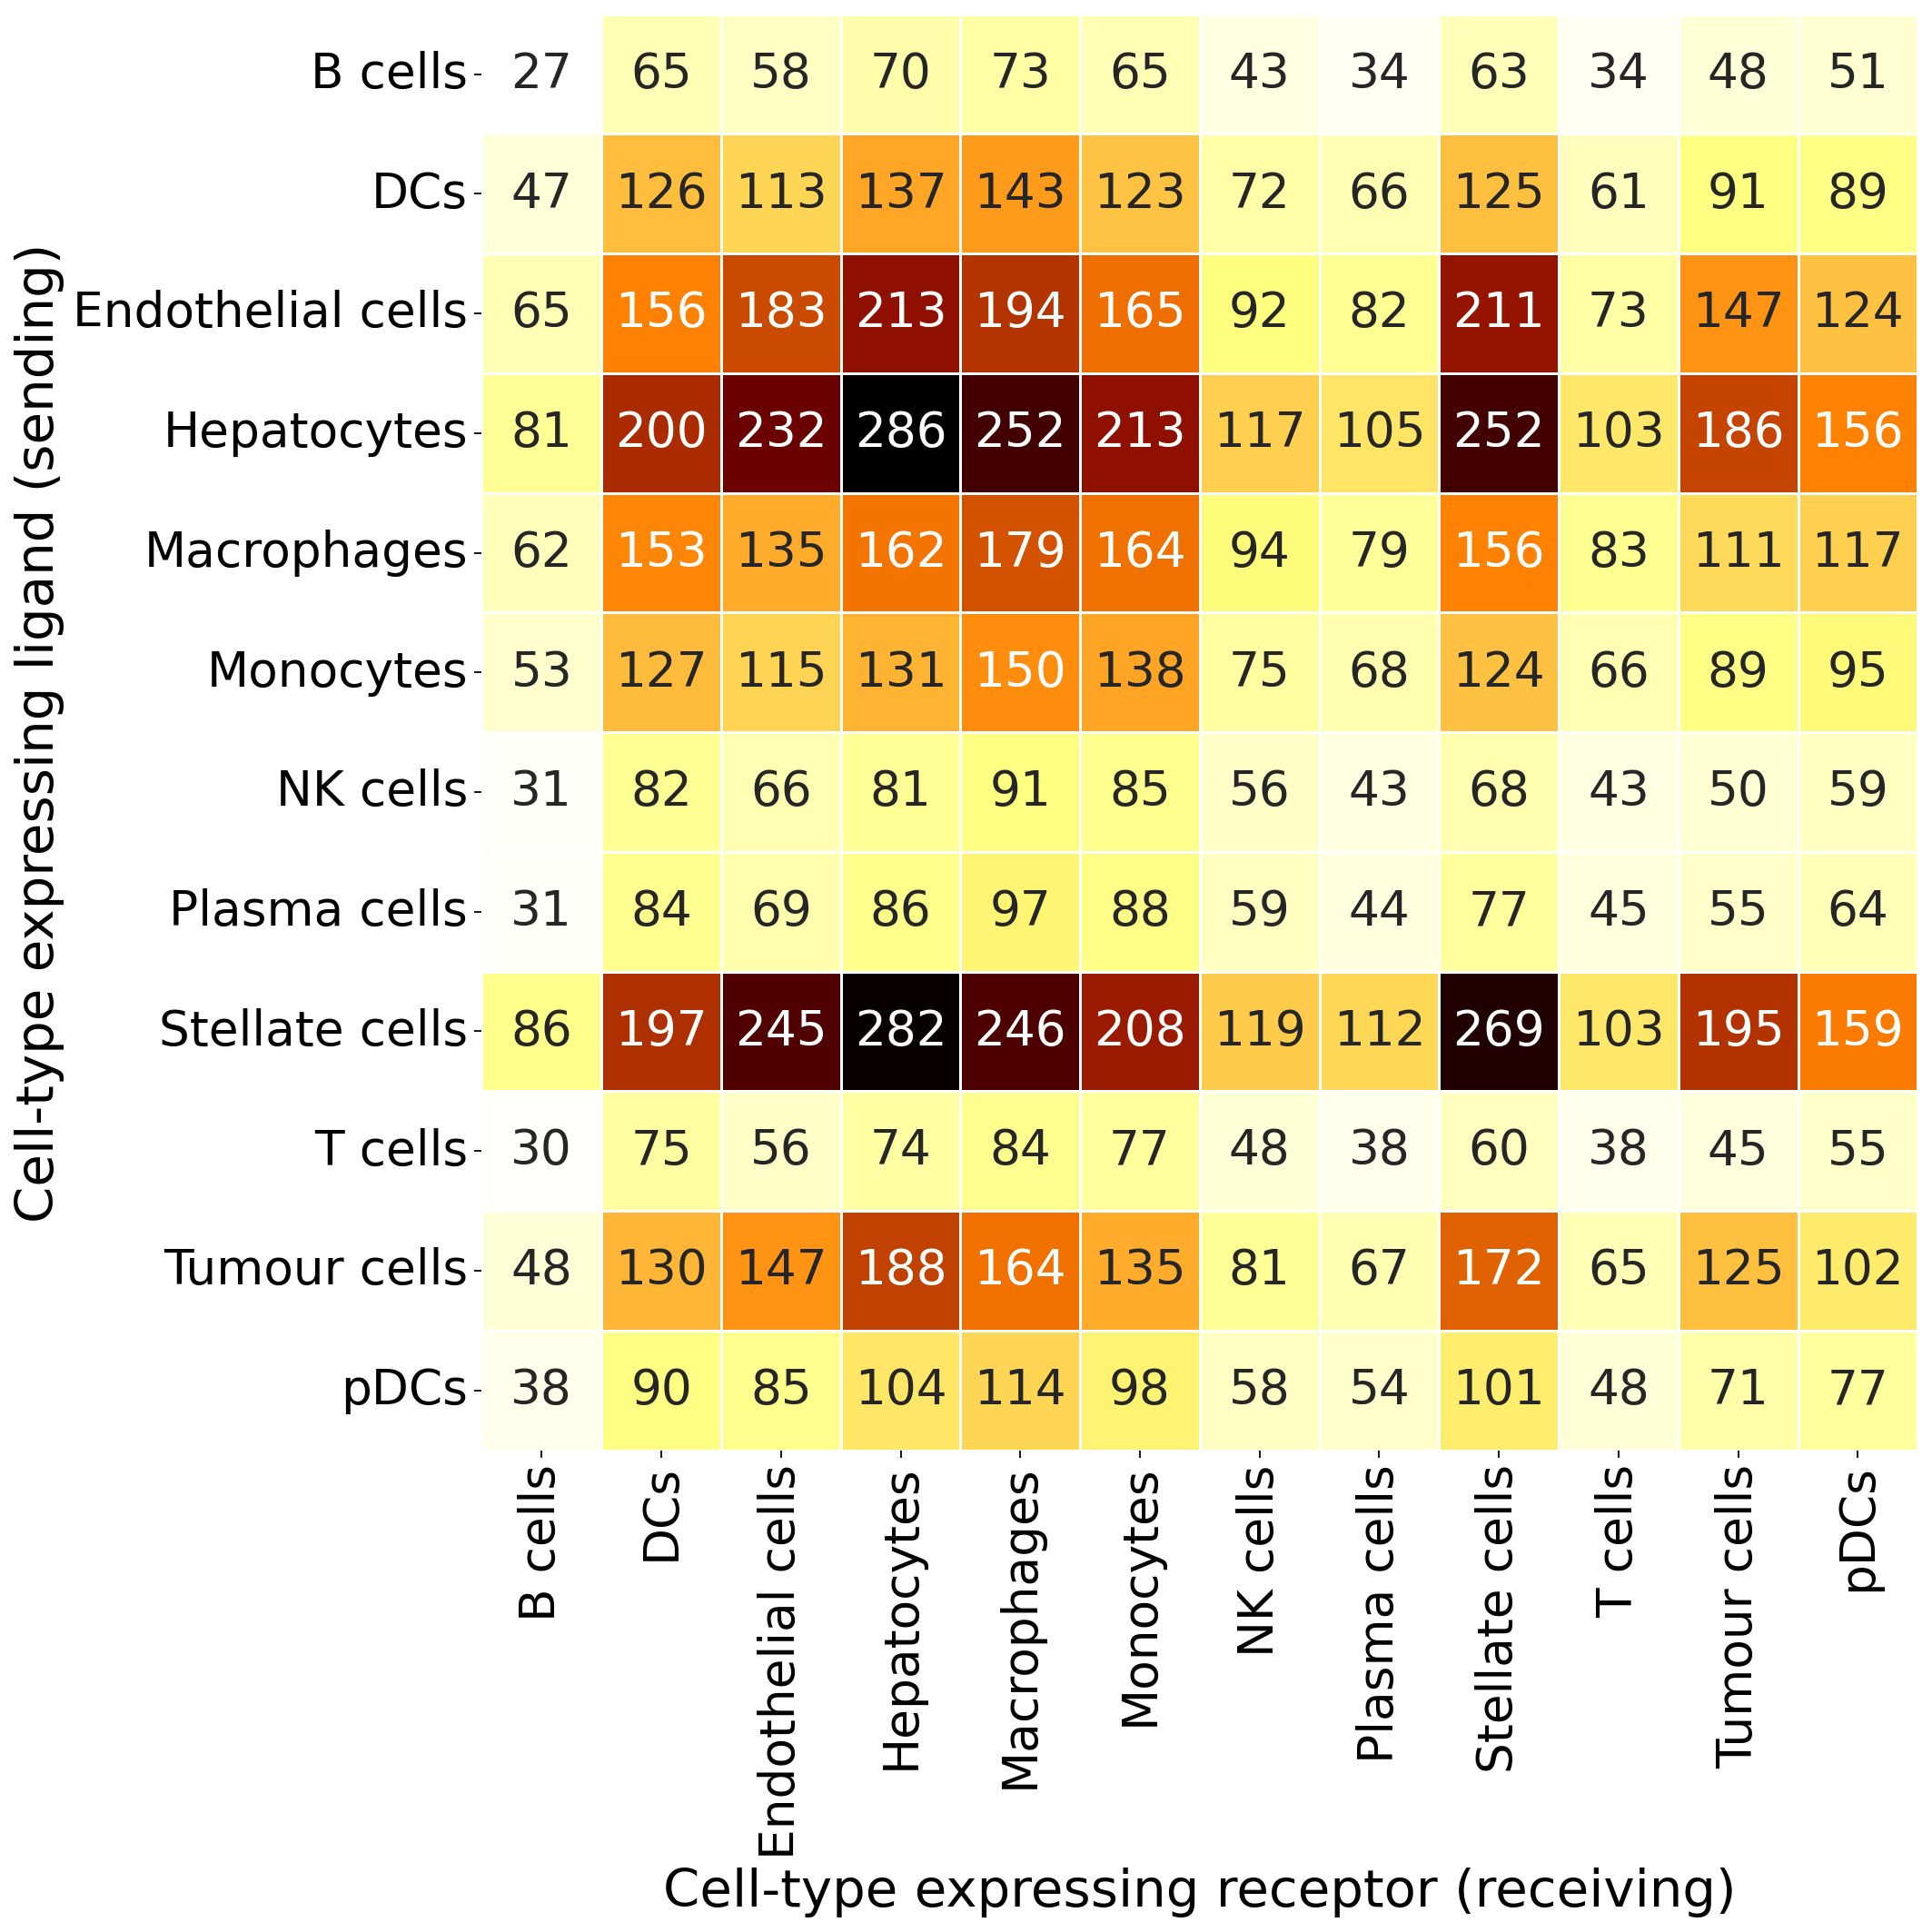

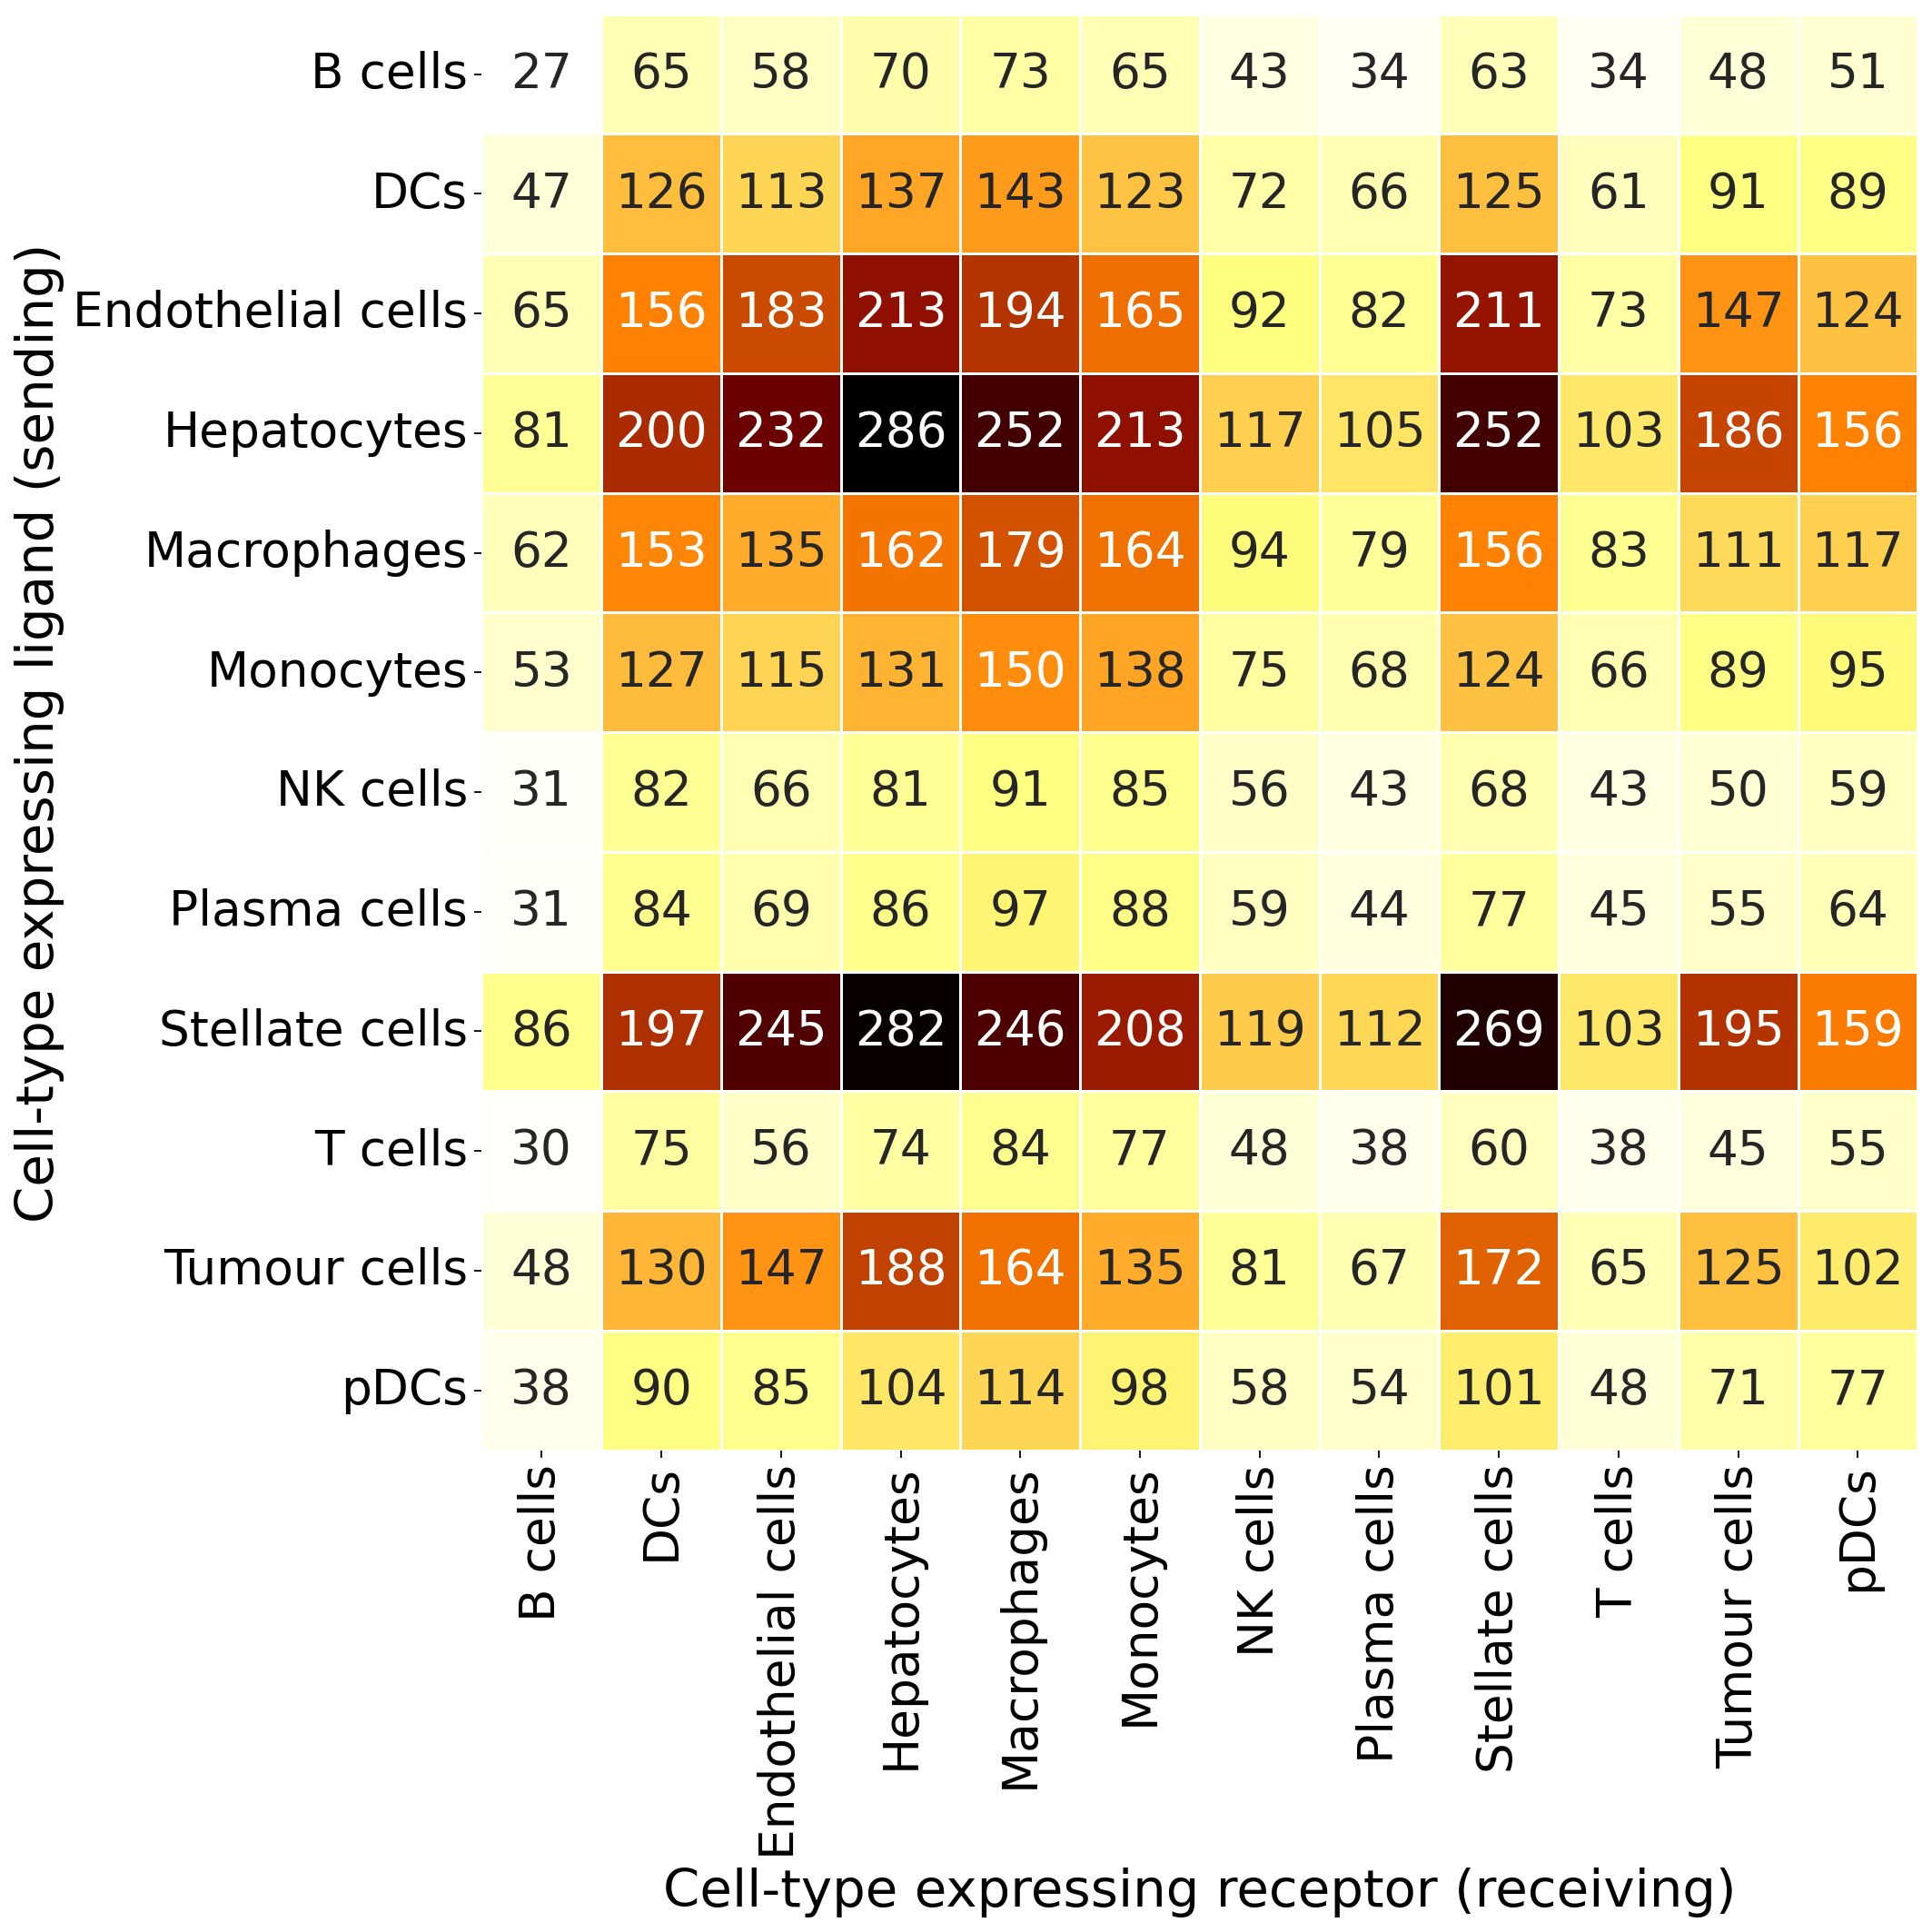

In [184]:
for spl in spls:
    subadata = adata[adata.obs['orig.ident']==spl,]
    #os.mkdir(spl)
    cts = sorted(list(set(subadata.obs['manual_annot'])))
    # obtain detected ligands and receptors in each cell type
    lrDict = {}
    for tct in cts:
        #if tct != 'Tumour cells':
        if tct != '':
            print('===processing top cell type: %s' % tct)
            ligandDF = adata[adata.obs['manual_annot']==tct,ligandsAll]
            receptorDF = adata[adata.obs['manual_annot']==tct,receptorsAll]

            lmean = FilterEM(ligandDF,upmThrd,dctRate)
            rmean = FilterEM(receptorDF,upmThrd,dctRate)

            lrDict[tct] = [lmean,rmean]
        else:
            for spl in spls:
                cltname = tct + ' from ' + spl
                print('===processing top cell type: %s' % cltname)
                ligandDF = adata[(adata.obs['manual_annot']==tct)&(adata.obs['orig.ident']==spl),ligandsAll]
                receptorDF = adata[(adata.obs['manual_annot']==tct)&(adata.obs['orig.ident']==spl),receptorsAll]

                lmean = FilterEM(ligandDF,upmThrd,dctRate)
                rmean = FilterEM(receptorDF,upmThrd,dctRate)

                lrDict[cltname] = [lmean,rmean]
    
    # build lr-pair count matrix
    lredgeCuntMtx = pd.DataFrame(0,index=lrDict.keys(),columns=lrDict.keys())
    for sct in lrDict.keys():
        for tct in lrDict.keys():
            print('from %s to %s' % (sct,tct))
            rltDict = {'sending cell':[],'target cell':[],'ligand':[],'receptor':[],'ligand mean expression':[],'receptor mean expression':[],'edge weight':[]}
            for lridx in lrdb.index:
                lsymbl = lrdb.loc[lridx,'Ligand gene symbol']
                rsymbl = lrdb.loc[lridx,'Receptor gene symbol']
                if lsymbl in lrDict[sct][0].index and rsymbl in lrDict[tct][1].index:
                    rltDict['sending cell'].append(sct)
                    rltDict['target cell'].append(tct)
                    rltDict['ligand'].append(lsymbl)
                    rltDict['receptor'].append(rsymbl)
                    rltDict['ligand mean expression'].append(lrDict[sct][0][lsymbl])
                    rltDict['receptor mean expression'].append(lrDict[tct][1][rsymbl])
                    rltDict['edge weight'].append(lrDict[sct][0][lsymbl]*lrDict[tct][1][rsymbl])
            rltdf = pd.DataFrame(rltDict)
            lredgeCuntMtx.loc[sct,tct] = len(rltdf)
            rltdf.to_excel('%s/%s_2_%s_thrd_%s_dec_%s.xlsx' % (spl, sct,tct,upmThrd,dctRate), index=False, header=True, columns = ['sending cell','target cell','ligand','receptor','ligand mean expression','receptor mean expression','edge weight'])
    lredgeCuntMtx.to_excel('c2c_%s_source_matrix.xlsx' % spl, index=True, header=True, columns = lrDict.keys())  
    
    # build lr-metadata matrix
    lrsigCuntMtx = pd.DataFrame(0,index=lrDict.keys(),columns=['ligand','receptor','cell'])
    sumCell = 0
    for sct in cts:
        #if sct != 'Tumour cells':
        if sct != '':
            print('checking cell type: %s' % sct)
            ligCunt = len(lrDict[sct][0])
            rcpCunt = len(lrDict[sct][1])
            cellCunt = len(adata.obs.loc[adata.obs['manual_annot']==sct,])
            sumCell += cellCunt
            lrsigCuntMtx.loc[sct,'ligand'] = ligCunt
            lrsigCuntMtx.loc[sct,'receptor'] = rcpCunt
            lrsigCuntMtx.loc[sct,'cell'] = cellCunt
        else:
            for spl in spls:
                cltname = sct + ' from ' + spl
                print('checking cell type: %s' % cltname)
                ligCunt = len(lrDict[cltname][0])
                rcpCunt = len(lrDict[cltname][1])
                cellCunt = len(adata.obs.loc[(adata.obs['manual_annot']==sct)&(adata.obs['orig.ident']==spl),])
                sumCell += cellCunt
                lrsigCuntMtx.loc[cltname,'ligand count'] = ligCunt
                lrsigCuntMtx.loc[cltname,'receptor count'] = rcpCunt
                lrsigCuntMtx.loc[cltname,'cell count'] = cellCunt
    lrsigCuntMtx.to_excel('sig_%s_count_source_matrix.xlsx' % spl, index=True, header=True, columns = ['ligand','receptor','cell'])
    print(sumCell)
    print(lrsigCuntMtx)
    
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(max(lredgeCuntMtx.shape)+1, max(lredgeCuntMtx.shape)+1))
    heatmapkws = dict(square=True, annot=True, annot_kws={"size":24}, fmt="d", cbar=False, cmap = cmap, linewidths=.5, vmin= lredgeCuntMtx.min().min(), vmax= lredgeCuntMtx.max().max())
    #main matrix
    sns.heatmap(lredgeCuntMtx, ax=axes, xticklabels=True, yticklabels=True, **heatmapkws)
    
    #left labels
    axes.tick_params(axis='both', which='major', labelsize=24)
    axes.set_ylabel('Cell-type expressing ligand (sending)', fontsize=26)
    #bottom labels
    axes.tick_params(axis='both', which='major', labelsize=24)
    axes.set_xlabel('Cell-type expressing receptor (receiving)', fontsize=26)

    figItm = fig.get_figure()
    figItm.savefig('c2cMtx_%s.v1.pdf' % spl, bbox_inches = "tight")